In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt  
import plotly.express as px 

In [31]:
#Chagement des donnÃ©es
df = pd.read_csv('orientation.csv')

# Data munging

Nettoyage et transformation des donnÃ©es en prÃ©paration de lâ€™analyse  


In [32]:
import pandas as pd

#Modification des noms des colonnes
data = df.copy()
t=list(data.columns)
col = ['Horodateur','Score','bac',
       'specialite',"matiÃ¨re_prefere",
       "mention","filiÃ¨re","type_etu",
       "domaine_etu","type_lieu_etu",
       "pays_bac","domaine_activite_pro",
      "tranche_age","genre","qualitÃ©","hobies",
      "type_orientation","Niveau_etu",
      "centre_interet","pays_residence",
      "type_cours","remarque","annee_bac","satisfact_formation",
      'Adresse e-mail',"etablissement"]

#len(col),len(t)
dic = {}
for i in range(len(col)):
    dic[t[i]]=col[i]
data.rename(columns=dic, inplace=True)
data= pd.DataFrame(data)
data

Horodateur  Score                        bac  \
0    23/11/2023 13:48:45    NaN  Scientifique (Ã©quivalent)   
1    23/11/2023 13:17:13    NaN  Scientifique (Ã©quivalent)   
2    23/11/2023 00:19:26    NaN  Scientifique (Ã©quivalent)   
3    13/11/2023 19:09:32    NaN                   GÃ©nÃ©ral    
4    01/11/2023 20:29:44    NaN  Scientifique (Ã©quivalent)   
..                   ...    ...                        ...   
200  06/12/2023 06:09:14    NaN  Scientifique (Ã©quivalent)   
201  06/12/2023 12:41:05    NaN  Scientifique (Ã©quivalent)   
202  06/12/2023 12:46:45    NaN  Scientifique (Ã©quivalent)   
203  07/12/2023 10:00:29    NaN  Scientifique (Ã©quivalent)   
204  19/12/2023 20:53:35    NaN  Scientifique (Ã©quivalent)   

                                            specialite  \
0                                        MathÃ©matiques   
1    MathÃ©matiques, Physique-chimie (PC), NumÃ©rique...   
2                              Sciences de l'ingÃ©nieur   
3    Sciences Ã©conomiques et sociales, HumanitÃ©s, l...   
4    MathÃ©matiques, Physique-chimie (PC), Sciences ...   
..                                                 ...   
200            Sciences de la vie et de la Terre (SVT)   
201    MathÃ©matiques, Sciences Ã©conomiques et sociales   
202                                      MathÃ©matiques   
203                                      MathÃ©matiques   
204            Sciences de la vie et de la Terre (SVT)   

                                       matiÃ¨re_prefere     mention  \
0    MathÃ©matiques, Physique-chimie (PC), Sciences ...  Assez-bien   
1    MathÃ©matiques, Physique-chimie (PC), FranÃ§ais,...        Bien   
2                  MathÃ©matiques, Physique-chimie (PC)   Honorable   
3    Philosophie, Art, FranÃ§ais, Sciences Ã©conomiqu...  Assez-bien   
4    MathÃ©matiques, Philosophie, Histoire - GÃ©ograp...        Bien   
..                                                 ...         ...   
200  MathÃ©matiques, Sciences de la vie et de la Ter...    Passable   
201  MathÃ©matiques, Sciences Ã©conomiques et sociale...        Bien   
202  MathÃ©matiques, Sciences numÃ©riques et technologie  Assez-bien   
203  MathÃ©matiques, Sciences numÃ©riques et technologie  Assez-bien   
204   Sciences de la vie et de la Terre (SVT), Anglais    Passable   

                                               filiÃ¨re             type_etu  \
0                         Licence MIASHS parcours MASS  Longues (>= master)   
1    GÃ©nie civil et Hydraulique puis MathÃ©matiques ...  Longues (>= master)   
2                                            CPGE MPSI  Longues (>= master)   
3                                 Master MEEF ou ENPJJ  Longues (>= master)   
4                 licence science politique option ESJ  Longues (>= master)   
..                                                 ...                  ...   
200                                       Informatique  Longues (>= master)   
201                                             MIASHS  Longues (>= master)   
202                                     MathÃ©matiques   Longues (>= master)   
203                                          MIASHS WA  Longues (>= master)   
204                                       INFORMATIQUE  Longues (>= master)   

                                    domaine_etu        type_lieu_etu  ...  \
0                      Sciences et technologies           UniversitÃ©  ...   
1                      Sciences et technologies           UniversitÃ©  ...   
2                      Sciences et technologies  classe prÃ©paratoire  ...   
3    Sciences de l'Ã©ducation et de la formation                  BUT  ...   
4                  Droit et sciences politiques           UniversitÃ©  ...   
..                                          ...                  ...  ...   
200                    Sciences et technologies           UniversitÃ©  ...   
201                    Sciences et technologies           UniversitÃ©  ...   
202                    Sciences et techn

In [33]:
#les colonnes supplementaires
data = data.drop(['Horodateur','Score', 'Adresse e-mail'], axis=1)

In [34]:
# Suppression des espaces au dÃ©but et Ã  la fin Ã  tous les Ã©lÃ©ments textuels des colonnes
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [35]:
#remplacer les valeurs manquantes par non renseignÃ©
data.fillna("non renseignÃ©", inplace=True)

In [36]:
# Mettre en majuscul tous les Ã©lÃ©ments textuels des colonnes
data = data.applymap(lambda x: x.upper() if isinstance(x, str) else x)

# Affichez le DataFrame rÃ©sultant
data

bac  \
0    SCIENTIFIQUE (Ã‰QUIVALENT)   
1    SCIENTIFIQUE (Ã‰QUIVALENT)   
2    SCIENTIFIQUE (Ã‰QUIVALENT)   
3                      GÃ‰NÃ‰RAL   
4    SCIENTIFIQUE (Ã‰QUIVALENT)   
..                         ...   
200  SCIENTIFIQUE (Ã‰QUIVALENT)   
201  SCIENTIFIQUE (Ã‰QUIVALENT)   
202  SCIENTIFIQUE (Ã‰QUIVALENT)   
203  SCIENTIFIQUE (Ã‰QUIVALENT)   
204  SCIENTIFIQUE (Ã‰QUIVALENT)   

                                            specialite  \
0                                        MATHÃ‰MATIQUES   
1    MATHÃ‰MATIQUES, PHYSIQUE-CHIMIE (PC), NUMÃ‰RIQUE...   
2                              SCIENCES DE L'INGÃ‰NIEUR   
3    SCIENCES Ã‰CONOMIQUES ET SOCIALES, HUMANITÃ‰S, L...   
4    MATHÃ‰MATIQUES, PHYSIQUE-CHIMIE (PC), SCIENCES ...   
..                                                 ...   
200            SCIENCES DE LA VIE ET DE LA TERRE (SVT)   
201    MATHÃ‰MATIQUES, SCIENCES Ã‰CONOMIQUES ET SOCIALES   
202                                      MATHÃ‰MATIQUES   
203                                      MATHÃ‰MATIQUES   
204            SCIENCES DE LA VIE ET DE LA TERRE (SVT)   

                                       matiÃ¨re_prefere     mention  \
0    MATHÃ‰MATIQUES, PHYSIQUE-CHIMIE (PC), SCIENCES ...  ASSEZ-BIEN   
1    MATHÃ‰MATIQUES, PHYSIQUE-CHIMIE (PC), FRANÃ‡AIS,...        BIEN   
2                  MATHÃ‰MATIQUES, PHYSIQUE-CHIMIE (PC)   HONORABLE   
3    PHILOSOPHIE, ART, FRANÃ‡AIS, SCIENCES Ã‰CONOMIQU...  ASSEZ-BIEN   
4    MATHÃ‰MATIQUES, PHILOSOPHIE, HISTOIRE - GÃ‰OGRAP...        BIEN   
..                                                 ...         ...   
200  MATHÃ‰MATIQUES, SCIENCES DE LA VIE ET DE LA TER...    PASSABLE   
201  MATHÃ‰MATIQUES, SCIENCES Ã‰CONOMIQUES ET SOCIALE...        BIEN   
202  MATHÃ‰MATIQUES, SCIENCES NUMÃ‰RIQUES ET TECHNOLOGIE  ASSEZ-BIEN   
203  MATHÃ‰MATIQUES, SCIENCES NUMÃ‰RIQUES ET TECHNOLOGIE  ASSEZ-BIEN   
204   SCIENCES DE LA VIE ET DE LA TERRE (SVT), ANGLAIS    PASSABLE   

                                               filiÃ¨re             type_etu  \
0                         LICENCE MIASHS PARCOURS MASS  LONGUES (>= MASTER)   
1    GÃ‰NIE CIVIL ET HYDRAULIQUE PUIS MATHÃ‰MATIQUES ...  LONGUES (>= MASTER)   
2                                            CPGE MPSI  LONGUES (>= MASTER)   
3                                 MASTER MEEF OU ENPJJ  LONGUES (>= MASTER)   
4                 LICENCE SCIENCE POLITIQUE OPTION ESJ  LONGUES (>= MASTER)   
..                                                 ...                  ...   
200                                       INFORMATIQUE  LONGUES (>= MASTER)   
201                                             MIASHS  LONGUES (>= MASTER)   
202                                      MATHÃ‰MATIQUES  LONGUES (>= MASTER)   
203                                          MIASHS WA  LONGUES (>= MASTER)   
204                                       INFORMATIQUE  LONGUES (>= MASTER)   

                                    domaine_etu        type_lieu_etu  \
0                      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   
1                      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   
2                      SCIENCES ET TECHNOLOGIES  CLASSE PRÃ‰PARATOIRE   
3    SCIENCES DE L'Ã‰DUCATION ET DE LA FORMATION                  BUT   
4                  DROIT ET SCIENCES POLITIQUES           UNIVERSITÃ‰   
..                                          ...                  ...   
200                    SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   
201                    SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   
202                    SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   
203                    SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   
204                    SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   

         pays_bac                               domaine_activite_pro  ...  \
0          FRANCE                                       DATA SCIENCE  ...   
1    BURKINA FASO                                           

##### Traitement des valeurs des different colonnes de la data :

In [37]:
#fonction pour corriger les valeurs d'une colonnes
def netoyage(df,nom_colone,var): 
    data = df.copy()
    data[nom_colone] = data[nom_colone].replace(var)
    return data

In [38]:
#fonction pour mettres les elements (cle et valeurs) testuel en majuscul
def dico_maj(dico):    
    
    
    # CrÃ©er un nouveau dictionnaire avec les clÃ©s et les valeurs en majuscules
    nouveau_dico = {cle.upper(): valeur.upper() if isinstance(valeur, str) else valeur for cle, valeur in dico.items()}

    # Afficher le nouveau dictionnaire
    return nouveau_dico

In [39]:
def trouve_ma_ligne(df,col,lien):
    return df[df[col] == lien]

##### Variables bac :

In [40]:
data.bac.unique()

array(['SCIENTIFIQUE (Ã‰QUIVALENT)', 'GÃ‰NÃ‰RAL', 'TECHNIQUE (Ã‰QUIVALENT)',
       'GÃ‰NÃ‰RAL (MENTION EUROPÃ‰ENNE)', 'LITTÃ‰RAIRE (Ã‰QUIVALENT)',
       'GÃ‰NÃ‰RAL SPÃ‰+ OPTION ARTS PLASTIQUES ET SPÃ‰ AMC',
       "LES 3: J'AI FAIS HGGSP/HLP/MATH '^'", 'PROFESSIONNEL',
       'ART ET HISTOIRE', 'GÃ‰NÃ‰RALE', 'MÃ‰LANGE Ã‰CO SOCIO ET LITTÃ‰',
       'ECONOMIE ET SOCIALE (Ã‰QUIVALENT)', 'MATHS ET HISTOIRE',
       'SVT HGGSP',
       'STMG (SCIENCES TECHNOLOGIES DU MANAGEMENT ET DE LA GESTION',
       'STMG'], dtype=object)

In [41]:
pd.crosstab(data.bac, "freq")

col_0                                               freq
bac                                                     
ART ET HISTOIRE                                        1
ECONOMIE ET SOCIALE (Ã‰QUIVALENT)                      35
GÃ‰NÃ‰RAL                                                3
GÃ‰NÃ‰RAL (MENTION EUROPÃ‰ENNE)                           1
GÃ‰NÃ‰RAL SPÃ‰+ OPTION ARTS PLASTIQUES ET SPÃ‰ AMC         1
GÃ‰NÃ‰RALE                                               1
LES 3: J'AI FAIS HGGSP/HLP/MATH '^'                    1
LITTÃ‰RAIRE (Ã‰QUIVALENT)                               38
MATHS ET HISTOIRE                                      1
MÃ‰LANGE Ã‰CO SOCIO ET LITTÃ‰                             1
PROFESSIONNEL                                          3
SCIENTIFIQUE (Ã‰QUIVALENT)                            109
STMG                                                   1
STMG (SCIENCES TECHNOLOGIES DU MANAGEMENT ET DE...     1
SVT HGGSP                                              1
TECHNIQUE (Ã‰QUIVALENT)                                 7

In [42]:
var = {"Art et histoire ":"LittÃ©raire (Ã©quivalent)","GÃ©nÃ©rale":"Scientifique (Ã©quivalent)",
       "GÃ©nÃ©ral":"Economie et Sociale (Ã©quivalent)","GÃ©nÃ©ral ":"Scientifique (Ã©quivalent)",
       "Les 3: J'ai fais HGGSP/HLP/Math '^'":"Scientifique (Ã©quivalent)",
       "Maths et histoire ":"Economie et Sociale (Ã©quivalent)","GÃ©nÃ©ral (mention europÃ©enne)":"Scientifique (Ã©quivalent)",
       "GÃ©nÃ©ral spÃ©+ option arts plastiques et spÃ© AMC":"LITTÃ‰RAIRE (Ã‰QUIVALENT)",
       "MÃ©lange Ã©co socio et littÃ©":"Economie et Sociale (Ã©quivalent)",
       "STMG (Sciences Technologies du management et de la Gestion":"Technique (Ã©quivalent)","SVT HGGSP":"Economie et Sociale (Ã©quivalent)",
      "ART ET HISTOIRE":"LITTÃ‰RAIRE (Ã‰QUIVALENT)","MATHS ET HISTOIRE":"ECONOMIE ET SOCIALE (Ã‰QUIVALENT)",
      "STMG":"Technique (Ã©quivalent)","SVT HGGSP":"Scientifique (Ã©quivalent)"}
var = dico_maj(var)
var


{'ART ET HISTOIRE ': 'LITTÃ‰RAIRE (Ã‰QUIVALENT)',
 'GÃ‰NÃ‰RALE': 'SCIENTIFIQUE (Ã‰QUIVALENT)',
 'GÃ‰NÃ‰RAL': 'ECONOMIE ET SOCIALE (Ã‰QUIVALENT)',
 'GÃ‰NÃ‰RAL ': 'SCIENTIFIQUE (Ã‰QUIVALENT)',
 "LES 3: J'AI FAIS HGGSP/HLP/MATH '^'": 'SCIENTIFIQUE (Ã‰QUIVALENT)',
 'MATHS ET HISTOIRE ': 'ECONOMIE ET SOCIALE (Ã‰QUIVALENT)',
 'GÃ‰NÃ‰RAL (MENTION EUROPÃ‰ENNE)': 'SCIENTIFIQUE (Ã‰QUIVALENT)',
 'GÃ‰NÃ‰RAL SPÃ‰+ OPTION ARTS PLASTIQUES ET SPÃ‰ AMC': 'LITTÃ‰RAIRE (Ã‰QUIVALENT)',
 'MÃ‰LANGE Ã‰CO SOCIO ET LITTÃ‰': 'ECONOMIE ET SOCIALE (Ã‰QUIVALENT)',
 'STMG (SCIENCES TECHNOLOGIES DU MANAGEMENT ET DE LA GESTION': 'TECHNIQUE (Ã‰QUIVALENT)',
 'SVT HGGSP': 'SCIENTIFIQUE (Ã‰QUIVALENT)',
 'ART ET HISTOIRE': 'LITTÃ‰RAIRE (Ã‰QUIVALENT)',
 'MATHS ET HISTOIRE': 'ECONOMIE ET SOCIALE (Ã‰QUIVALENT)',
 'STMG': 'TECHNIQUE (Ã‰QUIVALENT)'}

In [43]:
data_new1=netoyage(data,"bac",var)
pd.crosstab(data_new1.bac, "freq")

col_0                             freq
bac                                   
ECONOMIE ET SOCIALE (Ã‰QUIVALENT)    40
LITTÃ‰RAIRE (Ã‰QUIVALENT)             40
PROFESSIONNEL                        3
SCIENTIFIQUE (Ã‰QUIVALENT)          113
TECHNIQUE (Ã‰QUIVALENT)               9

#### variable specialite :

In [44]:
#data.specialite.unique()
pd.crosstab(data_new1.specialite, "freq")

col_0                                               freq
specialite                                              
ANALYSE ET MÃ‰THODES EN ARTS APPLIQUÃ‰ES ET CONCE...     1
ARTS                                                   1
ARTS, ANGLAIS MONDE CONTEMPORAIN                       1
ARTS, LANGUES, LITTÃ‰RATURES ET CULTURES Ã‰TRANGÃˆRES     1
ARTS, LITTÃ‰RATURE ET PHILOSOPHIE                       1
...                                                  ...
SCIENCES Ã‰CONOMIQUES ET SOCIALES, NUMÃ‰RIQUES ET...     1
SCIENCES Ã‰CONOMIQUES ET SOCIALES, SCIENCES DE L...     2
SOCIOLOGIE                                             1
TECHNICIEN DE LABORATOIRE                              1
Ã‰LECTRONIQUE, INFORMATIQUE ET INDUSTRIE                1

[90 rows x 1 columns]

In [45]:
def division_colonne(df,nom_col):
    
    """Fonction pour divisisÃ© une colonne presentant
    des element enumerÃ©s  en plusieurs colonnes"""
    
    data = df.copy()
    # Division de la colonne 'nom_col' en listes en utilisant la virgule comme sÃ©parateur
    data[nom_col] = data[nom_col].str.split(',')

    # Trouver le nombre maximum d'Ã©lÃ©ments dans une cellule
    max_elements = data[nom_col].apply(len).max()

    # CrÃ©ation de nouvelles colonnes Ã  partir des listes
    df_new = pd.concat([data[nom_col].apply(lambda x: x[i] if len(x) > i else None).rename(f'Col_{nom_col+str(i+1)}') for i in range(max_elements)], axis=1)

    # ConcatÃ©nation des nouvelles colonnes avec le DataFrame d'origine
    df = pd.concat([data, df_new], axis=1)

    return df

In [46]:
data_new12 = division_colonne(data_new1,"specialite")
# Suppression des espaces au dÃ©but et Ã  la fin Ã  tous les Ã©lÃ©ments textuels des colonnes
data_new12 = data_new12.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data_new12

bac  \
0           SCIENTIFIQUE (Ã‰QUIVALENT)   
1           SCIENTIFIQUE (Ã‰QUIVALENT)   
2           SCIENTIFIQUE (Ã‰QUIVALENT)   
3    ECONOMIE ET SOCIALE (Ã‰QUIVALENT)   
4           SCIENTIFIQUE (Ã‰QUIVALENT)   
..                                ...   
200         SCIENTIFIQUE (Ã‰QUIVALENT)   
201         SCIENTIFIQUE (Ã‰QUIVALENT)   
202         SCIENTIFIQUE (Ã‰QUIVALENT)   
203         SCIENTIFIQUE (Ã‰QUIVALENT)   
204         SCIENTIFIQUE (Ã‰QUIVALENT)   

                                            specialite  \
0                                      [MATHÃ‰MATIQUES]   
1    [MATHÃ‰MATIQUES,  PHYSIQUE-CHIMIE (PC),  NUMÃ‰RI...   
2                            [SCIENCES DE L'INGÃ‰NIEUR]   
3    [SCIENCES Ã‰CONOMIQUES ET SOCIALES,  HUMANITÃ‰S,...   
4    [MATHÃ‰MATIQUES,  PHYSIQUE-CHIMIE (PC),  SCIENC...   
..                                                 ...   
200          [SCIENCES DE LA VIE ET DE LA TERRE (SVT)]   
201  [MATHÃ‰MATIQUES,  SCIENCES Ã‰CONOMIQUES ET SOCIA...   
202                                    [MATHÃ‰MATIQUES]   
203                                    [MATHÃ‰MATIQUES]   
204          [SCIENCES DE LA VIE ET DE LA TERRE (SVT)]   

                                       matiÃ¨re_prefere     mention  \
0    MATHÃ‰MATIQUES, PHYSIQUE-CHIMIE (PC), SCIENCES ...  ASSEZ-BIEN   
1    MATHÃ‰MATIQUES, PHYSIQUE-CHIMIE (PC), FRANÃ‡AIS,...        BIEN   
2                  MATHÃ‰MATIQUES, PHYSIQUE-CHIMIE (PC)   HONORABLE   
3    PHILOSOPHIE, ART, FRANÃ‡AIS, SCIENCES Ã‰CONOMIQU...  ASSEZ-BIEN   
4    MATHÃ‰MATIQUES, PHILOSOPHIE, HISTOIRE - GÃ‰OGRAP...        BIEN   
..                                                 ...         ...   
200  MATHÃ‰MATIQUES, SCIENCES DE LA VIE ET DE LA TER...    PASSABLE   
201  MATHÃ‰MATIQUES, SCIENCES Ã‰CONOMIQUES ET SOCIALE...        BIEN   
202  MATHÃ‰MATIQUES, SCIENCES NUMÃ‰RIQUES ET TECHNOLOGIE  ASSEZ-BIEN   
203  MATHÃ‰MATIQUES, SCIENCES NUMÃ‰RIQUES ET TECHNOLOGIE  ASSEZ-BIEN   
204   SCIENCES DE LA VIE ET DE LA TERRE (SVT), ANGLAIS    PASSABLE   

                                               filiÃ¨re             type_etu  \
0                         LICENCE MIASHS PARCOURS MASS  LONGUES (>= MASTER)   
1    GÃ‰NIE CIVIL ET HYDRAULIQUE PUIS MATHÃ‰MATIQUES ...  LONGUES (>= MASTER)   
2                                            CPGE MPSI  LONGUES (>= MASTER)   
3                                 MASTER MEEF OU ENPJJ  LONGUES (>= MASTER)   
4                 LICENCE SCIENCE POLITIQUE OPTION ESJ  LONGUES (>= MASTER)   
..                                                 ...                  ...   
200                                       INFORMATIQUE  LONGUES (>= MASTER)   
201                                             MIASHS  LONGUES (>= MASTER)   
202                                      MATHÃ‰MATIQUES  LONGUES (>= MASTER)   
203                                          MIASHS WA  LONGUES (>= MASTER)   
204                                       INFORMATIQUE  LONGUES (>= MASTER)   

                                    domaine_etu        type_lieu_etu  \
0                      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   
1                      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   
2                      SCIENCES ET TECHNOLOGIES  CLASSE PRÃ‰PARATOIRE   
3    SCIENCES DE L'Ã‰DUCATION ET DE LA FORMATION                  BUT   
4                  DROIT ET SCIENCES POLITIQUES           UNIVERSITÃ‰   
..                                          ...                  ...   
200                    SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   
201                    SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   
202                    SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   
203                    SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   
204                    SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   

         pays_bac                               domaine_activite_pro  ...  \
0          FRANCE                                       DATA 

In [47]:
data_new12.columns

Index(['bac', 'specialite', 'matiÃ¨re_prefere', 'mention', 'filiÃ¨re',
       'type_etu', 'domaine_etu', 'type_lieu_etu', 'pays_bac',
       'domaine_activite_pro', 'tranche_age', 'genre', 'qualitÃ©', 'hobies',
       'type_orientation', 'Niveau_etu', 'centre_interet', 'pays_residence',
       'type_cours', 'remarque', 'annee_bac', 'satisfact_formation',
       'etablissement', 'Col_specialite1', 'Col_specialite2',
       'Col_specialite3', 'Col_specialite4', 'Col_specialite5',
       'Col_specialite6', 'Col_specialite7', 'Col_specialite8',
       'Col_specialite9', 'Col_specialite10', 'Col_specialite11'],
      dtype='object')

In [48]:
data_new12['Col_specialite1'] = data_new12['Col_specialite1'].fillna("PAS DE SPÃ‰")
var0 = {'Eco droit / Management / Gestion finance':'Sciences Ã©conomiques et sociales',
      'Bac ES spÃ© maths':'MathÃ©matiques','Rh (ressources humaines)':'SCIENCES HUMAINES',
       "Pas de spÃ©cialitÃ©":"PAS DE SPÃ‰","Analyse et mÃ©thodes en arts appliquÃ©es et conception et crÃ©ation":"Arts",
       "Marketing et Gestion":"Sciences Ã©conomiques et sociales","MODE":"ARTS",
       "TECHNICIEN DE LABORATOIRE":"PAS DE SPÃ‰","Ã‰LECTRONIQUE":"PHYSIQUE-CHIMIE (PC)","MÃ‰CANIQUE":"PHYSIQUE-CHIMIE (PC)",'SOCIOLOGIE':'SCIENCES Ã‰CONOMIQUES ET SOCIALES',
       "CHIMIE":"PHYSIQUE-CHIMIE (PC)","HUMANITÃ‰S":'SCIENCES HUMAINES'	,"RESSOURCES HUMAINES":'SCIENCES HUMAINES',"LANGUES":"LITTÃ‰RATURE ET PHILOSOPHIE"	
       }
var0 = dico_maj(var0)
data_new2=netoyage(data_new12,"Col_specialite1",var0)
pd.crosstab(data_new2.Col_specialite1, "freq")

col_0                                    freq
Col_specialite1                              
ARTS                                        7
HISTOIRE-GÃ‰OGRAPHIE ( HGGSP )               8
LITTÃ‰RATURE ET PHILOSOPHIE                  3
MATHÃ‰MATIQUES                              98
NUMÃ‰RIQUES ET SCIENCES INFORMATIQUES        6
PAS DE SPÃ‰                                  2
PHYSIQUE-CHIMIE (PC)                       20
SCIENCES DE L'INGÃ‰NIEUR                     3
SCIENCES DE LA VIE ET DE LA TERRE (SVT)    12
SCIENCES HUMAINES                           9
SCIENCES Ã‰CONOMIQUES ET SOCIALES           37

In [49]:
data_new2.Col_specialite2.unique()
pd.crosstab(data_new2.Col_specialite2, "freq")

col_0                                    freq
Col_specialite2                              
ANGLAIS MONDE CONTEMPORAIN                  1
ARTS                                        3
HISTOIRE-GÃ‰OGRAPHIE                         4
HISTOIRE-GÃ‰OGRAPHIE ( HGGSP )              17
HUMANITÃ‰S                                  10
INFORMATIQUE ET INDUSTRIE                   1
LANGUES                                     6
LITTÃ‰RATURE ET PHILOSOPHIE                  8
LITTÃ‰RATURES ET CULTURES Ã‰TRANGÃˆRES         3
NUMÃ‰RIQUES ET SCIENCES INFORMATIQUES        2
PHYSIQUE-CHIMIE (PC)                       45
SCIENCES DE L'INGÃ‰NIEUR                     3
SCIENCES DE LA VIE ET DE LA TERRE (SVT)    11
SCIENCES Ã‰CONOMIQUES ET SOCIALES           18

In [50]:
data_new2['Col_specialite2'] = data_new2['Col_specialite2'].fillna("PAS DE SPÃ‰")
var00 = {'Histoire-gÃ©ographie':"Histoire-gÃ©ographie ( HGGSP )"," ANGLAIS MONDE CONTEMPORAIN":"Anglais Monde Contemporain (AMC)",
      'Informatique et Industrie':'NumÃ©riques et sciences informatiques','littÃ©ratures et cultures Ã©trangÃ¨res':'LittÃ©ratures et cultures Ã©trangÃ¨res',
       'littÃ©rature et philosophie':"LittÃ©rature et philosophie"," Langues":"Langues",
        "LittÃ©ratures et cultures Ã©trangÃ¨res":"LittÃ©ratures et cultures Ã©trangÃ¨res"}

var00 = dico_maj(var00)
data_new21=netoyage(data_new2,"Col_specialite2",var00)
pd.crosstab(data_new21.Col_specialite2, "freq")


col_0                                    freq
Col_specialite2                              
ANGLAIS MONDE CONTEMPORAIN                  1
ARTS                                        3
HISTOIRE-GÃ‰OGRAPHIE ( HGGSP )              21
HUMANITÃ‰S                                  10
LANGUES                                     6
LITTÃ‰RATURE ET PHILOSOPHIE                  8
LITTÃ‰RATURES ET CULTURES Ã‰TRANGÃˆRES         3
NUMÃ‰RIQUES ET SCIENCES INFORMATIQUES        3
PAS DE SPÃ‰                                 73
PHYSIQUE-CHIMIE (PC)                       45
SCIENCES DE L'INGÃ‰NIEUR                     3
SCIENCES DE LA VIE ET DE LA TERRE (SVT)    11
SCIENCES Ã‰CONOMIQUES ET SOCIALES           18

In [51]:
l = data_new21.Col_specialite3
l.value_counts()

SCIENCES DE LA VIE ET DE LA TERRE (SVT)    19
LANGUES                                    11
LITTÃ‰RATURE ET PHILOSOPHIE                 10
HISTOIRE-GÃ‰OGRAPHIE ( HGGSP )              10
LITTÃ‰RATURES ET CULTURES Ã‰TRANGÃˆRES         8
HUMANITÃ‰S                                   7
ARTS                                        6
SCIENCES DE L'INGÃ‰NIEUR                     6
NUMÃ‰RIQUES ET SCIENCES INFORMATIQUES        4
HISTOIRE-GÃ‰OGRAPHIE                         3
SCIENCES Ã‰CONOMIQUES ET SOCIALES            1
LITTÃ‰RATURE                                 1
Name: Col_specialite3, dtype: int64

In [52]:
data_new21['Col_specialite3'] = data_new21['Col_specialite3'].fillna("PAS DE SPÃ‰")
var000 = {'Histoire-gÃ©ographie':"Histoire-gÃ©ographie ( HGGSP )"}
var000 = dico_maj(var000)
data_new21=netoyage(data_new21,"Col_specialite3",var000)
pd.crosstab(data_new21.Col_specialite3, "freq")

col_0                                    freq
Col_specialite3                              
ARTS                                        6
HISTOIRE-GÃ‰OGRAPHIE ( HGGSP )              13
HUMANITÃ‰S                                   7
LANGUES                                    11
LITTÃ‰RATURE                                 1
LITTÃ‰RATURE ET PHILOSOPHIE                 10
LITTÃ‰RATURES ET CULTURES Ã‰TRANGÃˆRES         8
NUMÃ‰RIQUES ET SCIENCES INFORMATIQUES        4
PAS DE SPÃ‰                                119
SCIENCES DE L'INGÃ‰NIEUR                     6
SCIENCES DE LA VIE ET DE LA TERRE (SVT)    19
SCIENCES Ã‰CONOMIQUES ET SOCIALES            1

In [53]:
data_new21.isna().sum()

bac                       0
specialite                0
matiÃ¨re_prefere           0
mention                   0
filiÃ¨re                   0
type_etu                  0
domaine_etu               0
type_lieu_etu             0
pays_bac                  0
domaine_activite_pro      0
tranche_age               0
genre                     0
qualitÃ©                   0
hobies                    0
type_orientation          0
Niveau_etu                0
centre_interet            0
pays_residence            0
type_cours                0
remarque                  0
annee_bac                 0
satisfact_formation       0
etablissement             0
Col_specialite1           0
Col_specialite2           0
Col_specialite3           0
Col_specialite4         167
Col_specialite5         194
Col_specialite6         200
Col_specialite7         202
Col_specialite8         202
Col_specialite9         204
Col_specialite10        204
Col_specialite11        204
dtype: int64

#### Variable matiÃ¨re_prefere :

In [54]:
data_new21.matiÃ¨re_prefere.unique()
pd.crosstab(data_new21.matiÃ¨re_prefere, "freq")

col_0                                               freq
matiÃ¨re_prefere                                         
ANGLAIS (MAIS QUE L'ANGLAIS PAS LES LANGUES EN ...     1
ANGLAIS MAIS QUE CETTE LANGUE PAS LES AUTRES           1
ART                                                    3
ART, ET SPLATOON                                       1
ART, FRANÃ‡AIS                                          1
...                                                  ...
SCIENCES Ã‰CONOMIQUES ET SOCIALES, LANGUES Ã‰TRAN...     1
SCIENCES Ã‰CONOMIQUES ET SOCIALES, SCIENCES NUMÃ‰...     1
SCIENCES Ã‰CONOMIQUES ET SOCIALES, SCIENCES POLI...     1
Ã‰DUCATION PHYSIQUE ET SPORTIVE, LANGUES Ã‰TRANGÃˆRES     1
Ã‰DUCATION PHYSIQUE ET SPORTIVE, LANGUES Ã‰TRANGÃˆ...     1

[108 rows x 1 columns]

In [55]:
data_new22 = division_colonne(data_new21,"matiÃ¨re_prefere")

data_new22 = data_new22.applymap(lambda x: x.strip() if isinstance(x, str) else x)

data_new22

bac  \
0           SCIENTIFIQUE (Ã‰QUIVALENT)   
1           SCIENTIFIQUE (Ã‰QUIVALENT)   
2           SCIENTIFIQUE (Ã‰QUIVALENT)   
3    ECONOMIE ET SOCIALE (Ã‰QUIVALENT)   
4           SCIENTIFIQUE (Ã‰QUIVALENT)   
..                                ...   
200         SCIENTIFIQUE (Ã‰QUIVALENT)   
201         SCIENTIFIQUE (Ã‰QUIVALENT)   
202         SCIENTIFIQUE (Ã‰QUIVALENT)   
203         SCIENTIFIQUE (Ã‰QUIVALENT)   
204         SCIENTIFIQUE (Ã‰QUIVALENT)   

                                            specialite  \
0                                      [MATHÃ‰MATIQUES]   
1    [MATHÃ‰MATIQUES,  PHYSIQUE-CHIMIE (PC),  NUMÃ‰RI...   
2                            [SCIENCES DE L'INGÃ‰NIEUR]   
3    [SCIENCES Ã‰CONOMIQUES ET SOCIALES,  HUMANITÃ‰S,...   
4    [MATHÃ‰MATIQUES,  PHYSIQUE-CHIMIE (PC),  SCIENC...   
..                                                 ...   
200          [SCIENCES DE LA VIE ET DE LA TERRE (SVT)]   
201  [MATHÃ‰MATIQUES,  SCIENCES Ã‰CONOMIQUES ET SOCIA...   
202                                    [MATHÃ‰MATIQUES]   
203                                    [MATHÃ‰MATIQUES]   
204          [SCIENCES DE LA VIE ET DE LA TERRE (SVT)]   

                                       matiÃ¨re_prefere     mention  \
0    [MATHÃ‰MATIQUES,  PHYSIQUE-CHIMIE (PC),  SCIENC...  ASSEZ-BIEN   
1    [MATHÃ‰MATIQUES,  PHYSIQUE-CHIMIE (PC),  FRANÃ‡A...        BIEN   
2               [MATHÃ‰MATIQUES,  PHYSIQUE-CHIMIE (PC)]   HONORABLE   
3    [PHILOSOPHIE,  ART,  FRANÃ‡AIS,  SCIENCES Ã‰CONO...  ASSEZ-BIEN   
4    [MATHÃ‰MATIQUES,  PHILOSOPHIE,  HISTOIRE - GÃ‰OG...        BIEN   
..                                                 ...         ...   
200  [MATHÃ‰MATIQUES,  SCIENCES DE LA VIE ET DE LA T...    PASSABLE   
201  [MATHÃ‰MATIQUES,  SCIENCES Ã‰CONOMIQUES ET SOCIA...        BIEN   
202  [MATHÃ‰MATIQUES,  SCIENCES NUMÃ‰RIQUES ET TECHNO...  ASSEZ-BIEN   
203  [MATHÃ‰MATIQUES,  SCIENCES NUMÃ‰RIQUES ET TECHNO...  ASSEZ-BIEN   
204  [SCIENCES DE LA VIE ET DE LA TERRE (SVT),  ANG...    PASSABLE   

                                               filiÃ¨re             type_etu  \
0                         LICENCE MIASHS PARCOURS MASS  LONGUES (>= MASTER)   
1    GÃ‰NIE CIVIL ET HYDRAULIQUE PUIS MATHÃ‰MATIQUES ...  LONGUES (>= MASTER)   
2                                            CPGE MPSI  LONGUES (>= MASTER)   
3                                 MASTER MEEF OU ENPJJ  LONGUES (>= MASTER)   
4                 LICENCE SCIENCE POLITIQUE OPTION ESJ  LONGUES (>= MASTER)   
..                                                 ...                  ...   
200                                       INFORMATIQUE  LONGUES (>= MASTER)   
201                                             MIASHS  LONGUES (>= MASTER)   
202                                      MATHÃ‰MATIQUES  LONGUES (>= MASTER)   
203                                          MIASHS WA  LONGUES (>= MASTER)   
204                                       INFORMATIQUE  LONGUES (>= MASTER)   

                                    domaine_etu        type_lieu_etu  \
0                      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   
1                      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   
2                      SCIENCES ET TECHNOLOGIES  CLASSE PRÃ‰PARATOIRE   
3    SCIENCES DE L'Ã‰DUCATION ET DE LA FORMATION                  BUT   
4                  DROIT ET SCIENCES POLITIQUES           UNIVERSITÃ‰   
..                                          ...                  ...   
200                    SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   
201                    SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   
202                    SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   
203                    SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   
204                    SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   

         pays_bac                               domaine_activite_pro  ...  \
0          FRANCE                                       DATA 

In [56]:
pd.crosstab(data_new22.Col_matiÃ¨re_prefere1, "freq")

col_0                                               freq
Col_matiÃ¨re_prefere1                                    
ANGLAIS (MAIS QUE L'ANGLAIS PAS LES LANGUES EN ...     1
ANGLAIS MAIS QUE CETTE LANGUE PAS LES AUTRES           1
ART                                                   10
AUJOURD'HUI : INFORMATIQUE                             1
CHIMIE                                                 1
COMMUNICATION ET RÃ‰DACTION                             3
FRANÃ‡AIS                                               7
HISTOIRE - GÃ‰OGRAPHIE                                 27
INFORMATIQUE                                           1
LANGUES Ã‰TRANGÃˆRES                                    10
MATHÃ‰MATIQUES                                         76
PHILOSOPHIE                                           10
PHYSIQUE-CHIMIE (PC)                                  14
SCIENCES DE LA VIE ET DE LA TERRE (SVT)               17
SCIENCES NUMÃ‰RIQUES ET TECHNOLOGIE                     8
SCIENCES POLITIQUES                                    2
SCIENCES Ã‰CONOMIQUES ET SOCIALES                      14
Ã‰DUCATION PHYSIQUE ET SPORTIVE                         2

In [57]:
data_new22['Col_matiÃ¨re_prefere1'] = data_new22['Col_matiÃ¨re_prefere1'].fillna('NON RENSEIGNÃ‰')
var01 = {'Anglais mais que cette langue pas les autres':'LANGUES Ã‰TRANGÃˆRES',"Aujourd'hui : Informatique":"Sciences numÃ©riques et technologie",
      'Informatique':'Sciences numÃ©riques et technologie',"Et Splatoon":"non rensignÃ©",
        "Anglais (mais que l'anglais pas les langues en gÃ©nÃ©ral)":"LANGUES Ã‰TRANGÃˆRES",
        "HISTOIRE - GÃ‰OGRAPHIE":"Histoire-gÃ©ographie ( HGGSP )","CHIMIE":"PHYSIQUE-CHIMIE (PC)","COMMUNICATION ET RÃ‰DACTION":"FRANÃ‡AIS","SCIENCES POLITIQUES":"HISTOIRE-GÃ‰OGRAPHIE ( HGGSP )"}

var01 = dico_maj(var01)
data_new221=netoyage(data_new22,"Col_matiÃ¨re_prefere1",var01)
pd.crosstab(data_new221.Col_matiÃ¨re_prefere1, "freq")


col_0                                    freq
Col_matiÃ¨re_prefere1                         
ART                                        10
FRANÃ‡AIS                                   10
HISTOIRE-GÃ‰OGRAPHIE ( HGGSP )              29
LANGUES Ã‰TRANGÃˆRES                         12
MATHÃ‰MATIQUES                              76
PHILOSOPHIE                                10
PHYSIQUE-CHIMIE (PC)                       15
SCIENCES DE LA VIE ET DE LA TERRE (SVT)    17
SCIENCES NUMÃ‰RIQUES ET TECHNOLOGIE         10
SCIENCES Ã‰CONOMIQUES ET SOCIALES           14
Ã‰DUCATION PHYSIQUE ET SPORTIVE              2

In [58]:
pd.crosstab(data_new221.Col_matiÃ¨re_prefere2, "freq")

col_0                                    freq
Col_matiÃ¨re_prefere2                         
ANGLAIS                                     4
ART                                        13
EDUCATION CIVIQUE ET MORALE                 1
ET SPLATOON                                 1
FRANÃ‡AIS                                    9
HISTOIRE - GÃ‰OGRAPHIE                       7
LANGUES Ã‰TRANGÃˆRES                         20
LORS DU BAC : CHIMIE                        1
MARKETING ET COMMUNICATION                  1
PHILOSOPHIE                                 5
PHYSIQUE-CHIMIE (PC)                       27
SCIENCES DE LA VIE ET DE LA TERRE (SVT)    12
SCIENCES NUMÃ‰RIQUES ET TECHNOLOGIE         13
SCIENCES POLITIQUES                         6
SCIENCES Ã‰CONOMIQUES ET SOCIALES           11
Ã‰DUCATION PHYSIQUE ET SPORTIVE              5

In [59]:
import re
data_new221['Col_matiÃ¨re_prefere2'] = data_new221['Col_matiÃ¨re_prefere2'].fillna('NON RENSEIGNÃ‰')
var02 = {'Et Splatoon':'non renseignÃ©',"lors du bac : Chimie":"PHYSIQUE-CHIMIE (PC)	",
        " MARKETING ET COMMUNICATION":"COMMUNICATION ET RÃ‰DACTION","ANGLAIS":"LANGUES Ã‰TRANGÃˆRES","CHIMIE":"PHYSIQUE-CHIMIE (PC)",
        "HISTOIRE - GÃ‰OGRAPHIE":"Histoire-gÃ©ographie ( HGGSP )",'PHYSIQUE-CHIMIE (PC)\t' :"PHYSIQUE-CHIMIE (PC)","SCIENCES POLITIQUES":"HISTOIRE-GÃ‰OGRAPHIE ( HGGSP )",
        "EDUCATION CIVIQUE ET MORALE":"Histoire-gÃ©ographie ( HGGSP )"

          }

var02 = dico_maj(var02)
data_new222=netoyage(data_new221,"Col_matiÃ¨re_prefere2",var02)

pd.crosstab(data_new222.Col_matiÃ¨re_prefere2, "freq")

col_0                                    freq
Col_matiÃ¨re_prefere2                         
ART                                        13
FRANÃ‡AIS                                    9
HISTOIRE-GÃ‰OGRAPHIE ( HGGSP )              14
LANGUES Ã‰TRANGÃˆRES                         24
MARKETING ET COMMUNICATION                  1
NON RENSEIGNÃ‰                              70
PHILOSOPHIE                                 5
PHYSIQUE-CHIMIE (PC)                       27
PHYSIQUE-CHIMIE (PC)\t                      1
SCIENCES DE LA VIE ET DE LA TERRE (SVT)    12
SCIENCES NUMÃ‰RIQUES ET TECHNOLOGIE         13
SCIENCES Ã‰CONOMIQUES ET SOCIALES           11
Ã‰DUCATION PHYSIQUE ET SPORTIVE              5

In [60]:
data_new222.Col_matiÃ¨re_prefere1.value_counts()

MATHÃ‰MATIQUES                              76
HISTOIRE-GÃ‰OGRAPHIE ( HGGSP )              29
SCIENCES DE LA VIE ET DE LA TERRE (SVT)    17
PHYSIQUE-CHIMIE (PC)                       15
SCIENCES Ã‰CONOMIQUES ET SOCIALES           14
LANGUES Ã‰TRANGÃˆRES                         12
SCIENCES NUMÃ‰RIQUES ET TECHNOLOGIE         10
ART                                        10
PHILOSOPHIE                                10
FRANÃ‡AIS                                   10
Ã‰DUCATION PHYSIQUE ET SPORTIVE              2
Name: Col_matiÃ¨re_prefere1, dtype: int64

In [61]:
data_new222['Col_matiÃ¨re_prefere3'] = data_new222['Col_matiÃ¨re_prefere3'].fillna('NON RENSEIGNÃ‰')
var03 = {str(''):'NON RENSEIGNÃ‰'}
var03 = dico_maj(var03)
data_new223=netoyage(data_new222,"Col_matiÃ¨re_prefere3",var03)
pd.crosstab(data_new223.Col_matiÃ¨re_prefere3, "freq")

col_0                                    freq
Col_matiÃ¨re_prefere3                         
ANGLAIS                                     3
ART                                         2
COMMUNICATION ET RÃ‰DACTION                  5
FRANÃ‡AIS                                    7
HISTOIRE - GÃ‰OGRAPHIE                      10
LANGUES Ã‰TRANGÃˆRES                         12
MANAGEMENT DE PROJET                        1
NON RENSEIGNÃ‰                             139
PHILOSOPHIE                                 2
SCIENCES DE LA VIE ET DE LA TERRE (SVT)    11
SCIENCES NUMÃ‰RIQUES ET TECHNOLOGIE          3
SCIENCES POLITIQUES                         3
SCIENCES Ã‰CONOMIQUES ET SOCIALES            3
Ã‰DUCATION PHYSIQUE ET SPORTIVE              4

In [62]:
data_new223.isna().sum()

bac                       0
specialite                0
matiÃ¨re_prefere           0
mention                   0
filiÃ¨re                   0
type_etu                  0
domaine_etu               0
type_lieu_etu             0
pays_bac                  0
domaine_activite_pro      0
tranche_age               0
genre                     0
qualitÃ©                   0
hobies                    0
type_orientation          0
Niveau_etu                0
centre_interet            0
pays_residence            0
type_cours                0
remarque                  0
annee_bac                 0
satisfact_formation       0
etablissement             0
Col_specialite1           0
Col_specialite2           0
Col_specialite3           0
Col_specialite4         167
Col_specialite5         194
Col_specialite6         200
Col_specialite7         202
Col_specialite8         202
Col_specialite9         204
Col_specialite10        204
Col_specialite11        204
Col_matiÃ¨re_prefere1      0
Col_matiÃ¨re_pre

#### variable mention

In [63]:
data_new223.mention.unique()
pd.crosstab(data_new223.mention, "freq")

col_0       freq
mention         
ASSEZ-BIEN    55
BIEN          58
HONORABLE      4
PASSABLE      49
TRÃˆS-BIEN     39

#### variable filiÃ¨re :

In [64]:
data_new223.filiÃ¨re.unique()
pd.crosstab(data_new223.filiÃ¨re, "freq")

col_0                                               freq
filiÃ¨re                                                 
ADMINISTRATION ECONOMIQUE ET SOCIALE ET UN BACH...     1
ANESTHÃ‰SIE RÃ‰ANIMATION                                 1
ART                                                    2
ART PLASTIQUE                                          1
ART PLASTIQUE ?                                        1
...                                                  ...
Ã‰CONOMIE ET MANAGEMENT                                 1
Ã‰CONOMIE MANAGEMENT DES ENTREPRISES                    1
Ã‰LECTRONIQUE ET TÃ‰LÃ‰COMMUNICATIONS                     1
Ã‰TUDES CINÃ‰MATOGRAPHIQUES (DÃ‰PARTEMENT ART)            1
Ã‰TUDES THÃ‰Ã‚TRALES                                      1

[142 rows x 1 columns]

In [65]:
data_new223.filiÃ¨re.value_counts()

INFORMATIQUE                            10
MIASHS                                   9
SCIENCES POLITIQUES                      8
MATHÃ‰MATIQUES                            6
SCIENCE POLITIQUE                        6
                                        ..
LICENCE D'ARTS PLASTIQUES ET VISUELS     1
MIAGE                                    1
SYSTÃˆMES D'INFORMATIONS                  1
MATHÃ‰MATIQUES ET INFORMATIQUE            1
SCIENCES DE LA TERRE                     1
Name: filiÃ¨re, Length: 142, dtype: int64

In [66]:
data_new223.type_etu.unique()
pd.crosstab(data_new223.type_etu, "freq")

col_0                freq
type_etu                 
COURTES ( < MASTER)    39
LONGUES (>= MASTER)   166

#### Variable domaine_etu

In [67]:
data_new223.domaine_etu.unique()
pd.crosstab(data_new223.domaine_etu, "freq")

col_0                                       freq
domaine_etu                                     
ART                                           24
BIOLOGIE PUIS HUMANITÃ‰S                        1
DESIGN GRAPHIQUE                               1
DROIT ET SCIENCES POLITIQUES                  18
ECONOMIE ET GESTION                           19
ENVIRONNEMENT ET DURABILITÃ‰                    1
HISTOIRE                                       1
HUMANITÃ‰S                                      1
INFORMATIQUE                                   2
INFORMATIQUE Ã‰LECTRONIQUE                      1
LETTRES, LANGUES ET ART                       20
MARKETING ET COMMUNICATION                     1
MATHS                                          1
MATHÃ‰MATIQUE ET INFORMATIQUE                   1
MÃ‰DECINE                                       1
RESSOURCES HUMAINES                            1
SCIENCES AGRONOMIQUES                          1
SCIENCES DE L'Ã‰DUCATION ET DE LA FORMATION     1
SCIENCES DE LA MATIÃˆRE                         1
SCIENCES DE LA VIE ET DE LA SANTÃ‰             10
SCIENCES ET TECHNOLOGIES                      79
SCIENCES HUMAINES ET SOCIALES                 19

In [68]:
var2 = {"Biologie puis HumanitÃ©s":"Sciences de la vie et de la santÃ©","SCIENCES DE L'Ã‰DUCATION ET DE LA FORMATION":"Sciences et technologies",
       "Design graphique":"Arts","Art":"Arts","ENVIRONNEMENT ET DURABILITÃ‰":"Sciences de la vie et de la santÃ©",
       "Informatique":"Sciences et technologies","Informatique Ã©lectronique":"Sciences et technologies",
        "Marketing et communication":"ECONOMIE ET GESTION","Maths":"Sciences et technologies",
       "Ressources humaines":"Sciences humaines et sociales","Sciences Agronomiques":"Sciences de la vie et de la santÃ©",
       "Histoire":"Sciences humaines et sociales","HumanitÃ©s":"Sciences humaines et sociales","SCIENCES DE LA MATIÃˆRE":"Sciences de la vie et de la santÃ©",
       "mathÃ©matique et informatique":"Sciences et technologies","MÃ‰DECINE":"Sciences de la vie et de la santÃ©"}
var2 = dico_maj(var2)
data_new3 = netoyage(data_new223,"domaine_etu",var2)
data_new3.domaine_etu.unique()
pd.crosstab(data_new3.domaine_etu, "freq")

col_0                              freq
domaine_etu                            
ARTS                                 25
DROIT ET SCIENCES POLITIQUES         18
ECONOMIE ET GESTION                  20
LETTRES, LANGUES ET ART              20
SCIENCES DE LA VIE ET DE LA SANTÃ‰    15
SCIENCES ET TECHNOLOGIES             85
SCIENCES HUMAINES ET SOCIALES        22

#### Variable lieu_etu:

In [69]:
data_new3.type_lieu_etu.unique()
pd.crosstab(data_new3.type_lieu_etu, "freq")


col_0                                               freq
type_lieu_etu                                           
BTS                                                    2
BUT                                                    4
CLASSE PRÃ‰PARATOIRE                                   18
DNMADE ANIMATION 2D                                    1
DUT                                                    4
ECOLE D'INGÃ‰NIEUR AVEC PRÃ‰PA INTÃ‰GRÃ‰E                  1
ECOLE DE COMMERCE                                      6
ECOLE PRIVÃ‰E                                           8
ENSA                                                   1
GRANDE Ã‰COLE / Ã‰COLE D'INGÃ‰NIEURE                      7
POUR L'INSTANT AYANT TESTE QUE L'UNIVERSITÃ‰ JAI...     1
UNIVERSITÃ‰                                           151
Ã‰COLE D'INGÃ‰NIEUR PUBLIQUE                             1

In [70]:
var3 = {"DNMADE Animation 2D":"UniversitÃ©","Ecole d'ingÃ©nieur avec prÃ©pa intÃ©grÃ©e":"Grande Ã©cole / Ã©cole d'ingÃ©nieure",
       "Ã©cole d'ingÃ©nieur publique":"Grande Ã©cole / Ã©cole d'ingÃ©nieure",
       "Pour l'instant ayant teste que l'universitÃ© jai pas davis":"UniversitÃ©",
       "ENSA":"Grande Ã©cole / Ã©cole d'ingÃ©nieure","Grande Ã©cole / Ã©cole d'ingenieur":"Grande Ã©cole / Ã©cole d'ingÃ©nieure"}

var3 = dico_maj(var3)
data_new3 = netoyage(data_new3,"type_lieu_etu",var3)
data_new3.type_lieu_etu.unique()
pd.crosstab(data_new3.type_lieu_etu, "freq")

col_0                              freq
type_lieu_etu                          
BTS                                   2
BUT                                   4
CLASSE PRÃ‰PARATOIRE                  18
DUT                                   4
ECOLE DE COMMERCE                     6
ECOLE PRIVÃ‰E                          8
GRANDE Ã‰COLE / Ã‰COLE D'INGÃ‰NIEURE    10
UNIVERSITÃ‰                          153

#### Variable 'pays_bac':

In [71]:
data_new3.at[152, "pays_bac"] = "ALGÃ‰RIE"
data_new3.pays_bac.unique()
pd.crosstab(data_new3.pays_bac, "freq")

col_0                             freq
pays_bac                              
ALGÃ‰RIE                              2
BURKINA FASO                         2
BÃ‰NIN                                1
BÃ‰NIN.                               1
CAMEROUN                             2
CENTRAFRIQUE                         1
COMORES                              1
CONGO                                1
EQUATEUR                             1
ESPAGNE                              1
FRANC                                1
FRANCE                             138
FRANCE (GUYANE FRANÃ‡AISE)            1
GABON                                2
GUYANE FRANÃ‡AISE                     1
LA FRANCE ðŸ¦…                          1
LUXEMBOURG                           1
MAROC                                5
MAURITANIE                           1
NIGER                               16
RÃ‰PUBLIQUE DU TOGO                   1
RÃ‰PUBLIQUE DÃ‰MOCRATIQUE DU CONGO     1
SENEGAL                              4
SUISSE                               1
SÃ‰NÃ‰GAL                              6
TOGO                                 9
TOGO -LOMÃ‰                           1
TUNISIE                              1
Ã‰TRANGER                             1

In [72]:
var4 = {"Franc":"France","France (Guyane FranÃ§aise)":"Guyane","GUYANE FRANÃ‡AISE":"GUYANE",
       "GABON":"Gabon","Senegal":"SÃ©nÃ©gal","SÃ©negal":"SÃ©nÃ©gal","SenÃ©gal":"SÃ©nÃ©gal",
        "Togo -LomÃ©":"Togo","rÃ©publique du Togo":"Togo",
       "LA FRANCE ðŸ¦…":"France","france":"France","Ã‰tranger":"France",
       "BÃ‰NIN.":"BÃ‰NIN","RÃ‰PUBLIQUE DÃ‰MOCRATIQUE DU CONGO":"CONGO",
       "ALGÃ‰RIE":"AFRIQUE","BURKINA FASO":"AFRIQUE"}
var4 = dico_maj(var4)

In [73]:
data_new4 = netoyage(data_new3,"pays_bac",var4)
data_new4.pays_bac.unique()
pd.crosstab(data_new4.pays_bac, "freq")

col_0         freq
pays_bac          
AFRIQUE          4
BÃ‰NIN            2
CAMEROUN         2
CENTRAFRIQUE     1
COMORES          1
CONGO            2
EQUATEUR         1
ESPAGNE          1
FRANCE         141
GABON            2
GUYANE           2
LUXEMBOURG       1
MAROC            5
MAURITANIE       1
NIGER           16
SUISSE           1
SÃ‰NÃ‰GAL         10
TOGO            11
TUNISIE          1

#### Variable domaine_activite_pro:

In [74]:
pd.crosstab(data_new4.domaine_activite_pro, "freq")

col_0                                               freq
domaine_activite_pro                                    
ACTUAIRE                                               1
ADMINISTRATION PUBLIQUE, HUMANITAIRE, DIPLOMATI...     1
AEROSPATIALE                                           1
AIDE SOCIALE Ã€ L'ENFANCE                               1
ANALYSE DE DONNÃ‰ES                                     1
...                                                  ...
URBANISME                                              1
Ã‰COLOGIE                                               1
Ã‰CONOMIE                                               1
Ã‰DITION/LIBRAIRIE                                      1
Ã‰DUCATION                                              1

[133 rows x 1 columns]

In [75]:
data_new4.domaine_activite_pro.unique()

array(['DATA SCIENCE', 'ACTUAIRE', 'MATHS APPLIQUÃ‰ES', 'Ã‰DUCATION',
       'ADMINISTRATION PUBLIQUE, HUMANITAIRE, DIPLOMATIE, RENSEIGNEMENT',
       'DÃ‰VELOPPEMENT LOGICIEL', 'BANQUE ASSURANCE START UPS SP',
       'ANIMATION, ILLUSTRATION, JEUX VIDÃ‰OS, MANGAS,ETC.',
       'TOURISME, RELATIONS INTERNATIONALES, LINGUISTIQUE',
       "POUR LE MOMENT JE PENSE M'ORIENTER VERS LE SECTEUR DE LA MODÃ‰LISATION 3D OU DU DESIGN TEXTILE",
       'NON RENSEIGNÃ‰', 'PROF', 'ART THÃ‰RAPIE', 'MODE',
       'PROFESSEUR Dâ€™ART', 'ART', 'ARCHITECTURE (BÃ‚TIMENT ET INTÃ‰RIEUR)',
       'SECTEURS DE LA SANTÃ‰ / SCIENCES/ SOCIAL',
       "DESIGN J'CROIS (J'VEUX ÃŠTRE CARACTER DESIGNER)",
       'ANIMATION OU/ET ILLUSTRATION',
       'ARTISTE MAIS VU MON NIVEAU ACTUELLE JE ME RABAT SUR MON PREMIER RÃŠVE CAMIONNEUR',
       'JE NE SAIS PAS ENCORE', 'ARTS NUMÃ‰RIQUES',
       "RESTAURATRICE D'OEUVRE D'ART", 'TRADUCTION', 'CHIRURGIE/MEDECINE',
       'SECTEUR MÃ‰DICAL',
       'INFORMATIQUE (PROGRAMMATIO

In [76]:
def netoy_col(df,nom_col,mot_cle,valeur_remplacement):
    df = df.copy()
    # Utilisation de pandas et d'expressions rÃ©guliÃ¨res pour effectuer le remplacement
    df[nom_col] = df[nom_col].str.upper().replace(to_replace=f".*{mot_cle.upper()}.*", value=valeur_remplacement, regex=True)

    return df

In [77]:
def remplace_mot(df,col,mot):
    df = df.copy()
    l = list(df[col])
    for m in range(len(l)):
        if type(l[m])==float:
            l[m]=mot
    df[col] = l
    return df

In [78]:
data_new4.domaine_activite_pro.value_counts()


NON RENSEIGNÃ‰                 51
RESSOURCES HUMAINES            4
ENSEIGNEMENT                   4
RECHERCHE                      3
DATA SCIENCE                   3
                              ..
ANALYSE DE DONNÃ‰ES             1
HAUT FONCTIONNAIRE             1
SCIENCE TECHNOLOGIES           1
Lâ€™Ã‰CONOMIE                     1
DÃ‰VELOPPEURS / PROGRAMMEUR     1
Name: domaine_activite_pro, Length: 133, dtype: int64

In [79]:
var03 = {'MATHEMATIQUES APPLIQUÃ‰ES':'MATHS APPLIQUÃ‰ES',"DÃ‰VELOPPEMENT LOGICIEL":'DÃ‰VELOPPEMENT DE LOGICIELS',
        'BANQUE ASSURANCE START UPS SP':'BANQUE ASSURANCE',"ANIMATION, ILLUSTRATION, JEUX VIDÃ‰OS, MANGAS,ETC.":"ANIMATION, ILLUSTRATION, JEUX VIDÃ‰OS",
        'TOURISME, RELATIONS INTERNATIONALES, LINGUISTIQUE':'TOURISME, RELATIONS INTERNATIONALES, LINGUISTIQUE',
        "POUR LE MOMENT JE PENSE M'ORIENTER VERS LE SECTEUR DE LA MODÃ‰LISATION 3D OU DU DESIGN TEXTILE":"LA MODÃ‰LISATION 3D,DESIGN TEXTILE",
        'PROF':'ENSEIGNEMENT, RECHERCHE','PROFESSEUR':'ENSEIGNEMENT, RECHERCHE','PROFESSEUR Dâ€™ART':"ENSEIGNEMENT, RECHERCHE",
        'ARCHITECTURE (BÃ‚TIMENT ET INTÃ‰RIEUR)':'ARCHITECTURE','SECTEURS DE LA SANTÃ‰ / SCIENCES/ SOCIAL':'SANTÃ‰,SCIENCES,SOCIAL',
        "DESIGN J'CROIS (J'VEUX ÃŠTRE CARACTER DESIGNER)":"CARACTER DESIGNER",'ANIMATION OU/ET ILLUSTRATION':'ANIMATION,ILLUSTRATION',
        'ARTISTE MAIS VU MON NIVEAU ACTUELLE JE ME RABAT SUR MON PREMIER RÃŠVE CAMIONNEUR':'ARTISTE, CAMIONNEUR',
        'JE NE SAIS PAS ENCORE':"NON RENSEIGNÃ‰",'CHIRURGIE/MEDECINE':'MEDECINE',
        'SECTEUR MÃ‰DICAL':'MÃ‰DECINE','INFORMATIQUE (PROGRAMMATION) - DATA SCIENCE - RECHERCHE':'PROGRAMMATION INFORMATIQUE, DATA SCIENCE, RECHERCHE',
        'LES MÃ‰TIERS EN LIEN AVEC LA DATA':"DOMAINE DE LA DATA",
        'INTERACTION ACCESSIBLE ET INCLUSIVE ENTRE HUMAIN ET MACHINE':'INTERACTION HUMAIN-MACHINE',
        'INTERACTION ENTRE HUMAIN ET MACHINE':'INTERACTION HUMAIN-MACHINE','INTERACTION HUMAIN ET MACHINE':'INTERACTION HUMAIN-MACHINE',
        'MATHEMATIQUE APPLIQUÃ‰ES':'MATHS APPLIQUÃ‰ES','MATHEMATIQUES APPLIQUÃ‰ES':'MATHS APPLIQUÃ‰E',
        "ASSOCIATIF OU ORGANISME PUBLIC DANS LA MÃ‰DIATION AUTOUR DE LA PRÃ‰SERVATION DE L'ENVIRONNEMENT":"ASSOCIATIF,ORGANISME PUBLIC",
        'SECTEUR PARAMÃ‰DICAL':"MEDECINE", "L'ENSEIGNEMENT ET/OU LA RECHERCHE":"ENSEIGNEMENT, RECHERCHE",
        'DEV DANS LE JEU-VIDÃ‰O':"DÃ‰VELOPPEMENT JEUX VIDEO",'PROFESSEUR DES Ã‰COLES':"ENSEIGNEMENT, RECHERCHE",
        'CHERCHEURS DE EN PHYSIQUE':"PHYSIQUE","L'ENSEIGNEMENT DANS LE SECONDAIRE":"ENSEIGNEMENT, RECHERCHE",
        'JOURNALISME / ONG':'JOURNALISME,ONG','PATRIMOINE ET ENSEIGNEMENT - RECHERCHE':'ENSEIGNEMENT, RECHERCHE',
        'INFORMATIQUE - RÃ‰ALITÃ‰ VIRTUELLE':'INFORMATIQUE,RÃ‰ALITÃ‰ VIRTUELLE',
        'INGÃ‰NIERIE, DÃ‰VELOPPEMENT LOGICIEL, Ã‰LECTRONIQUE, SYSTÃˆMES EMBARQUÃ‰S':'SYSTÃˆMES EMBARQUÃ‰S,DÃ‰VELOPPEMENT LOGICIEL,Ã‰LECTRONIQUE,INGÃ‰NIERIE',
        'LE CINÃ‰MA':'ART','CYBER SECURITY ET IA':'CYBER SECURITY,IA',"LES MÃ‰TIERS DE L'ENSEIGNEMENT":"ENSEIGNEMENT, RECHERCHE",
        'PROCÃ‰DÃ‰ ET CHIMIE':'PROCÃ‰DÃ‰,CHIMIE','DÃ‰VELOPPEMENT, CONCEPTION, ARCHITECTURE, SUIVI DE PROJET, ...':'DÃ‰VELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'JSP':"NON RENSEIGNÃ‰", 'JE SAIS PAS':"NON RENSEIGNÃ‰",'LA BANQUE, COMMERCE,AÃ‰RONAUTIQUE':'BANQUE,COMMERCE,AÃ‰RONAUTIQUE',
        'DATA':'DOMAINE DE LA DATA','DÃ‰VELOPPEURS / PROGRAMMEUR':'DÃ‰VELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        "L'INFIRMERIE":"INFIRMERIE",'Ã‰DITION/LIBRAIRIE':'Ã‰DITION,LIBRAIRIE','LA DATA':'DOMAINE DE LA DATA',
        'DEVENIR DATA ANALYST, DATA SCIENTIST':'DATA ANALYSE,DATA SCIENCE','MUSIQUE / Ã‰DUCATION':'ENSEIGNEMENT, RECHERCHE',
        'ARTS, CULTURE':'ART, CULTURE','ARTS':'ART',"LA RECHERCHE ET L'ENSEIGNEMENT":"RECHERCHE,ENSEIGNEMENT",
        'RECHERCHE EN INFORMATIQUE ET ENSEIGNEMENT':'RECHERCHE,ENSEIGNEMENT','JE NE SAIS PAS':'NON RENSEIGNÃ‰',
        "L'Ã‰TRANGER":"VOYAGE", 'MUSÃ‰E OU AUXILIAIRE VÃ‰TÃ‰RINAIRE':'MUSÃ‰E,VÃ‰TÃ‰RINAIRE','MARKETING OU MANAGEMENT':'MARKETING,MANAGEMENT',
        'ENTREPRISE DE LA BIOTECH':'LA BIOTECH','JE SAIS PAS ENCORE':'NON RENSEIGNÃ‰','ECO GESTION':'ECONOMIE ET GESTION','RÃ‰SEAU TELECOM':'RÃ‰SEAU TÃ‰LÃ‰COM',
        'RECHERCHE EN INFORMATIQUE ET ENSEIGNEMENT':'RECHERCHE,ENSEIGNEMENT','DEV':'DÃ‰VELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE','LA DATA SCIENCE':'DOMAINE DE LA DATA',
        'AUCUN':'NON RENSEIGNÃ‰', 'DATA SCIENCE':'DOMAINE DE LA DATA',"ANALYSE DE DONNÃ‰ES" : 'DOMAINE DE LA DATA','DATA ANALYSE':'DOMAINE DE LA DATA',
        'RECHERCHE ET DÃ‰VELOPPEMENT':'DÃ‰VELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'DÃ‰VELOPPEMENT JEUX VIDEO':'DÃ‰VELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE', 'SANTÃ‰':'MEDECINE' , 'PARAMÃ‰DICAL' : 'MEDECINE',
        'RECHERCHE EN PHYSIQUE':'ENSEIGNEMENT, RECHERCHE',"ARTISTE":'ART','ART THÃ‰RAPIE':'ART','CINÃ‰MA':'ART', 'COMÃ‰DIEN':'ART','PARAMÃ‰DICAL':'MEDECINE',
        "Lâ€™Ã‰CONOMIE":'ECONOMIE ET GESTION','Ã‰CONOMIE':'ECONOMIE ET GESTION','LE COMMERCE':'ECONOMIE ET GESTION',
        'INFORMATIQUE':'DÃ‰VELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'DEVELOPPEUR':'DÃ‰VELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE','DÃ‰VELOPPEMENT BACK-END':'DÃ‰VELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'PROGRAMMATION INFORMATIQUE':'DÃ‰VELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE','ARTS NUMÃ‰RIQUES':'ART','MEDECINE':'MÃ‰DECINE',
        'PROGRAMMATION INFORMATIQUE':'DÃ‰VELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'MODE':'ART','STATISTIQUES':"DOMAINE DE LA DATA",'LES FINANCES':'ECONOMIE ET GESTION',
        'INFORMATIQUE':'DÃ‰VELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE','IT':'DÃ‰VELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'DEV WEB':'DÃ‰VELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'CINEMA':'ART','FINANCE':'DÃ‰VELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'DÃ‰VELOPPEMENT DE LOGICIELS':'DÃ‰VELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'CYBER SECURITY':'DÃ‰VELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'DIPLOMATIE':'SCIENCES SOCIALES','LE SOCIAL': 'SCIENCES SOCIALES' , "AIDE SOCIALE Ã€ L'ENFANCE" : 'SCIENCES SOCIALES',
        'TOURISME':'SCIENCES SOCIALES','MUSÃ‰E':'ENSEIGNEMENT, RECHERCHE','DÃ‰VELOPPEMENT WEB':'DÃ‰VELOPPEMENT DE LOGICIELS,PROGRAMMATION INFORMATIQUE',
        'COMÃ‰DIEN':'ART'                       
        }
var03 = dico_maj(var03)
data_new5=netoyage(data_new4,"domaine_activite_pro",var03)
pd.crosstab(data_new5.domaine_activite_pro, "freq")

col_0                                               freq
domaine_activite_pro                                    
ACTUAIRE                                               1
ADMINISTRATION PUBLIQUE, HUMANITAIRE, DIPLOMATI...     1
AEROSPATIALE                                           1
ANIMATION, ILLUSTRATION, JEUX VIDÃ‰OS                   1
ANIMATION,ILLUSTRATION                                 1
...                                                  ...
URBANISME                                              1
VOYAGE                                                 1
Ã‰COLOGIE                                               1
Ã‰DITION,LIBRAIRIE                                      1
Ã‰DUCATION                                              1

[91 rows x 1 columns]

In [80]:
data_new6 = division_colonne(data_new5,"domaine_activite_pro")
# Suppression des espaces au dÃ©but et Ã  la fin Ã  tous les Ã©lÃ©ments textuels des colonnes
data_new6 = data_new6.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [81]:
data_new6.Col_domaine_activite_pro1.unique()

array(['DOMAINE DE LA DATA', 'ACTUAIRE', 'MATHS APPLIQUÃ‰ES', 'Ã‰DUCATION',
       'ADMINISTRATION PUBLIQUE', 'DÃ‰VELOPPEMENT DE LOGICIELS',
       'BANQUE ASSURANCE', 'ANIMATION', 'TOURISME', 'LA MODÃ‰LISATION 3D',
       'NON RENSEIGNÃ‰', 'ENSEIGNEMENT', 'ART', 'ARCHITECTURE', 'SANTÃ‰',
       'CARACTER DESIGNER', 'ARTISTE', "RESTAURATRICE D'OEUVRE D'ART",
       'TRADUCTION', 'MEDECINE', 'MÃ‰DECINE', 'PROGRAMMATION INFORMATIQUE',
       'INTERACTION HUMAIN-MACHINE', 'ASSOCIATIF',
       'INGÃ‰NIEUR EN SPORT AUTOMOBILE', 'INGÃ‰NIERIE', 'RECHERCHE',
       'DÃ‰VELOPPEMENT JEUX VIDEO', 'AEROSPATIALE', 'PHYSIQUE',
       'HUMANITAIRE', 'JOURNALISME', 'HAUT FONCTIONNAIRE',
       'SCIENCES SOCIALES', 'INGÃ‰NIEUR EN AÃ‰ROSPATIALE', 'INFORMATIQUE',
       'REPRÃ‰SENTATION POLITIQUE', 'SYSTÃˆMES EMBARQUÃ‰S', 'Ã‰COLOGIE',
       'CINÃ‰MA', 'CYBER SECURITY', 'PROCÃ‰DÃ‰', 'COMÃ‰DIEN', 'CINEMA',
       'JOURNALISTE', 'SECTEURS DU PATRIMOINE', 'DATA ANALYST',
       'DROIT IMMOBILIER', 'BANQUE',

In [82]:
data_new6.Col_domaine_activite_pro1.value_counts()
                

NON RENSEIGNÃ‰                    58
ENSEIGNEMENT                     14
DÃ‰VELOPPEMENT DE LOGICIELS       13
DOMAINE DE LA DATA               12
ART                               7
                                 ..
DEVELOPPEUR                       1
INGÃ‰NIEUR EN SPORT AUTOMOBILE     1
SECTEURS DU PATRIMOINE            1
LA BIOTECH                        1
BANQUE ASSURANCE                  1
Name: Col_domaine_activite_pro1, Length: 83, dtype: int64

In [83]:
data_new6['Col_domaine_activite_pro1'] = data_new6['Col_domaine_activite_pro1'].fillna('NON RENSEIGNÃ‰')
#data_new5=netoyage(data_new4,"domaine_activite_pro",var03)
pd.crosstab(data_new6.Col_domaine_activite_pro1, "freq")

col_0                      freq
Col_domaine_activite_pro1      
ACTUAIRE                      1
ADMINISTRATION PUBLIQUE       1
AEROSPATIALE                  1
ANIMATION                     2
ARCHITECTURE                  1
...                         ...
URBANISME                     1
VOYAGE                        1
Ã‰COLOGIE                      1
Ã‰DITION                       1
Ã‰DUCATION                     1

[83 rows x 1 columns]

In [84]:
data_new6['Col_domaine_activite_pro2'] = data_new6['Col_domaine_activite_pro2'].fillna('NON RENSEIGNÃ‰')
data_new6.Col_domaine_activite_pro2.value_counts()

NON RENSEIGNÃ‰                                         151
PROGRAMMATION INFORMATIQUE                             12
RECHERCHE                                              11
CULTURE                                                 3
ILLUSTRATION                                            2
ENSEIGNEMENT                                            2
DATA SCIENCE                                            2
PROF DE THÃ‰Ã‚TRE                                         1
RÃ‰ALITÃ‰ VIRTUELLE                                       1
LE TRAVAIL EST L'OUTIL DE L'OPPRESSION CAPITALISTE      1
LIBRAIRIE                                               1
RELATIONS INTERNATIONALES                               1
ONG                                                     1
VÃ‰TÃ‰RINAIRE                                             1
SCIENCES                                                1
CAMIONNEUR                                              1
ORGANISME PUBLIC                                        1
FINANCE

In [85]:

data_new6.Col_domaine_activite_pro3.value_counts()

IL EST NÃ‰CESSAIRE DE LE REFUSER LE PLUS POSSIBLE    1
DIPLOMATIE                                          1
SOCIAL                                              1
Ã‰LECTRONIQUE                                        1
AÃ‰RONAUTIQUE                                        1
LINGUISTIQUE                                        1
JEUX VIDÃ‰OS                                         1
ART THÃ‰RAPIE                                        1
AUDIT                                               1
RECHERCHE                                           1
ART                                                 1
IMMOBILIER                                          1
Name: Col_domaine_activite_pro3, dtype: int64

In [86]:
data_new6.Col_domaine_activite_pro4.value_counts()

RENSEIGNEMENT    1
INGÃ‰NIERIE       1
Name: Col_domaine_activite_pro4, dtype: int64

On garde juste la colonnes Col_domaine_activite_pro1

#### Variable tranche_age

In [87]:
pd.crosstab(data_new6.tranche_age, "freq")

col_0        freq
tranche_age      
12-17          93
18-21         101
22-25          11

#### Variable genre

In [88]:
pd.crosstab(data_new6.genre, "freq")

col_0     freq
genre         
FÃ‰MININ    113
MASCULIN    92

var qualitÃ©'

In [89]:
pd.crosstab(data_new6.qualitÃ©, "freq")

col_0                                               freq
qualitÃ©                                                 
                                                       1
A Lâ€™Ã‰COUTE                                             1
AIDEZ LES AUTRESðŸ˜‡                                      1
AMBITIEUSE                                             1
ATTENTIONNÃ‰E, SERVIABLE                                1
...                                                  ...
SÃ‰RIEUX, MOTIVÃ‰                                        1
TRÃˆS CURIEUX ET TOUCHE-Ã€ TOUT, JE NE ME FERME P...     1
TRÃˆS MÃŠME TROP PONCTUEL, JE PARLE BIEN ANGLAIS ...     1
VRAIMENT?                                              1
Ã€ L'Ã‰COUTE ET ALTRUISTE                                1

[83 rows x 1 columns]

In [90]:
data_new6.qualitÃ©.unique()

array(['BG, DRÃ”LE', 'CALME ET RÃ‰SERVÃ‰', 'NON RENSEIGNÃ‰',
       'CURIEUX, SÃ›R DE SOI, AMBITIEUX, Ã‰LOQUENT, Ã€ Lâ€™Ã‰COUTE, GENTIL',
       'CURIOSITÃ‰ ET OUVERTURE Dâ€™ESPRIT', "L'IMAGINATION",
       'GENTILLE, SERVIABLE',
       'TRÃˆS MÃŠME TROP PONCTUEL, JE PARLE BIEN ANGLAIS AUSSI',
       "JAI PAS L'IMPRESSION D'EN AVOIR JE SAIS QUE JEN AI MAIS JARRIVE PAS A METTRE DE NOM DE DESSUS",
       'JE SUIS PLUTÃ”T SOCIABLE ,DRÃ”LE ET OPTIMISTE',
       'OBSERVATRICE, RIGOUREUSE', 'CURIEUSE - DYNAMIQUE - RIGOUREUSE',
       'CURIOSITÃ‰ - PERSPICACITÃ‰ - AUTONOMIE',
       "CAPACITÃ‰ D'ADAPTATION, BON CONTACT SOCIAL",
       "BON CONTACT SOCIAL, CAPACITÃ‰ D'ADAPTATION, AMBITIEUSE",
       'CURIEUX - ZÃ‰LÃ‰', 'GENTILLESSE, SOCIABLE',
       'GENTIL\nSYMPATHIQUE\nPAS MÃ‰CHANT', 'SÃ‰RIEUX, MOTIVÃ‰',
       'ORGANISATION, ASSIDUITÃ‰', "JEN N'AI PAS",
       "Ã€ L'Ã‰COUTE ET ALTRUISTE", 'PRÃ‰CISE, LOGIQUE, EFFICACE',
       'VRAIMENT?', 'RAISONNABLE, PERSÃ‰VÃ‰RANT, POINTILLEUX',
       "

In [92]:
var032 = {'CALME ET RÃ‰SERVÃ‰':'CALME,RÃ‰SERVÃ‰',"":"NON RENSEIGNÃ‰",
          'CURIEUX, SÃ›R DE SOI, AMBITIEUX, Ã‰LOQUENT, Ã€ Lâ€™Ã‰COUTE, GENTIL':'CURIEUX(SE),AMBITIEUX,Ã‰LOQUENT(TE),GENTIL(LLE),Ã€ Lâ€™Ã‰COUTE',
         'CURIOSITÃ‰ ET OUVERTURE Dâ€™ESPRIT':'CURIOSITÃ‰,OUVERTURE Dâ€™ESPRIT', "L'IMAGINATION":"IMAGINATION",
          'TRÃˆS MÃŠME TROP PONCTUEL, JE PARLE BIEN ANGLAIS AUSSI':'PONCTUEL,ANGLAIS',
         "JAI PAS L'IMPRESSION D'EN AVOIR JE SAIS QUE JEN AI MAIS JARRIVE PAS A METTRE DE NOM DE DESSUS":"NON RENSEIGNÃ‰",
         'JE SUIS PLUTÃ”T SOCIABLE ,DRÃ”LE ET OPTIMISTE':'SOCIABLE,DRÃ”LE,OPTIMISTE',
         'OBSERVATRICE, RIGOUREUSE':"RIGOUREUX(SE),OBSERVATEUR(TRICE)",'CURIEUSE - DYNAMIQUE - RIGOUREUSE':"CURIEUX(SE),DYNAMIQUE,RIGOUREUX(SE)",
         'CURIOSITÃ‰ - PERSPICACITÃ‰ - AUTONOMIE':'CURIEUX(SE),AUTONOME,PERSPICACE',
         "CAPACITÃ‰ D'ADAPTATION, BON CONTACT SOCIAL":"ADAPTATION,SOCIABLE","BON CONTACT SOCIAL, CAPACITÃ‰ D'ADAPTATION, AMBITIEUSE":"AMBITIEUX(SE),SOCIABLE,ADAPTATION",
         'CURIEUX - ZÃ‰LÃ‰':'CURIEUX(SE),ZÃ‰LÃ‰', 'GENTILLESSE, SOCIABLE':"GENTIL(LLE),SOCIABLE",
         'GENTIL\nSYMPATHIQUE\nPAS MÃ‰CHANT':"SYMPATHIQUE,GENTIL(LLE)", 'SÃ‰RIEUX, MOTIVÃ‰':"SÃ‰RIEUX(SE),MOTIVÃ‰",
         'ORGANISATION, ASSIDUITÃ‰':'ORGANISÃ‰,ASSIDU',"JEN N'AI PAS":"NON RENSEIGNÃ‰",
         "Ã€ L'Ã‰COUTE ET ALTRUISTE":"ALTRUISTE,Ã€ L'Ã‰COUTE", 'PRÃ‰CISE, LOGIQUE, EFFICACE':"LOGIQUE,EFFICACE,PRÃ‰CISE",
         'VRAIMENT?':"NON RENSEIGNÃ‰","HONNÃŠTETÃ‰ ET LE RESPECT DE L'AUTRE.":"HONNÃŠTE,RESPECTUEUX(SE)",'ESPRIT LOGIQUE, CURIEUX':"LOGIQUE,CURIEUX(SE)",
         'Jâ€™APPRENDS ET COMPRENDS TRÃˆS VITE':"RÃ©ceptif(ve),Rapide d'esprit",
         'JE SUIS UN BAKA CERTIFIÃ‰, ET JE SUIS TITULAIRE D\'UNE CERTIFICATION DIPLÃ”MANTE EN MÃ‰THODES ET PRATIQUES DE LA PIFOMÃ‰TRIE APPLIQUÃ‰E DÃ‰LIVRÃ‰E PAR L\'INSTITUT RACHE EN CONFORMITÃ‰ AVEC LA NORME UNM 00-001 "SYSTÃˆME D\'UNITÃ‰S PIFOMÃ‰TRIQUES"':"BAKA CERTIFIÃ‰",
         'Lâ€™HUMOUR, Lâ€™ALTRUISME ET LA LOYAUTÃ‰':'HUMOUR,ALTRUISTE,LOYAL',
          'COURAGEUSE, DÃ‰TERMINANTE , PATIENTE, PITIER DES AUTRES ,AIDANTE SI POSSIBLE , CONSEILLÃˆRE DE BEAUCOUP DE PERSONNE, AIMABLE , GENTIL ET ATTIRANTE.':"COURAGEUX(SE),PATIENT(TE),DÃ‰TERMINANT(E),GENTIL(LLE)",
         'ATTENTIONNÃ‰E, SERVIABLE':'ATTENTIONNÃ‰(E),SERVIABLE','AIDEZ LES AUTRESðŸ˜‡':"AIDEZ LES AUTRES",
         "TRÃˆS CURIEUX ET TOUCHE-Ã€ TOUT, JE NE ME FERME PAS Ã€ DES IDÃ‰ES NOUVELLES ET Ã€ D'AUTRES DISCIPLINES.":"CURIEUX(SE)",
         'RATIONNELLE, AIDANT, DROLE':'RATIONNEL(LLE),AIDEZ LES AUTRES,DRÃ”LE','ORGANISÃ‰E':'ORGANISÃ‰(E)',"POLYVALENT":"POLYVALENT(TE)",
         'BIENVEILLANT':'BIENVEILLANT(TE)','ORGANISER, RIGOUREUSE , DÃ‰TERMINÃ‰E':'ORGANISÃ‰(E),RIGOUREUX(SE),DÃ‰TERMINÃ‰(E)',
         'ENTHOUSIASTE, TIMIDE, GÃ‰NÃ‰REUX, SOCIABLE...':'SOCIABLE,ENTHOUSIASTE,TIMIDE,GÃ‰NÃ‰REUX(SE)',
         'PERSÃ‰VÃ‰RANCE, RIGUEUR':'RIGOUREUX(SE),PERSÃ‰VÃ‰RANT(TE)', 'COMPASSION ET GÃ‰NÃ‰ROSITÃ‰':'COMPASSION,GÃ‰NÃ‰REUX(SE)',
         'HUMILITÃ‰':"HUMBLE",'CURIEUX, PATIENT, AUTONOME':'CURIEUX(SE),PATIENT(TE),AUTONOME',
         'CURIEUX, PATIENT, AUTONOME, MOTIVÃ‰':'CURIEUX(SE),PATIENT(TE),AUTONOME,MOTIVÃ‰(E)',
         'DÃ‰BROUILLARDE ET COURAGEUSE':'DÃ‰BROUILLARD(E),COURAGEUX(SE)', 'CALME, JOYEUX, DROLE':'CALME,JOYEUX(SE),DRÃ”LE', 'GENTILLE':'GENTIL(LLE',
         'AUCUNE':"NON RENSEIGNÃ‰",'FRANC, INDÃ‰PENDANT ET DISCRET':"FRANC(CHE), INDÃ‰PENDANT(TE),DISCRET(TE)",
         'JE SAIS TRÃˆS BIEN Ã‰PLUCHER LES PATATES.':"NON RENSEIGNÃ‰",'ORGANISÃ‰E':'ORGANISÃ‰(E)',"JE SUIS TRÃˆS DRÃ”LE":"DRÃ”LE",
         "EMPATHIE - DÃ‰TERMINATION - CURIOSITÃ‰":"CURIOSITÃ‰,EMPATHIE,DÃ‰TERMINATION","BIENVEILLANTE, SOURIANTE":"SOURIANT(TE),BIENVEILLANT(TE)",'PERSEVERANT, MOTIVÃ‰ ET BEAU':"MOTIVÃ‰,PERSEVERANT",
         "AUCUNE IDÃ‰E":"NON RENSEIGNÃ‰"}
var05 = dico_maj(var032)
data_new7=netoyage(data_new6,"qualitÃ©",var05)
pd.crosstab(data_new7.qualitÃ©, "freq")

col_0                                      freq
qualitÃ©                                        
A Lâ€™Ã‰COUTE                                    1
ADAPTATION,SOCIABLE                           1
AIDEZ LES AUTRES                              1
ALTRUISTE,Ã€ L'Ã‰COUTE                          1
AMBITIEUSE                                    1
...                                         ...
SOCIABLE,DRÃ”LE,OPTIMISTE                      1
SOCIABLE,ENTHOUSIASTE,TIMIDE,GÃ‰NÃ‰REUX(SE)     1
SOURIANT , INGENIEUX , CRÃ‰ATIF                1
SYMPATHIQUE,GENTIL(LLE)                       1
SÃ‰RIEUX(SE),MOTIVÃ‰                            1

[75 rows x 1 columns]

In [93]:
data_new71 = division_colonne(data_new7,"qualitÃ©")
# Suppression des espaces au dÃ©but et Ã  la fin Ã  tous les Ã©lÃ©ments textuels des colonnes
data_new8 = data_new71.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [94]:
data_new8["Col_qualitÃ©1"] = data_new8['Col_qualitÃ©1'].fillna('NON RENSEIGNÃ‰')
data_new8.Col_qualitÃ©1.value_counts()

NON RENSEIGNÃ‰                 127
CURIEUX(SE)                     8
SOCIABLE                        3
ORGANISÃ‰(E)                     3
GENTILLE                        3
GENTIL                          2
HUMOUR                          2
LOGIQUE                         2
DRÃ”LE                           2
DYNAMIQUE                       2
RIGOUREUX(SE)                   2
EMPATHIQUE                      2
CURIOSITÃ‰                       2
CALME                           2
SÃ‰RIEUX(SE)                     1
HONNÃŠTE                         1
DISCIPLINE ET PERSÃ‰VÃ‰RANCE      1
COURAGEUX(SE)                   1
BAC +4                          1
ADAPTATION                      1
INFORMATIQUE                    1
AMBITIEUSE                      1
RESTAURANT                      1
JE SUIS MINUTIEUSE              1
ATTENTIONNÃ‰(E)                  1
LA LECTURE                      1
MOTIVÃ‰                          1
AMBITIEUX(SE)                   1
BIENVEILLANT(TE)                1
GÃ‰N

In [95]:
data_new8["Col_qualitÃ©2"] = data_new8['Col_qualitÃ©2'].fillna('NON RENSEIGNÃ‰')
data_new8.Col_qualitÃ©2.value_counts()

NON RENSEIGNÃ‰         154
PATIENT(TE)             4
SOCIABLE                3
SERVIABLE               2
PERSÃ‰VÃ‰RANT             2
DRÃ”LE                   2
PERSÃ‰VÃ‰RANT(TE)         1
ANGLAIS                 1
RESPECTUEUX(SE)         1
ORGANISÃ‰                1
OBSERVATEUR(TRICE)      1
MOTIVÃ‰                  1
INDÃ‰PENDANT(TE)         1
ZÃ‰LÃ‰                    1
INGENIEUX               1
Ã€ L'Ã‰COUTE              1
RIGOUREUX(SE)           1
OUVERTURE Dâ€™ESPRIT      1
OUVERTE D'ESPRIT        1
JOYEUX(SE)              1
EFFICACE                1
PERSEVERANT             1
AUTONOME                1
COMPRÃ‰HENSIF            1
EMPATHIE                1
AMBITIEUX               1
DYNAMIQUE               1
ORGANISÃ‰E               1
RÃ‰SERVÃ‰                 1
RAPIDE D'ESPRIT         1
IMPLIQUÃ‰                1
AIDEZ LES AUTRES        1
GENTIL(LLE)             1
GÃ‰NÃ‰REUX(SE)            1
AIMABLE                 1
ENTHOUSIASTE            1
SOURIANTE               1
DÃ‰TERMINÃ‰E    

In [96]:
data_new8.Col_qualitÃ©3.value_counts()

AUTONOME                     3
DRÃ”LE                        2
CHALEUREUSE ET ALTRUISME     1
ESPRIT D'Ã‰QUIPE              1
JOVIALE                      1
DÃ‰TERMINANT(E)               1
RIGOUREUX(SE)                1
ORGANISEE                    1
TIMIDE                       1
DISCRET(TE)                  1
CRÃ‰ATIF                      1
FACILITÃ‰ DE COMMUNICATION    1
OPTIMISTE                    1
OUVERT                       1
FOCUUUS                      1
DÃ‰TERMINÃ‰(E)                 1
DÃ‰TERMINATION                1
POINTILLEUX                  1
ADAPTATION                   1
LOYAL                        1
PRÃ‰CISE                      1
EXPRESSIF                    1
Ã‰LOQUENT(TE)                 1
AMBITIEUSE                   1
PERFECTIONNISTE              1
PERSPICACE                   1
Name: Col_qualitÃ©3, dtype: int64

In [97]:
data_new8.Col_qualitÃ©4.value_counts()

GENTIL(LLE)                  2
GÃ‰NÃ‰REUX(SE)                 1
MOTIVÃ‰(E)                    1
DRÃ”LE ET OUVERTE Dâ€™ESPRIT    1
Name: Col_qualitÃ©4, dtype: int64

#### variable 'hobies':

In [98]:
pd.crosstab(data_new8.hobies, "freq")

col_0          freq
hobies             
NON RENSEIGNÃ‰   205

#### Variable type_orientation:

In [99]:
pd.crosstab(data_new8.type_orientation, "freq")

col_0                                               freq
type_orientation                                        
                                                       1
.                                                      1
A L AIDE D UNE AMIE                                    1
A TRAVERS DES CONNAISSANCES                            1
A TRAVERS LES COURS DE SES, QUI Mâ€™ONT INTÃ‰RESSÃ‰...     1
...                                                  ...
VIA CAMPUS FRANCE                                      1
VIA PARCOURSUP                                         1
VOLONTÃ‰                                                1
VRAIMENT AU HASARD                                     1
Ã‰TANT DOUÃ‰ PARTOUT Jâ€™AI CHOISI CE QUI ME FAISAI...     1

[95 rows x 1 columns]

#### Variable Niveau_etu : 

In [100]:
pd.crosstab(data_new8.Niveau_etu, "freq")

col_0              freq
Niveau_etu             
BAC                  40
BACHELOR              1
BUT                   3
DOCTORAT              5
INGÃ‰NIEUR             3
LICENCE              99
MASTER               52
MED3                  1
Ã‰COLE D'INGÃ‰NIEUR     1

In [101]:
var6 = {"MED3":"LICENCE","Ã‰COLE D'INGÃ‰NIEUR":"IngÃ©nieur","BUT":"BACHELOR"}
var6 = dico_maj(var6)

In [102]:
data_new9 = netoyage(data_new8,"Niveau_etu",var6)
pd.crosstab(data_new9.Niveau_etu, "freq")

col_0       freq
Niveau_etu      
BAC           40
BACHELOR       4
DOCTORAT       5
INGÃ‰NIEUR      4
LICENCE      100
MASTER        52

var centre_interet

In [103]:
pd.crosstab(data_new9.centre_interet, "freq")

col_0                                               freq
centre_interet                                          
ARTS                                                   3
ARTS, CINEMA                                           2
ARTS, CUISINE ET GASTRONOMIE, MUSIQUE, MODE ET ...     1
ARTS, CUISINE ET GASTRONOMIE, MUSIQUE, MODE ET ...     1
ARTS, CUISINE ET GASTRONOMIE, MUSIQUE, PHILANTH...     1
...                                                  ...
VOYAGES, MUSIQUE, JEUX VIDÃ‰OS ET ANIMES                1
VOYAGES, MUSIQUE, MODE ET DESIGN, PSYCHOLOGIE          1
VOYAGES, MUSIQUE, PHOTOGRAPHIE, ASTRONOMIE             1
VOYAGES, MUSIQUE, PHOTOGRAPHIE, SANTÃ‰ ET BIEN-ÃŠTRE     1
VOYAGES, SANTÃ‰ ET BIEN-ÃŠTRE                            1

[183 rows x 1 columns]

In [104]:
data_new91 = division_colonne(data_new9,"centre_interet")
# Suppression des espaces au dÃ©but et Ã  la fin Ã  tous les Ã©lÃ©ments textuels des colonnes
data_new10 = data_new91.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [105]:
data_new10["Col_centre_interet1"] = data_new10['Col_centre_interet1'].fillna('NON RENSEIGNÃ‰')
data_new10.Col_centre_interet1.value_counts()

SCIENCES                                   85
ARTS                                       47
SPORT ET FITNESS                           23
TECHNOLOGIE ET INFORMATIQUE                14
VOYAGES                                     8
CUISINE ET GASTRONOMIE                      7
NATURE ET ENVIRONNEMENT                     7
SANTÃ‰ ET BIEN-ÃŠTRE                          3
SCIENCE POLITIQUE ET AFFAIRES PUBLIQUES     2
MUSIQUE                                     2
POLITIKK                                    1
PHOTOGRAPHIE                                1
CINEMA                                      1
AVOCAT                                      1
HISTOIRE ET ARCHÃ‰OLOGIE                     1
MODE ET DESIGN                              1
THÃ‰Ã‚TRE ET ARTS DE LA SCÃˆNE                 1
Name: Col_centre_interet1, dtype: int64

In [106]:
data_new10.Col_centre_interet2.value_counts()

TECHNOLOGIE ET INFORMATIQUE                37
VOYAGES                                    26
SPORT ET FITNESS                           22
ARTS                                       21
CUISINE ET GASTRONOMIE                     21
NATURE ET ENVIRONNEMENT                    16
MUSIQUE                                    15
CINEMA                                      5
HISTOIRE ET ARCHÃ‰OLOGIE                     5
SCIENCE POLITIQUE ET AFFAIRES PUBLIQUES     4
SANTÃ‰ ET BIEN-ÃŠTRE                          3
MODE ET DESIGN                              3
                                            1
LETTRES + JEUX VIDÃ‰O                        1
INGÃ‰NIERIE                                  1
THÃ‰Ã‚TRE ET ARTS DE LA SCÃˆNE                 1
MATHS                                       1
Name: Col_centre_interet2, dtype: int64

In [107]:
data_new10.Col_centre_interet3.value_counts()

MUSIQUE                                    31
VOYAGES                                    30
TECHNOLOGIE ET INFORMATIQUE                15
CUISINE ET GASTRONOMIE                     13
HISTOIRE ET ARCHÃ‰OLOGIE                    11
NATURE ET ENVIRONNEMENT                     9
INGÃ‰NIERIE                                  8
SPORT ET FITNESS                            8
SCIENCE POLITIQUE ET AFFAIRES PUBLIQUES     8
PHOTOGRAPHIE                                5
CINEMA                                      5
THÃ‰Ã‚TRE ET ARTS DE LA SCÃˆNE                 4
MODE ET DESIGN                              3
PHILANTHROPIE ET BÃ‰NÃ‰VOLAT                  2
SANTÃ‰ ET BIEN-ÃŠTRE                          2
ENTREPRENEURIAT                             1
LIVRE                                       1
COMMUNICATION                               1
MANGA                                       1
JEUX VIDÃ‰OS ET ANIMES                       1
PSYCHOLOGIE                                 1
MARKETING ET COMMUNICATI

In [108]:
data_new10.Col_centre_interet4.value_counts()

MUSIQUE                                    27
VOYAGES                                    13
PHOTOGRAPHIE                               11
CINEMA                                      9
SANTÃ‰ ET BIEN-ÃŠTRE                          8
HISTOIRE ET ARCHÃ‰OLOGIE                     8
MODE ET DESIGN                              7
TECHNOLOGIE ET INFORMATIQUE                 7
THÃ‰Ã‚TRE ET ARTS DE LA SCÃˆNE                 6
NATURE ET ENVIRONNEMENT                     5
PHILANTHROPIE ET BÃ‰NÃ‰VOLAT                  4
SCIENCE POLITIQUE ET AFFAIRES PUBLIQUES     4
INGÃ‰NIERIE                                  4
CUISINE ET GASTRONOMIE                      4
ASSOCIATION                                 1
LIRE                                        1
PSYCHOLOGIE                                 1
ASTRONOMIE                                  1
Name: Col_centre_interet4, dtype: int64

In [109]:
data_new10.Col_centre_interet5.value_counts()

CINEMA                                     17
MUSIQUE                                    12
INGÃ‰NIERIE                                 11
SCIENCE POLITIQUE ET AFFAIRES PUBLIQUES     9
HISTOIRE ET ARCHÃ‰OLOGIE                     6
SANTÃ‰ ET BIEN-ÃŠTRE                          6
NATURE ET ENVIRONNEMENT                     5
PHOTOGRAPHIE                                4
CUISINE ET GASTRONOMIE                      4
MODE ET DESIGN                              4
VOYAGES                                     3
THÃ‰Ã‚TRE ET ARTS DE LA SCÃˆNE                 3
JEUX VIDÃ‰OS                                 2
LECTURE ET JEUX VIDÃ‰OS                      1
PHILANTHROPIE ET BÃ‰NÃ‰VOLAT                  1
LITTÃ‰RATURE                                 1
Name: Col_centre_interet5, dtype: int64

#### Variable satisfact_formation :

In [110]:
pd.crosstab(data_new10.satisfact_formation, "freq")

col_0                freq
satisfact_formation      
NON                    20
OUI                   185

#### Variable etablissement:

In [111]:
pd.crosstab(data_new10.etablissement, "freq")

col_0                                freq
etablissement                            
2IE PUIS UO PUIS U LILLE                1
ARTS ET MÃ‰TIERS PARISTECH               1
CAMPUS DE TOURCOING                     1
CESI                                    1
CITE SCIENTIFIQUE                       1
...                                   ...
UNIVERSITÃ‰/Ã‰COLE                        1
UNIVERSITÃ‰DE LILLE                      1
VILLENEUVE Dâ€™ASCQ PONT DE BOIS          1
Ã‰COLE DE COMMERCE                       1
Ã‰COLE SUPÃ‰RIEURE DES AFFAIRES (ESA)     1

[88 rows x 1 columns]

#### Variable filiÃ¨re:

In [112]:
pd.crosstab(data_new10.filiÃ¨re, "freq")

col_0                                               freq
filiÃ¨re                                                 
ADMINISTRATION ECONOMIQUE ET SOCIALE ET UN BACH...     1
ANESTHÃ‰SIE RÃ‰ANIMATION                                 1
ART                                                    2
ART PLASTIQUE                                          1
ART PLASTIQUE ?                                        1
...                                                  ...
Ã‰CONOMIE ET MANAGEMENT                                 1
Ã‰CONOMIE MANAGEMENT DES ENTREPRISES                    1
Ã‰LECTRONIQUE ET TÃ‰LÃ‰COMMUNICATIONS                     1
Ã‰TUDES CINÃ‰MATOGRAPHIQUES (DÃ‰PARTEMENT ART)            1
Ã‰TUDES THÃ‰Ã‚TRALES                                      1

[142 rows x 1 columns]

In [113]:
data_new10["filiÃ¨re"].str.upper().unique()

array(['LICENCE MIASHS PARCOURS MASS',
       'GÃ‰NIE CIVIL ET HYDRAULIQUE PUIS MATHÃ‰MATIQUES ET INFORMATIQUE',
       'CPGE MPSI', 'MASTER MEEF OU ENPJJ',
       'LICENCE SCIENCE POLITIQUE OPTION ESJ', 'LICENCE INFORMATIQUE',
       'DUT INFORMATIQUE', 'LICENCE ARTS PLASTIQUES', 'LLCER ANGLAIS',
       'ARTS PLASTIQUES', 'MÃ‰DECINE', 'INFORMATIQUE',
       'LINCENSE ART PLASTIQUE', 'L1 SESI PUIS LICENCE AU FIL',
       'LICENCE ARTS-PLASTIQUES', 'ART', 'LICENCE',
       'LICENCE EN ART ET VISUEL', "LICENCE D'ARTS PLASTIQUES ET VISUELS",
       'ARTS PLASTIQUES ET VISUELS', 'LICENCE ARTS PLASTIQUES ET VISUEL',
       'ART PLASTIQUE ?', 'ARTS PLATIQUES ET VISUELS', 'ART PLASTIQUE',
       'ART PLASTIQUE ET VISUEL', 'MPSI PUIS MEDECINE', 'MEDECINE',
       'LLCE ANGLAIS',
       'MIASHS PARCOURS SCIENCES COGNITIVES + LICENCE INFORMATIQUE JEUX VIDÃ‰O',
       'SCIENCES POLITIQUES', 'LICENCE MIASHS',
       'MATHÃ‰MATIQUE ET INFORMATIQUE', "MASTER D'INFORMATIQUE",
       'LICENCE DE SCIEN

In [114]:
data_new10=netoy_col(data_new10,"filiÃ¨re","MIASHS","MIASHS")
data_new10=netoy_col(data_new10,"filiÃ¨re","MASHS","MIASHS")
data_new10 = netoy_col(data_new10,"filiÃ¨re","SYSTÃˆME","SIAD")
data_new10 = netoy_col(data_new10,"filiÃ¨re","MATHS INFO","MATHÃ‰MATIQUES ET INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filiÃ¨re","MATHÃ‰MATIQUE INFO","MATHÃ‰MATIQUES ET INFORMATIQUE")
data_new10 =netoy_col(data_new10,"filiÃ¨re","MATHÃ‰MATIQUE et info","MATHÃ‰MATIQUES ET INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filiÃ¨re","MATHÃ‰MATIQUEs et info","MATHÃ‰MATIQUES ET INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filiÃ¨re","MATHÃ‰MATIQUEs et informatique","MATHÃ‰MATIQUES ET INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filiÃ¨re","MATHÃ‰MATIQUE ET INFORMATIQUE","MATHÃ‰MATIQUES ET INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filiÃ¨re","LICENCE MATHÃ‰MATIQUE","MATHÃ‰MATIQUES")
data_new10 = netoy_col(data_new10,"filiÃ¨re","LICENCE MATHS-INFO","MATHÃ‰MATIQUES ET INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filiÃ¨re","POLITIQUE","SCIENCES POLITIQUES")
data_new10= netoy_col(data_new10,"filiÃ¨re","RESSOURCES HUMAINE","RESSOURCES HUMAINEs")
data_new10 = netoy_col(data_new10,"filiÃ¨re","RESSOURCE HUMAINE","RESSOURCES HUMAINEs")

In [115]:
data_new10.filiÃ¨re.value_counts()

SCIENCES POLITIQUES              20
MIASHS                           14
INFORMATIQUE                     10
MATHÃ‰MATIQUES ET INFORMATIQUE     7
MATHÃ‰MATIQUES                     7
                                 ..
CINÃ‰MA                            1
DROIT                             1
COMPTABILITÃ‰ ET GESTION           1
MÃ‰CANIQUE                         1
SCIENCES DE LA TERRE              1
Name: filiÃ¨re, Length: 124, dtype: int64

In [116]:
data_new10 = netoy_col(data_new10,"filiÃ¨re","ART PLASTIQUE","ARTS PLASTIQUES")
data_new10 = netoy_col(data_new10,"filiÃ¨re","ARTS PLASTIQUES","ARTS PLASTIQUES")
data_new10 = netoy_col(data_new10,"filiÃ¨re","LICENCE ARTS-PLA","ARTS PLASTIQUES")
data_new10 = netoy_col(data_new10,"filiÃ¨re","LICENCE ARTS PLA","ARTS PLASTIQUES")
data_new10 = netoy_col(data_new10,"filiÃ¨re","LICENCE ART PLA","ARTS PLASTIQUES")
data_new10 = netoy_col(data_new10,"filiÃ¨re","ARTS PLATIQUES","ARTS PLASTIQUES")
data_new10 = netoy_col(data_new10,"filiÃ¨re","LICENCE ARTS","ARTS")
data_new10 = netoy_col(data_new10,"filiÃ¨re","LICENCE EN ART","ARTS")

In [117]:
data_new10 = netoy_col(data_new10,"filiÃ¨re","LICENCE INFORMA","INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filiÃ¨re","LICENCE INFORMA","INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filiÃ¨re","LICENCE D'INFORMA","INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filiÃ¨re","MASTER D'INFORMA","INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filiÃ¨re","MASTER INFORMA","INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filiÃ¨re","MASTER INFORMA","INFORMATIQUE")
data_new10 = netoy_col(data_new10,"filiÃ¨re","DUT INFORMATIQUE","INFORMATIQUE")

In [118]:
data_new10 = netoy_col(data_new10,"filiÃ¨re","MEDECINE","MEDECINE")
data_new10 = netoy_col(data_new10,"filiÃ¨re","HISTOIRE","HISTOIRE")
data_new10 = netoy_col(data_new10,"filiÃ¨re","ANGLAIS","ANGLAIS")

In [119]:
data_new10["filiÃ¨re"].str.upper().unique()

array(['MIASHS', 'MATHÃ‰MATIQUES ET INFORMATIQUE', 'CPGE MPSI',
       'MASTER MEEF OU ENPJJ', 'SCIENCES POLITIQUES', 'INFORMATIQUE',
       'ARTS PLASTIQUES', 'ANGLAIS', 'MÃ‰DECINE',
       'L1 SESI PUIS LICENCE AU FIL', 'ART', 'LICENCE', 'ARTS',
       'MEDECINE', 'LICENCE DE PHYSIQUE', "PROTECTION DE L'ENVIRONNEMENT",
       'SCIENCES DU LANGAGE', 'PHYSIQUE', 'PHYSIQUE-CHIMIE', 'MATHS',
       'MATHÃ‰MATIQUES', 'CPGE PUIS UNIVERSITÃ‰', 'SCIENCE DU LANGAGE',
       'MATHEMATIQUES', 'LICENCE SCIENCES DU LANGAGE', 'HISTOIRE',
       'LITTÃ‰RAIRE', 'ECONOMIE-GESTION', 'SCIENCES DE LA TERRE',
       'INGÃ‰NIEUR EN AÃ‰ROSPATIALE', 'CLASSE PREPA ECT', 'INGÃ‰NIEUR',
       'WEB DESIGN', 'SCIENCE POLTIQUE', 'IOT', 'DUT', 'MASTER',
       'PREPA PTSI', 'DUT > LICENCE > MASTER', 'Ã‰TUDES THÃ‰Ã‚TRALES',
       'BIOLOGIE', 'DROIT', 'SANTER', 'COMPTABILITÃ‰ ET GESTION',
       'Ã‰CONOMIE', 'INFORMATIQUE Ã‰LECTRONIQUE', 'SIAD',
       'Ã‰LECTRONIQUE ET TÃ‰LÃ‰COMMUNICATIONS', 'GENIE ELECTRIQUE',
  

In [120]:
trouve_ma_ligne(data_new10,"filiÃ¨re","PROTECTION DE L'ENVIRONNEMENT")

bac                                 specialite  \
47  SCIENTIFIQUE (Ã‰QUIVALENT)  [SCIENCES DE LA VIE ET DE LA TERRE (SVT)]   

                                      matiÃ¨re_prefere    mention  \
47  [PHYSIQUE-CHIMIE (PC),  SCIENCES DE LA VIE ET ...  TRÃˆS-BIEN   

                          filiÃ¨re             type_etu  \
47  PROTECTION DE L'ENVIRONNEMENT  COURTES ( < MASTER)   

                          domaine_etu        type_lieu_etu pays_bac  \
47  SCIENCES DE LA VIE ET DE LA SANTÃ‰  CLASSE PRÃ‰PARATOIRE   FRANCE   

              domaine_activite_pro  ... Col_centre_interet5  \
47  [ASSOCIATIF, ORGANISME PUBLIC]  ...                None   

   Col_centre_interet6 Col_centre_interet7 Col_centre_interet8  \
47                None                None                None   

   Col_centre_interet9 Col_centre_interet10 Col_centre_interet11  \
47                None                 None                 None   

   Col_centre_interet12 Col_centre_interet13 Col_centre_interet14  
47                 None                 None                 None  

[1 rows x 64 columns]

In [123]:
varf = {"ADMINISTRATION ECONOMIQUE ET SOCIALE ET UN BACHELOR DANS LES METIERS DU LIVRE":"ADMINISTRATION ECONOMIQUE ET SOCIALE",
       "ENAM TOGO":"INFIRMERIE","PREPA PTSI":"PREPA PTSI","CLASSE PREPA ECT":"PREPA ECT",'LICENCE SCIENCES DU LANGAGE':'SCIENCES DU LANGAGE',
       'CPGE PUIS UNIVERSITÃ‰':'MATHÃ‰MATIQUES','LICENCE DE PHYSIQUE':'PHYSIQUE','ART':'ARTS','L1 SESI PUIS LICENCE AU FIL':'SESI',
       'MASTER MEEF OU ENPJJ':'MEEF','MATHÃ‰MATIQUES':'MATHÃ‰MATIQUES','MATHEMATIQUES':'MATHÃ‰MATIQUES',"SANTER":"ENVIRONNEMENT ET DURABILITÃ‰",
       'MATHS':'MATHÃ‰MATIQUES','PHYSIQUE':'PHYSIQUE','CPGE MPSI':'MPCSI','INFO':"INFORMATIQUE", 'SCIENTIFIQUE':"SCIENCES DE L'INGENIEUR",
       "LICENCE D'Ã‰TUDES CINÃ‰MATOGRAPHIQUES":"CINÃ‰MATOGRAPHIE",'ETUDES CINÃ‰MATOGRAPHIQUES':"CINÃ‰MATOGRAPHIE",
       'Ã‰TUDES CINÃ‰MATOGRAPHIQUES (DÃ‰PARTEMENT ART)':"CINÃ‰MATOGRAPHIE",'IOT':"Internet of Things(IOT)",'FILIÃˆRE INFORMATIQUE':'INFORMATIQUE',
       'MUSIQUE /MUSICOLOGIE':"MUSICOLOGIE", 'MUSIQUE':"MUSICOLOGIE", 'CINÃ‰MA':"CINÃ‰MATOGRAPHIE",'ECONOMIE ET GESTION':'ECONOMIE ET GESTION','ECONOMIE ET GESTION':'ECONOMIE ET GESTION',
       'CHANGEZ VOTRE QUESTION ELLE EST TROP RÃ‰PÃ‰TITIVE':"ECONOMIE ET GESTION",'DUT > LICENCE > MASTER':"DÃ‰VELOPPEMENT WEB",
       'DUT':"CHIMIE", 'MASTER':"PHYSIQUE-CHIMIE",'LICENCE':"ARTS",'LICENCE SCIENCES SANITAIRES ET SOCIALES':'SCIENCES SANITAIRES ET SOCIALES',
       "MPSI":"La prÃ©pa MPSI",'MEDECINE':'MÃ‰DECINE','MASTER MEEF OU ENPJJ':'MEEF OU ENPJJ',"MIAGE (MÃ‰THODES INFORMATIQUES APPLIQUÃ‰ES Ã€ LA GESTION DE L'ENTREPRISE)":"MIAGE",
       'LICENCE DE SOCIOLOGIE':'SOCIOLOGIE','FASEST':"SIAD",'Ã‰CONOMIE ET GESTION':'ECONOMIE ET GESTION','ECONOMIE GESTION':'ECONOMIE ET GESTION',
       'TÃ‰LÃ‰COM - INFORMATIQUE':'INFORMATIQUE ET TÃ‰LÃ‰COM','INFORMATIQUE ET TELECOM':'INFORMATIQUE ET TÃ‰LÃ‰COM','ECO':"ECONOMIE ET GESTION",'BUT CHIMIE':'CHIMIE','LICENCE ECO GESTION':"ECONOMIE ET GESTION",
       'SCIENCES DE LA VIE - BCP':'SCIENCES DE LA VIE',"JSP":"ECONOMIE ET GESTION",'Ã‰CONOMIE ET MANAGEMENT':'ECONOMIE ET MANAGEMENT','MPSI':'MPCSI',
       'ORGANISATION , CONTROLE , GESTION':"ECONOMIE ET GESTION",'MATH PHYSIQUE CHIMIE SI':"SCIENCES DE L'INGENIEUR",'INGÃ‰NIEUR':"SCIENCES DE L'INGENIEUR",'Ã‰CONOMIE':"ECONOMIE ET GESTION",
       'SCIENCE POLTIQUE':'SCIENCES POLTIQUES','ECONOMIE-GESTION':"ECONOMIE ET GESTION",'INFIRMERIE':"MÃ‰DECINE",
       'MATHÃ‰MATIQUES ET INFORMATIQUE':"MIASHS"}
data_new11 = netoyage(data_new10,"filiÃ¨re",varf)
data_new11.filiÃ¨re.unique()


array(['MIASHS', 'MPCSI', 'MEEF OU ENPJJ', 'SCIENCES POLITIQUES',
       'INFORMATIQUE', 'ARTS PLASTIQUES', 'ANGLAIS', 'MÃ‰DECINE', 'SESI',
       'ARTS', 'PHYSIQUE', "PROTECTION DE L'ENVIRONNEMENT",
       'SCIENCES DU LANGAGE', 'PHYSIQUE-CHIMIE', 'MATHÃ‰MATIQUES',
       'SCIENCE DU LANGAGE', 'HISTOIRE', 'LITTÃ‰RAIRE',
       'ECONOMIE ET GESTION', 'SCIENCES DE LA TERRE',
       'INGÃ‰NIEUR EN AÃ‰ROSPATIALE', 'PREPA ECT',
       "SCIENCES DE L'INGENIEUR", 'WEB DESIGN', 'SCIENCES POLTIQUES',
       'Internet of Things(IOT)', 'CHIMIE', 'PREPA PTSI',
       'DÃ‰VELOPPEMENT WEB', 'Ã‰TUDES THÃ‰Ã‚TRALES', 'BIOLOGIE', 'DROIT',
       'ENVIRONNEMENT ET DURABILITÃ‰', 'COMPTABILITÃ‰ ET GESTION',
       'INFORMATIQUE Ã‰LECTRONIQUE', 'SIAD',
       'Ã‰LECTRONIQUE ET TÃ‰LÃ‰COMMUNICATIONS', 'GENIE ELECTRIQUE',
       'ANESTHÃ‰SIE RÃ‰ANIMATION', 'MANAGEMENT DES ORGANISATIONS',
       'INFIRMERIE', 'ADMINISTRATION ECONOMIQUE ET SOCIALE', 'LANGUES',
       'COMMERCE', 'RESSOURCES HUMAINES', 'MUSICOLO

In [124]:
data_new11.filiÃ¨re.value_counts()

MIASHS                             21
SCIENCES POLITIQUES                20
INFORMATIQUE                       19
ARTS PLASTIQUES                    17
MATHÃ‰MATIQUES                      12
                                   ..
SCIENCES POLTIQUES                  1
SCIENCES SANITAIRES ET SOCIALES     1
MÃ‰CANIQUE                           1
SCIENCES DE LA TERRE                1
PREPA ECT                           1
Name: filiÃ¨re, Length: 64, dtype: int64

In [125]:
list(data_new11.filiÃ¨re.unique())

['MIASHS',
 'MPCSI',
 'MEEF OU ENPJJ',
 'SCIENCES POLITIQUES',
 'INFORMATIQUE',
 'ARTS PLASTIQUES',
 'ANGLAIS',
 'MÃ‰DECINE',
 'SESI',
 'ARTS',
 'PHYSIQUE',
 "PROTECTION DE L'ENVIRONNEMENT",
 'SCIENCES DU LANGAGE',
 'PHYSIQUE-CHIMIE',
 'MATHÃ‰MATIQUES',
 'SCIENCE DU LANGAGE',
 'HISTOIRE',
 'LITTÃ‰RAIRE',
 'ECONOMIE ET GESTION',
 'SCIENCES DE LA TERRE',
 'INGÃ‰NIEUR EN AÃ‰ROSPATIALE',
 'PREPA ECT',
 "SCIENCES DE L'INGENIEUR",
 'WEB DESIGN',
 'SCIENCES POLTIQUES',
 'Internet of Things(IOT)',
 'CHIMIE',
 'PREPA PTSI',
 'DÃ‰VELOPPEMENT WEB',
 'Ã‰TUDES THÃ‰Ã‚TRALES',
 'BIOLOGIE',
 'DROIT',
 'ENVIRONNEMENT ET DURABILITÃ‰',
 'COMPTABILITÃ‰ ET GESTION',
 'INFORMATIQUE Ã‰LECTRONIQUE',
 'SIAD',
 'Ã‰LECTRONIQUE ET TÃ‰LÃ‰COMMUNICATIONS',
 'GENIE ELECTRIQUE',
 'ANESTHÃ‰SIE RÃ‰ANIMATION',
 'MANAGEMENT DES ORGANISATIONS',
 'INFIRMERIE',
 'ADMINISTRATION ECONOMIQUE ET SOCIALE',
 'LANGUES',
 'COMMERCE',
 'RESSOURCES HUMAINES',
 'MUSICOLOGIE',
 'CINÃ‰MATOGRAPHIE',
 'MIAGE',
 'NUTRITION',
 'SCIENCES SANI

Executer le code ci-dessus 4 fois :

In [131]:
varf = {"MIASHS":'MATHÃ‰MATIQUES ET INFORMATIQUE','STATISTIQUE ET INFORMATIQUE':'MATHÃ‰MATIQUES ET INFORMATIQUE','MIAGE':'INFORMATIQUE','MIAGE':'INFORMATIQUE',
       'INFORMATIQUE ET TÃ‰LÃ‰COM':'INFORMATIQUE','DÃ‰VELOPPEMENT WEB':'INFORMATIQUE','WEB DESIGN':'INFORMATIQUE','INFORMATIQUE Ã‰LECTRONIQUE':'INFORMATIQUE',
        'MPCSI':"SCIENCES DE L'INGENIEUR",'INGÃ‰NIEUR EN AÃ‰ROSPATIALE':"SCIENCES DE L'INGENIEUR",'SESI':"SCIENCES DE L'INGENIEUR",'SESI':"SCIENCES DE L'INGENIEUR",
        'PREPA ECT':"SCIENCES DE L'INGENIEUR",'PREPA PTSI':"SCIENCES DE L'INGENIEUR",'SCIENCE DU LANGAGE':'SCIENCES DU LANGAGE',
        'MEEF OU ENPJJ':'MATHÃ‰MATIQUES','INFIRMERIE':'MÃ‰DECINE','ANESTHÃ‰SIE RÃ‰ANIMATION':'MÃ‰DECINE',
        'ANGLAIS':'LITTÃ‰RAIRE','LANGUES':'LITTÃ‰RAIRE','ECONOMIE ET MANAGEMENT INERNATIONALE':'ECONOMIE ET MANAGEMENT',
        'SCIENCES SANITAIRES ET SOCIALES':'MÃ‰DECINE','SIAD':'ECONOMIE ET GESTION','COMPTABILITÃ‰ ET GESTION':'ECONOMIE ET GESTION',
        'Ã‰TUDES THÃ‰Ã‚TRALES':'ARTS',"ADMINISTRATION ECONOMIQUE ET SOCIALE":'ECONOMIE ET GESTION',
       "BIOLOGIE CELLULAIRE ET PHYSIOLOGIE":"BIOLOGIE","ASTRONOMIE":"PHYSIQUE-CHIMIE","SCIENCES DE LA TERRE":"SCIENCES DE LA VIE ET DE LA TERRE",
       "COMMERCE":'ECONOMIE ET GESTION',"DROIT":"SCIENCES POLITIQUES","ECONOMIE APPLIQUÃ‰E":'ECONOMIE ET GESTION',
       "ECONOMIE ET MANAGEMENT":'ECONOMIE ET GESTION',"ENVIRONNEMENT ET DURABILITÃ‰":"LITTÃ‰RAIRE","SCIENCES DE LA VIE":"SCIENCES DE LA VIE ET DE LA TERRE",
       "GENIE ELECTRIQUE":"SCIENCES DE L'INGENIEUR","GEOGRAPHIE ET AMENAGEMENT":'ECONOMIE ET GESTION',"NUTRITION":"SCIENCES DE LA VIE ET DE LA TERRE",
       "Internet of Things(IOT)":"INFORMATIQUE","MANAGEMENT DES ORGANISATIONS":'ECONOMIE ET GESTION',"MÃ‰CANIQUE":"SCIENCES DE L'INGENIEUR",
        "NÃ‰GOCIATION ET DIGITALISATION DE LA RELATION CLIENT":'ECONOMIE ET GESTION',"PHILOSOPHIE":"SCIENCES POLITIQUES",
        "PROTECTION DE L'ENVIRONNEMENT":"SCIENCES DE LA VIE ET DE LA TERRE","HISTOIRE":"HISTOIRE-GEOGRAPHIE","RESSOURCES HUMAINES":"HISTOIRE-GEOGRAPHIE",
        "CINÃ‰MATOGRAPHIE":"ARTS","MUSICOLOGIE":"ARTS","PHYSIQUE":"PHYSIQUE-CHIMIE","Ã‰LECTRONIQUE ET TÃ‰LÃ‰COMMUNICATIONS":"SCIENCES DE L'INGENIEUR",
        "SCIENCES POLTIQUES":"SCIENCES POLITIQUES","Ã‰CONOMIE MANAGEMENT DES ENTREPRISES":'ECONOMIE ET GESTION',"CHIMIE":"PHYSIQUE-CHIMIE",
        'ECONOMIE ET GESTION':"SCIENCES Ã‰CONOMIQUE","SOCIOLOGIE":"LITTÃ‰RAIRE","BIOLOGIE":"MÃ‰DECINE","SCIENCES DU LANGAGE":"LITTÃ‰RAIRE",
        "SCIENCES DE LA VIE ET DE LA TERRE":"MÃ‰DECINE","ARTS PLASTIQUES":"ARTS","PHYSIQUE-CHIMIE":"SCIENCES DE L'INGENIEUR",
        "HISTOIRE-GEOGRAPHIE":"SCIENCES Ã‰CONOMIQUE","MATHÃ‰MATIQUES":"MATHÃ‰MATIQUES ET INFORMATIQUE",
        "INFORMATIQUE":"MATHÃ‰MATIQUES ET INFORMATIQUE"
       }
data_new11 = netoyage(data_new11,"filiÃ¨re",varf)
#data_new11.filiÃ¨re.unique()
pd.crosstab(data_new11.filiÃ¨re, "freq")


col_0                          freq
filiÃ¨re                            
ARTS                             32
LITTÃ‰RAIRE                       17
MATHÃ‰MATIQUES ET INFORMATIQUE    62
MÃ‰DECINE                         19
SCIENCES DE L'INGENIEUR          22
SCIENCES POLITIQUES              23
SCIENCES Ã‰CONOMIQUE              30

In [132]:
list(data_new11.filiÃ¨re.unique())

['MATHÃ‰MATIQUES ET INFORMATIQUE',
 "SCIENCES DE L'INGENIEUR",
 'SCIENCES POLITIQUES',
 'ARTS',
 'LITTÃ‰RAIRE',
 'MÃ‰DECINE',
 'SCIENCES Ã‰CONOMIQUE']

var pays_residence

In [133]:
varp = {'FRANCE ':'FRANCE','TOGO ':'TOGO','TUNISIE ':'TUNISIE','BELGIQUE ':'BELGIQUE',
       'FRANCE (PRINCIPAL), ESPAGNE (TEMPORAIRE)':'FRANCE','FRANCE (PERMANENT), ESPAGNE (TEMPORAIRE)':'FRANCE',
       'FRANCE ðŸ¦…':'FRANCE',"FR":'FRANCE',"GUYANE FRANÃ‡AISE":"GUYANE"}

In [134]:
data_new12 = netoyage(data_new11,"pays_residence",varp)
data_new12.pays_residence.unique()
pd.crosstab(data_new12.pays_residence, "freq")

col_0           freq
pays_residence      
BELGIQUE           1
BRETAGNE           1
FRANCE           171
GUYANE             1
MAURITANIE         1
NIGER              1
NON RENSEIGNÃ‰     19
SÃ‰NÃ‰GAL            1
TOGO               8
TUNISIE            1

In [135]:
trouve_ma_ligne(data_new12,"pays_residence","TUNISIE")

bac  \
119  SCIENTIFIQUE (Ã‰QUIVALENT)   

                                            specialite  \
119  [MATHÃ‰MATIQUES,  PHYSIQUE-CHIMIE (PC),  SCIENC...   

                                       matiÃ¨re_prefere mention  \
119  [MATHÃ‰MATIQUES,  PHYSIQUE-CHIMIE (PC),  SCIENC...    BIEN   

                           filiÃ¨re             type_etu  \
119  MATHÃ‰MATIQUES ET INFORMATIQUE  COURTES ( < MASTER)   

                  domaine_etu type_lieu_etu pays_bac domaine_activite_pro  \
119  SCIENCES ET TECHNOLOGIES  ECOLE PRIVÃ‰E     TOGO      [NON RENSEIGNÃ‰]   

     ... Col_centre_interet5 Col_centre_interet6 Col_centre_interet7  \
119  ...                None                None                None   

    Col_centre_interet8 Col_centre_interet9 Col_centre_interet10  \
119                None                None                 None   

    Col_centre_interet11 Col_centre_interet12 Col_centre_interet13  \
119                 None                 None                 None   

    Col_centre_interet14  
119                 None  

[1 rows x 64 columns]

#### Variable annee_bac:

In [136]:
data_new12["annee_bac"].str.upper().unique()

array(['2017', '2012', '2019', '2022', '2021', '2016', '2023', '2020',
       '2022-2023', '2018', '2014', '2015', '2021-2022', '2013', '2010',
       '2020-2021'], dtype=object)

In [137]:
vara = {'2021-2022':'2022','2022-2023':'2023',"2020-2021":"2021"}

In [138]:
data_new13 = netoyage(data_new12,"annee_bac",vara)
data_new13.annee_bac.unique()
pd.crosstab(data_new13.annee_bac, "freq")

col_0      freq
annee_bac      
2010          1
2012          1
2013          1
2014          2
2015          4
2016          4
2017         15
2018         23
2019         26
2020         21
2021         36
2022         38
2023         33

In [139]:
pd.crosstab(data_new13.etablissement, "freq")

col_0                                freq
etablissement                            
2IE PUIS UO PUIS U LILLE                1
ARTS ET MÃ‰TIERS PARISTECH               1
CAMPUS DE TOURCOING                     1
CESI                                    1
CITE SCIENTIFIQUE                       1
...                                   ...
UNIVERSITÃ‰/Ã‰COLE                        1
UNIVERSITÃ‰DE LILLE                      1
VILLENEUVE Dâ€™ASCQ PONT DE BOIS          1
Ã‰COLE DE COMMERCE                       1
Ã‰COLE SUPÃ‰RIEURE DES AFFAIRES (ESA)     1

[88 rows x 1 columns]

In [140]:
data_new13.etablissement.unique()

array(['UNIVERSITÃ‰ DE LILLE', '2IE PUIS UO PUIS U LILLE',
       'ENS PARIS-SACLAY', 'IUT B (TOURCOING)',
       'UNIVERSITÃ‰ DE LILLE - ESJ', 'UNIVERSITÃ‰ GUSTAVE EIFFEL',
       'UNIVERSITÃ‰ DE LILLE - SITE DE TOURCOING', 'LILLE1',
       "FAC AU FIL PUIS POLYTECH'LILLE", 'TOURCOING',
       'UNIVERSITÃ‰ DE TOURCOING',
       'FACULTÃ‰ DE LILLE LICENSE ART PLASTIQUE',
       'UNIVERSITÃ‰ DE LILLE Ã€ TOURCOING', 'CAMPUS DE TOURCOING',
       'UNIVERSITÃ‰ DE LILLE (PONT-DE-BOIS)', 'NON RENSEIGNÃ‰',
       'UNIVERSITÃ‰ DE LILLE - PÃ”LE ARTS PLASTIQUES ET VISUELS, TOURCOING',
       'UNIVERSITÃ‰ DE LILLE CAMPUS SANTÃ‰', 'UNIVERSITÃ‰ DE LILLE 3',
       'LILLE 3', 'LILLE', 'UNIVERSITÃ‰ DE LILLE CAMPUS TOURCOING',
       'LILLE PONT DE BOIS',
       'LYCÃ‰E FAIDHERBE ET FACULTÃ‰ DE MÃ‰DECINE HENRI WAREMBOURG',
       'UNIVERSITÃ‰ DE LILLE HENRI WAREMBOURG',
       'LILLE UNIV + ANGOULÃŠME CNAM ENJMIN',
       'UNIVERSITÃ‰ DE LILLE -> SORBONNE UNIVERSITÃ‰',
       'INSTITUT AGRO RENNES ANG

In [141]:
data_new13 = netoy_col(data_new13,'etablissement',"TOURCOING",'UNIVERSITÃ‰ DE LILLE(TOURCOING)')
data_new13 = netoy_col(data_new13,'etablissement',"PONT-DE-BOIS",'UNIVERSITÃ‰ DE LILLE(PONT-DE-BOIS)')
data_new13 = netoy_col(data_new13,'etablissement',"PONT DE BOIS",'UNIVERSITÃ‰ DE LILLE(PONT-DE-BOIS)')
data_new13 = netoy_col(data_new13,'etablissement',"LILLE 3",'UNIVERSITÃ‰ DE LILLE(PONT-DE-BOIS)')
data_new13 = netoy_col(data_new13,'etablissement',"LILLE3",'UNIVERSITÃ‰ DE LILLE(PONT-DE-BOIS)')
data_new13 = netoy_col(data_new13,'etablissement',"LILLE 1",'UNIVERSITÃ‰ DE LILLE(CITÃ‰ SCIENTIFIQUE)')
data_new13 = netoy_col(data_new13,'etablissement',"LILLE1",'UNIVERSITÃ‰ DE LILLE(CITÃ‰ SCIENTIFIQUE)')
data_new13 = netoy_col(data_new13,'etablissement','FAC LILLE','UNIVERSITÃ‰ DE LILLE(CITÃ‰ SCIENTIFIQUE)')
data_new13 = netoy_col(data_new13,'etablissement','CITÃ‰ SCIENTIFIQUE','UNIVERSITÃ‰ DE LILLE(CITÃ‰ SCIENTIFIQUE)')
data_new13 = netoy_col(data_new13,'etablissement','CITE SCIENTIFIQUE','UNIVERSITÃ‰ DE LILLE(CITÃ‰ SCIENTIFIQUE)')
data_new13 = netoy_col(data_new13,'etablissement','2IE PUIS UO PUIS U LILLE','UNIVERSITÃ‰ DE LILLE(CITÃ‰ SCIENTIFIQUE)')
data_new13 = netoy_col(data_new13,'etablissement','IUT B (TOURCOING)','UNIVERSITÃ‰ DE LILLE(TOURCOING)')
data_new13 = netoy_col(data_new13,'etablissement','ENS PARIS-SACLAY','PARIS-SACLAY')
data_new13 = netoy_col(data_new13,'etablissement','UNIVERSITÃ‰ DE LILLE - ESJ','UNIVERSITÃ‰ DE LILLE(CITÃ‰ SCIENTIFIQUE)')
data_new13 = netoy_col(data_new13,'etablissement','UNIVERSITÃ‰ DE LILLE - SITE DE TOURCOING','UNIVERSITÃ‰ DE LILLE(TOURCOING)')
data_new13 = netoy_col(data_new13,'etablissement','LILLE 1','UNIVERSITÃ‰ DE LILLE(CITÃ‰ SCIENTIFIQUE)')
data_new13 = netoy_col(data_new13,'etablissement',"POLYTECH'LILLE","POLYTECH'LILLE")
data_new13 = netoy_col(data_new13,'etablissement',"POLYTECH LILLE","POLYTECH'LILLE")
data_new13 = netoy_col(data_new13,'etablissement',"POLYTECH DE LILLE","POLYTECH'LILLE")
data_new13 = netoy_col(data_new13,'etablissement','FACULTÃ‰ DE LILLE LICENSE ART PLASTIQUE','UNIVERSITÃ‰ DE LILLE(PONT-DE-BOIS)')
data_new13 = netoy_col(data_new13,'etablissement','FACULTÃ‰ DE LILLE','UNIVERSITÃ‰ DE LILLE(CITÃ‰ SCIENTIFIQUE)')
data_new13 = netoy_col(data_new13,'etablissement','UNIVERSITÃ‰ DE LILLE CAMPUS SANTÃ‰','UNIVERSITÃ‰ DE LILLE(CAMPUS SANTÃ‰)')
data_new13 = netoy_col(data_new13,'etablissement','DANS UN LYCÃ‰E','NON RENSEIGNÃ‰')
data_new13 = netoy_col(data_new13,'etablissement','FAC','UNIVERSITÃ‰ DE LILLE(CITÃ‰ SCIENTIFIQUE)')
data_new13 = netoy_col(data_new13,'etablissement','ENAM','ENAM LOMÃ‰')
data_new13 = netoy_col(data_new13,'etablissement',"JE VIENS DE PASSER LE CONCOUR CETTE ANNEE SA N'A PAS Ã‰TÃ‰ LE CAS L'ANNEE PASSER EN DEFAUT DES DOSSIER Ã€ FOURNIR",'NON RENSEIGNÃ‰')
data_new13 = netoy_col(data_new13,'etablissement','UNIVERSITÃ‰/Ã‰COLE','NON RENSEIGNÃ‰')
data_new13 = netoy_col(data_new13,'etablissement','FRANCE','NON RENSEIGNÃ‰')
data_new13 = netoy_col(data_new13,'etablissement','LILLE','UNIVERSITÃ‰ DE LILLE(CITÃ‰ SCIENTIFIQUE)')
 

In [142]:
data_new13.etablissement.unique()

array(['UNIVERSITÃ‰ DE LILLE(CITÃ‰ SCIENTIFIQUE)', 'PARIS-SACLAY',
       'UNIVERSITÃ‰ GUSTAVE EIFFEL', 'NON RENSEIGNÃ‰',
       'INSTITUT AGRO RENNES ANGERS', 'UNIVERSITÃ‰ LUMIÃˆRE LYON 2',
       'ENSEEIHT', 'UNIVERSITÃ‰ DE LORRAINE', 'CESI', 'UNIVERSITÃ‰ DE PAU',
       'INSA', 'UNIVERSITÃ‰', 'ISEN BREST', 'EXCELIA',
       'ARTS ET MÃ‰TIERS PARISTECH', 'FSJPS',
       'UNIVERSITÃ‰ TOULOUSE CAPITOLE',
       'Ã‰COLE SUPÃ‰RIEURE DES AFFAIRES (ESA)', 'POLYTECH INTL DE TUNIS',
       'UNIVERSITÃ‰ DE NIAMEY', 'UNIVERSITÃ‰ DE LIMOGES', 'ENAM LOMÃ‰',
       'ESAM', 'ISCOD', 'UNIVERSITÃ‰ DE LOMÃ‰', 'ESIG GLOBAL SUCCESS',
       'Ã‰COLE DE COMMERCE', 'UNIVERSITÃ‰ CLAUDE BERNARD LYON 1',
       "INSTITUT DE HAUTE Ã‰COLE DE DROIT RURAL ET D'Ã‰CONOMIE AGRICOLE",
       'FASEST', "IUT A VILLENEUVE D'ASCQ", 'FST',
       'INSTITUT MINES TELECOM', 'EBM BUSINESS SCHOOL'], dtype=object)

# Mise en supplement des variables qui ne represnte pas d'interÃªt

In [143]:
data_new13.columns

Index(['bac', 'specialite', 'matiÃ¨re_prefere', 'mention', 'filiÃ¨re',
       'type_etu', 'domaine_etu', 'type_lieu_etu', 'pays_bac',
       'domaine_activite_pro', 'tranche_age', 'genre', 'qualitÃ©', 'hobies',
       'type_orientation', 'Niveau_etu', 'centre_interet', 'pays_residence',
       'type_cours', 'remarque', 'annee_bac', 'satisfact_formation',
       'etablissement', 'Col_specialite1', 'Col_specialite2',
       'Col_specialite3', 'Col_specialite4', 'Col_specialite5',
       'Col_specialite6', 'Col_specialite7', 'Col_specialite8',
       'Col_specialite9', 'Col_specialite10', 'Col_specialite11',
       'Col_matiÃ¨re_prefere1', 'Col_matiÃ¨re_prefere2', 'Col_matiÃ¨re_prefere3',
       'Col_matiÃ¨re_prefere4', 'Col_matiÃ¨re_prefere5', 'Col_matiÃ¨re_prefere6',
       'Col_matiÃ¨re_prefere7', 'Col_domaine_activite_pro1',
       'Col_domaine_activite_pro2', 'Col_domaine_activite_pro3',
       'Col_domaine_activite_pro4', 'Col_qualitÃ©1', 'Col_qualitÃ©2',
       'Col_qualitÃ©3', 'Co

In [144]:
data_new13.centre_interet

0      [SCIENCES,  SPORT ET FITNESS,  TECHNOLOGIE ET ...
1      [SCIENCES,  SPORT ET FITNESS,  TECHNOLOGIE ET ...
2      [SCIENCES,  TECHNOLOGIE ET INFORMATIQUE,  INGÃ‰...
3      [ARTS,  NATURE ET ENVIRONNEMENT,  VOYAGES,  HI...
4      [ARTS,  NATURE ET ENVIRONNEMENT,  CUISINE ET G...
                             ...                        
200    [SCIENCES,  TECHNOLOGIE ET INFORMATIQUE,  CUIS...
201    [SCIENCES,  ARTS,  TECHNOLOGIE ET INFORMATIQUE...
202                                           [SCIENCES]
203    [TECHNOLOGIE ET INFORMATIQUE,  CUISINE ET GAST...
204    [TECHNOLOGIE ET INFORMATIQUE,  THÃ‰Ã‚TRE ET ARTS...
Name: centre_interet, Length: 205, dtype: object

In [145]:
l = ['bac','mention','filiÃ¨re','type_etu', 'domaine_etu', 'type_lieu_etu', 'pays_bac','tranche_age',
     'genre','Niveau_etu', 'pays_residence',
       'type_cours', 'annee_bac', 'satisfact_formation',
       'etablissement', 'Col_specialite1', 'Col_specialite2',
       'Col_specialite3',
       'Col_matiÃ¨re_prefere1', 'Col_matiÃ¨re_prefere2', 'Col_matiÃ¨re_prefere3',
    'Col_domaine_activite_pro1','Col_domaine_activite_pro2', 'Col_domaine_activite_pro3',
    'Col_qualitÃ©1', 'Col_qualitÃ©2','Col_qualitÃ©3', 'Col_centre_interet1',
       'Col_centre_interet2', 'Col_centre_interet3']



l = ['bac', 'mention', 'filiÃ¨re','type_etu', 'domaine_etu', 'type_lieu_etu', 'pays_bac', 
      'tranche_age', 'genre', 'Niveau_etu','type_cours',
      'satisfact_formation','Col_specialite1', 'Col_specialite2',
      'Col_matiÃ¨re_prefere1', 'Col_matiÃ¨re_prefere2','Col_domaine_activite_pro1']

In [146]:
base_Ori_posbac = data_new13[l]
base_Ori_posbac

bac     mention  \
0           SCIENTIFIQUE (Ã‰QUIVALENT)  ASSEZ-BIEN   
1           SCIENTIFIQUE (Ã‰QUIVALENT)        BIEN   
2           SCIENTIFIQUE (Ã‰QUIVALENT)   HONORABLE   
3    ECONOMIE ET SOCIALE (Ã‰QUIVALENT)  ASSEZ-BIEN   
4           SCIENTIFIQUE (Ã‰QUIVALENT)        BIEN   
..                                ...         ...   
200         SCIENTIFIQUE (Ã‰QUIVALENT)    PASSABLE   
201         SCIENTIFIQUE (Ã‰QUIVALENT)        BIEN   
202         SCIENTIFIQUE (Ã‰QUIVALENT)  ASSEZ-BIEN   
203         SCIENTIFIQUE (Ã‰QUIVALENT)  ASSEZ-BIEN   
204         SCIENTIFIQUE (Ã‰QUIVALENT)    PASSABLE   

                           filiÃ¨re             type_etu  \
0    MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   
1    MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   
2          SCIENCES DE L'INGENIEUR  LONGUES (>= MASTER)   
3    MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   
4              SCIENCES POLITIQUES  LONGUES (>= MASTER)   
..                             ...                  ...   
200  MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   
201  MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   
202  MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   
203  MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   
204  MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   

                      domaine_etu        type_lieu_etu  pays_bac tranche_age  \
0        SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰    FRANCE       18-21   
1        SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   AFRIQUE       12-17   
2        SCIENCES ET TECHNOLOGIES  CLASSE PRÃ‰PARATOIRE    FRANCE       12-17   
3        SCIENCES ET TECHNOLOGIES                  BUT    FRANCE       18-21   
4    DROIT ET SCIENCES POLITIQUES           UNIVERSITÃ‰    FRANCE       12-17   
..                            ...                  ...       ...         ...   
200      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰    FRANCE       12-17   
201      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   TUNISIE       18-21   
202      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   COMORES       18-21   
203      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰    FRANCE       18-21   
204      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰  CAMEROUN       18-21   

        genre Niveau_etu  type_cours satisfact_formation  \
0    MASCULIN     MASTER  PRÃ‰SENTIEL                 OUI   
1    MASCULIN     MASTER  PRÃ‰SENTIEL                 OUI   
2    MASCULIN     MASTER  PRÃ‰SENTIEL                 OUI   
3     FÃ‰MININ   BACHELOR  PRÃ‰SENTIEL                 OUI   
4    MASCULIN    LICENCE  PRÃ‰SENTIEL                 OUI   
..        ...        ...         ...                 ...   
200   FÃ‰MININ    LICENCE  PRÃ‰SENTIEL                 OUI   
201  MASCULIN     MASTER  PRÃ‰SENTIEL                 OUI   
202  MASCULIN     MASTER  PRÃ‰SENTIEL                 OUI   
203   FÃ‰MININ     MASTER  PRÃ‰SENTIEL                 OUI   
204  MASCULIN     MASTER    HYBRIDES                 NON   

                             Col_specialite1  \
0                              MATHÃ‰MATIQUES   
1                              MATHÃ‰MATIQUES   
2                    SCIENCES DE L'INGÃ‰NIEUR   
3           SCIENCES Ã‰CONOMIQUES ET SOCIALES   
4                              MATHÃ‰MATIQUES   
..                                       ...   
200  SCIENCES DE LA VIE ET DE LA TERRE (SVT)   
201                            MATHÃ‰MATIQUES   
202                            MATHÃ‰MATIQUES   
203                            MATHÃ‰MATIQUES   
204  SCIENCES DE LA VIE ET DE LA TERRE (SVT)   

                      Col_specialite2  \
0                          PAS DE SPÃ‰   
1                PHYSIQUE-CHIMIE (PC)   
2                          PAS DE SPÃ‰   
3                           HUMANITÃ‰S   
4                PHYSIQUE-CHIMIE (PC)   
..                                ...   
200                        PAS DE SPÃ‰   
201  SCIENCES Ã‰CONOMIQUES ET SOCIALES   
202    

In [147]:
base_Ori_posbac.describe().T

count unique                            top freq
bac                         205      5      SCIENTIFIQUE (Ã‰QUIVALENT)  113
mention                     205      5                           BIEN   58
filiÃ¨re                     205      7  MATHÃ‰MATIQUES ET INFORMATIQUE   62
type_etu                    205      2            LONGUES (>= MASTER)  166
domaine_etu                 205      7       SCIENCES ET TECHNOLOGIES   85
type_lieu_etu               205      8                     UNIVERSITÃ‰  153
pays_bac                    205     19                         FRANCE  141
tranche_age                 205      3                          18-21  101
genre                       205      2                        FÃ‰MININ  113
Niveau_etu                  205      6                        LICENCE  100
type_cours                  205      3                     PRÃ‰SENTIEL  150
satisfact_formation         205      2                            OUI  185
Col_specialite1             205     11                  MATHÃ‰MATIQUES   98
Col_specialite2             205     13                     PAS DE SPÃ‰   73
Col_matiÃ¨re_prefere1        205     11                  MATHÃ‰MATIQUES   76
Col_matiÃ¨re_prefere2        205     12                  NON RENSEIGNÃ‰   70
Col_domaine_activite_pro1   205     83                  NON RENSEIGNÃ‰   58

In [148]:
list(base_Ori_posbac.filiÃ¨re.unique())

['MATHÃ‰MATIQUES ET INFORMATIQUE',
 "SCIENCES DE L'INGENIEUR",
 'SCIENCES POLITIQUES',
 'ARTS',
 'LITTÃ‰RAIRE',
 'MÃ‰DECINE',
 'SCIENCES Ã‰CONOMIQUE']

In [149]:
base_Ori_posbac.fillna("NON RENSEIGNÃ‰", inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [150]:
base_Ori_posbac

bac     mention  \
0           SCIENTIFIQUE (Ã‰QUIVALENT)  ASSEZ-BIEN   
1           SCIENTIFIQUE (Ã‰QUIVALENT)        BIEN   
2           SCIENTIFIQUE (Ã‰QUIVALENT)   HONORABLE   
3    ECONOMIE ET SOCIALE (Ã‰QUIVALENT)  ASSEZ-BIEN   
4           SCIENTIFIQUE (Ã‰QUIVALENT)        BIEN   
..                                ...         ...   
200         SCIENTIFIQUE (Ã‰QUIVALENT)    PASSABLE   
201         SCIENTIFIQUE (Ã‰QUIVALENT)        BIEN   
202         SCIENTIFIQUE (Ã‰QUIVALENT)  ASSEZ-BIEN   
203         SCIENTIFIQUE (Ã‰QUIVALENT)  ASSEZ-BIEN   
204         SCIENTIFIQUE (Ã‰QUIVALENT)    PASSABLE   

                           filiÃ¨re             type_etu  \
0    MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   
1    MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   
2          SCIENCES DE L'INGENIEUR  LONGUES (>= MASTER)   
3    MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   
4              SCIENCES POLITIQUES  LONGUES (>= MASTER)   
..                             ...                  ...   
200  MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   
201  MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   
202  MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   
203  MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   
204  MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   

                      domaine_etu        type_lieu_etu  pays_bac tranche_age  \
0        SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰    FRANCE       18-21   
1        SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   AFRIQUE       12-17   
2        SCIENCES ET TECHNOLOGIES  CLASSE PRÃ‰PARATOIRE    FRANCE       12-17   
3        SCIENCES ET TECHNOLOGIES                  BUT    FRANCE       18-21   
4    DROIT ET SCIENCES POLITIQUES           UNIVERSITÃ‰    FRANCE       12-17   
..                            ...                  ...       ...         ...   
200      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰    FRANCE       12-17   
201      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   TUNISIE       18-21   
202      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   COMORES       18-21   
203      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰    FRANCE       18-21   
204      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰  CAMEROUN       18-21   

        genre Niveau_etu  type_cours satisfact_formation  \
0    MASCULIN     MASTER  PRÃ‰SENTIEL                 OUI   
1    MASCULIN     MASTER  PRÃ‰SENTIEL                 OUI   
2    MASCULIN     MASTER  PRÃ‰SENTIEL                 OUI   
3     FÃ‰MININ   BACHELOR  PRÃ‰SENTIEL                 OUI   
4    MASCULIN    LICENCE  PRÃ‰SENTIEL                 OUI   
..        ...        ...         ...                 ...   
200   FÃ‰MININ    LICENCE  PRÃ‰SENTIEL                 OUI   
201  MASCULIN     MASTER  PRÃ‰SENTIEL                 OUI   
202  MASCULIN     MASTER  PRÃ‰SENTIEL                 OUI   
203   FÃ‰MININ     MASTER  PRÃ‰SENTIEL                 OUI   
204  MASCULIN     MASTER    HYBRIDES                 NON   

                             Col_specialite1  \
0                              MATHÃ‰MATIQUES   
1                              MATHÃ‰MATIQUES   
2                    SCIENCES DE L'INGÃ‰NIEUR   
3           SCIENCES Ã‰CONOMIQUES ET SOCIALES   
4                              MATHÃ‰MATIQUES   
..                                       ...   
200  SCIENCES DE LA VIE ET DE LA TERRE (SVT)   
201                            MATHÃ‰MATIQUES   
202                            MATHÃ‰MATIQUES   
203                            MATHÃ‰MATIQUES   
204  SCIENCES DE LA VIE ET DE LA TERRE (SVT)   

                      Col_specialite2  \
0                          PAS DE SPÃ‰   
1                PHYSIQUE-CHIMIE (PC)   
2                          PAS DE SPÃ‰   
3                           HUMANITÃ‰S   
4                PHYSIQUE-CHIMIE (PC)   
..                                ...   
200                        PAS DE SPÃ‰   
201  SCIENCES Ã‰CONOMIQUES ET SOCIALES   
202    

# IV - Analyse exploratoire des donnÃ©es 

Utilisation des graphiques pour dÃ©couvrir les informations pertinentesâ€¨
Appliquer des statistiques 


# Analyse descriptive des variables 

# RÃ©equilibrage de donnnnÃ©es

# Description conjointe de caractÃ¨res qualitatifs

<AxesSubplot:xlabel='bac'>

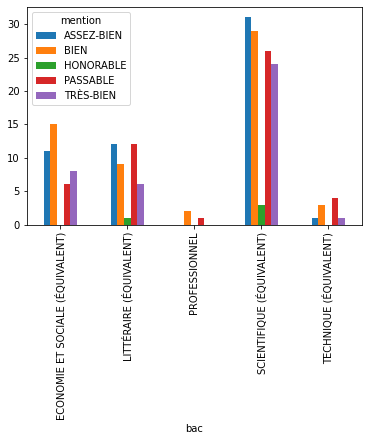

In [151]:
t = pd.crosstab(base_Ori_posbac.bac, base_Ori_posbac.mention)
t.plot.bar()

<AxesSubplot:xlabel='filiÃ¨re'>

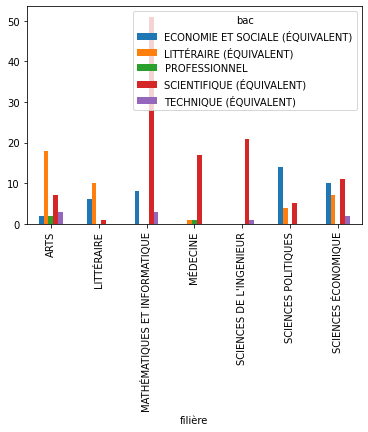

In [152]:
t = pd.crosstab(base_Ori_posbac.filiÃ¨re,base_Ori_posbac.bac)
t.plot.bar()

<AxesSubplot:xlabel='domaine_etu'>

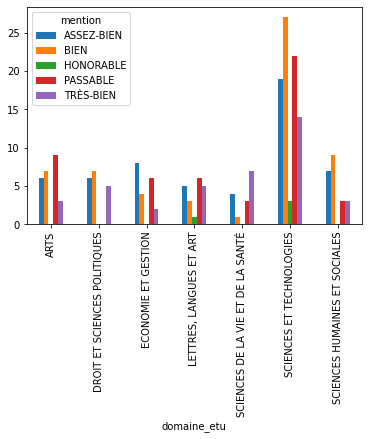

In [153]:
t = pd.crosstab(data_new8.domaine_etu,data_new2.mention)
t.plot.bar()

<AxesSubplot:xlabel='type_lieu_etu'>

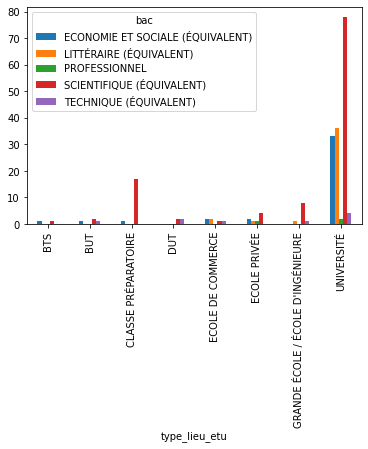

In [154]:
t = pd.crosstab(data_new8.type_lieu_etu,data_new3.bac)
t.plot.bar()

<AxesSubplot:xlabel='type_lieu_etu'>

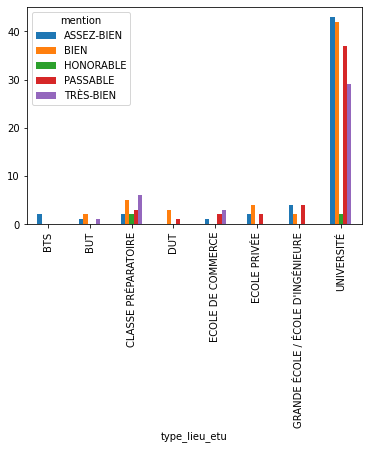

In [155]:
t = pd.crosstab(base_Ori_posbac.type_lieu_etu,base_Ori_posbac.mention)
t.plot.bar()

In [156]:
def pie_chart(df,nom_col,titre):    
    plt.figure()
    couleurs =  sns.color_palette('bright')
    df[nom_col].value_counts().plot(kind='pie',
                                              title=titre,

                                              autopct = '%0.0f%%', 
                                              colors = ["#EF553B", "#636EFA", "#00CC96" ])

    plt.show()

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

def pie_chart(df, nom_col, titre, couleurs=None):    
    plt.figure()

    if couleurs is None:
        couleurs = sns.color_palette('bright')

    valeurs = df[nom_col].value_counts()
    couleurs = sns.color_palette('bright', n_colors=len(valeurs))

    plt.pie(valeurs, labels=valeurs.index, autopct='%0.0f%%', colors=couleurs, startangle=90)

    plt.title(titre)
    plt.show()

# Exemple d'utilisation
# Supposons que vous ayez un DataFrame 'df' avec une colonne 'categories'
# pie_chart(df, 'categories', 'RÃ©partition des catÃ©gories')


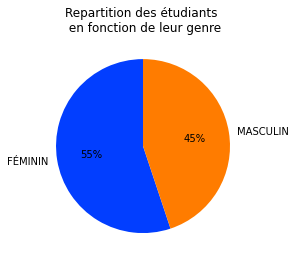

In [158]:
titre = "Repartition des Ã©tudiants \n en fonction de leur genre"
nom_col = 'genre'
pie_chart(base_Ori_posbac,nom_col,titre)

In [159]:
from collections import Counter

def dig_baton(sexe,domaine_etu):
    if sexe!="FÃ©minin".upper() and sexe!="Masculin".upper() : 
        data_f = base_Ori_posbac
    else:
        data_f = base_Ori_posbac[data["genre"] == sexe]
    categories = data_f[domaine_etu]
    compteur = Counter(categories)
    categories = list(compteur.keys())
    frequences = list(compteur.values())
    genre = "Diagramme en BÃ¢tons de domaine d'etude d'Ã©tudiants de sexe "+sexe
    plt.figure(figsize=(8, 6))  # Facultatif : dÃ©finissez la taille du graphique

    plt.bar(categories, frequences, color='blue')  # CrÃ©ez le diagramme en bÃ¢tons

    plt.xlabel("Domaine d'etude")  # Ajoutez une Ã©tiquette d'axe x
    plt.ylabel('Occurrences')  # Ajoutez une Ã©tiquette d'axe y
    plt.title(genre)  # Ajoutez un titre

    # Ajustez l'angle de rotation des Ã©tiquettes de l'axe x
    plt.xticks(rotation=90)  # Angle de rotation de 0 degrÃ© (horizontal)

    plt.show()  # Affichez le graphique


# Le domaine d'etude prÃ©fÃ©rÃ© des etudiants : 

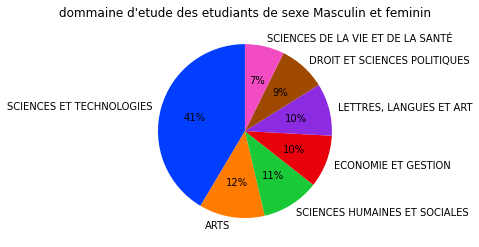

In [160]:
titre = "dommaine d'etude des etudiants de sexe Masculin et feminin"
nom_col = "domaine_etu"
pie_chart(base_Ori_posbac,nom_col,titre)

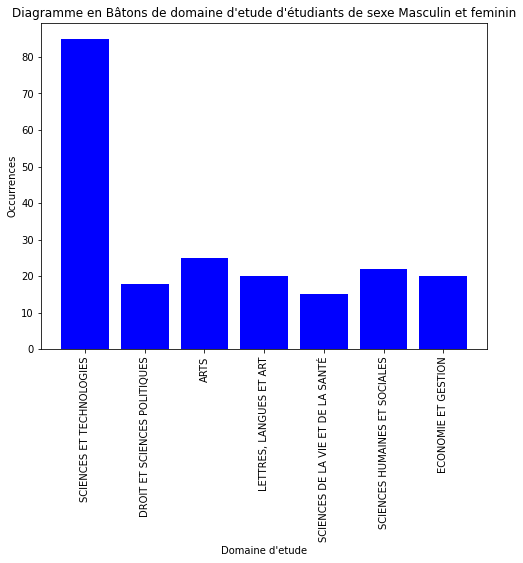

In [161]:
dig_baton("Masculin et feminin","domaine_etu")

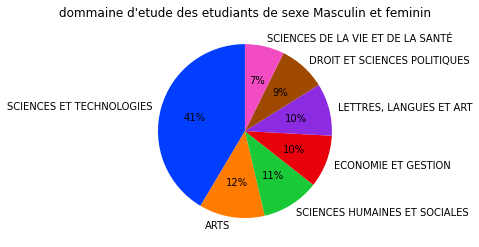

In [162]:
titre = "dommaine d'etude des etudiants de sexe Masculin et feminin"
nom_col = "domaine_etu"
pie_chart(base_Ori_posbac,nom_col,titre)

Text(0.5, 1.0, "Repartition du domaine d'etude en fonction du sexe de l'etudiant ")

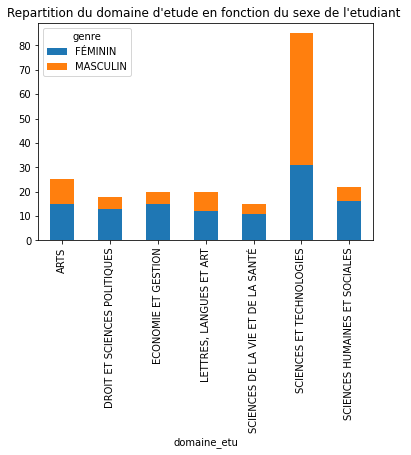

In [163]:
df_cross_tab = pd.crosstab(base_Ori_posbac.domaine_etu ,base_Ori_posbac.genre )
df_cross_tab.plot.bar(stacked = True)
plt.title("Repartition du domaine d'etude en fonction du sexe de l'etudiant ")

# Le domaine d'etude prÃ©fÃ©rÃ© des etudiants : 

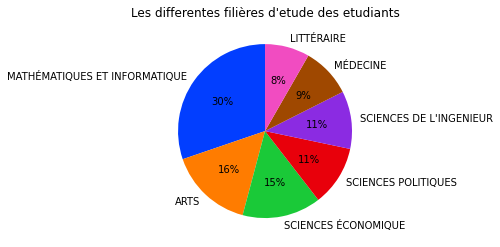

In [375]:
titre = "Les differentes filiÃ¨res d'etude des etudiants"
nom_col = "filiÃ¨re"
pie_chart(base_Ori_posbac,nom_col,titre)

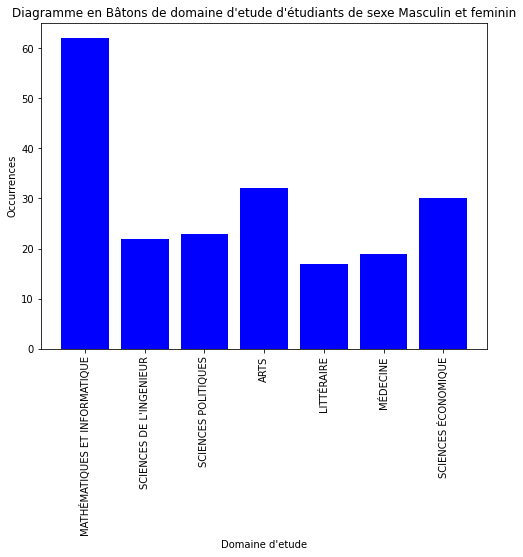

In [165]:
dig_baton("Masculin et feminin","filiÃ¨re")

In [166]:
#Le domaine d'etude prÃ©fÃ©rÃ© des etudiants de sexe FÃ©minin

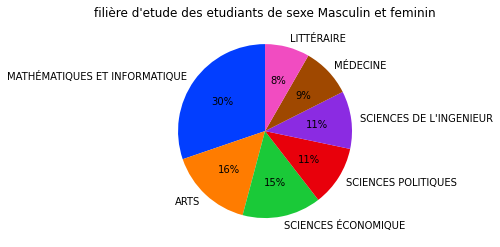

In [167]:
titre = "filiÃ¨re d'etude des etudiants de sexe Masculin et feminin"
nom_col = "filiÃ¨re"
pie_chart(base_Ori_posbac,nom_col,titre)

Text(0.5, 1.0, "Repartition des filiÃ¨res d'etude en fonction du sexe de l'etudiant ")

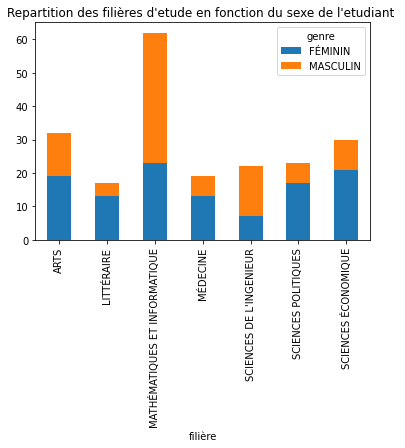

In [376]:
df_cross_tab = pd.crosstab(base_Ori_posbac.filiÃ¨re ,base_Ori_posbac.genre )
df_cross_tab.plot.bar(stacked = True)
plt.title("Repartition des filiÃ¨res d'etude en fonction du sexe de l'etudiant ")

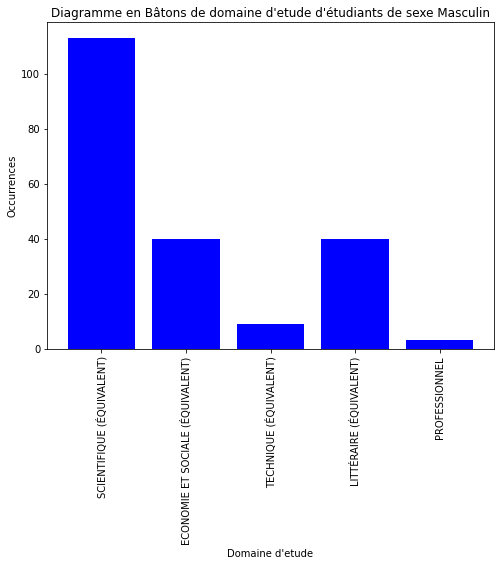

In [169]:
dig_baton("Masculin",'bac')

Text(0.5, 1.0, 'Repartition')

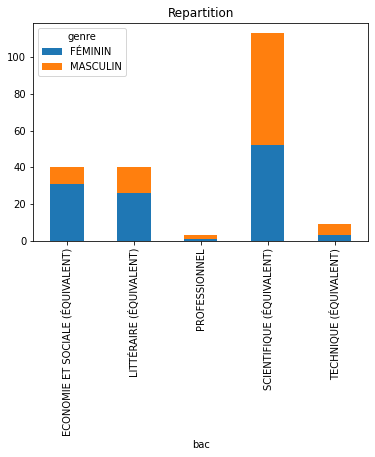

In [170]:
df_cross_tab = pd.crosstab(base_Ori_posbac.bac ,base_Ori_posbac.genre )
df_cross_tab.plot.bar(stacked = True)
plt.title("Repartition")

Text(0.5, 1.0, 'Repartition du status marital des employes  \n En fonction leurs nombres de compagnies')

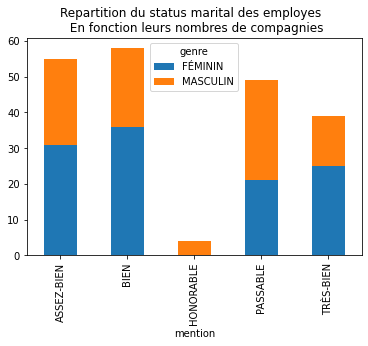

In [171]:
df_cross_tab = pd.crosstab(base_Ori_posbac.mention ,base_Ori_posbac.genre )
df_cross_tab.plot.bar(stacked = True)
plt.title("Repartition du status marital des employes  \n En fonction leurs nombres de compagnies")

Text(0.5, 1.0, 'Repartition du status marital des employes  \n En fonction leurs nombres de compagnies')

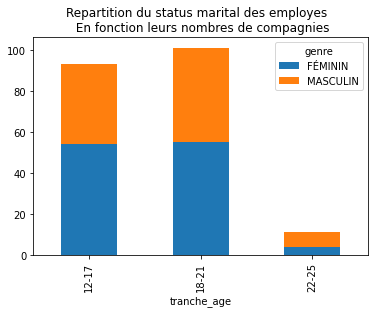

In [172]:
df_cross_tab = pd.crosstab(base_Ori_posbac.tranche_age ,base_Ori_posbac.genre )
df_cross_tab.plot.bar(stacked = True)
plt.title("Repartition du status marital des employes  \n En fonction leurs nombres de compagnies")

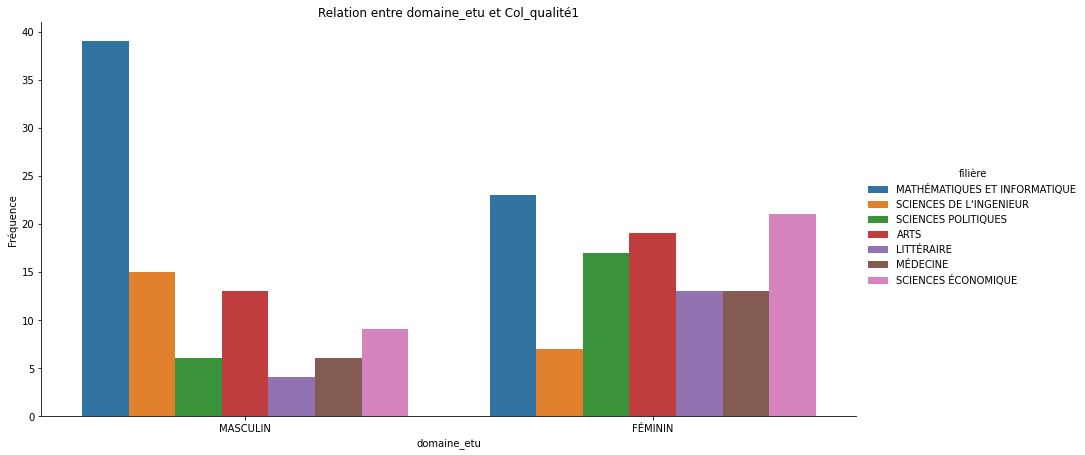

In [173]:
df = pd.DataFrame(data)

# Utilisez catplot pour visualiser le lien entre les deux variables
sns.catplot(x='genre', hue='filiÃ¨re', kind='count', data=base_Ori_posbac, height=6, aspect=2)
plt.title('Relation entre domaine_etu et Col_qualitÃ©1')
plt.xlabel('domaine_etu')
plt.ylabel('FrÃ©quence')
plt.show()


In [174]:
base_Ori_posbac

bac     mention  \
0           SCIENTIFIQUE (Ã‰QUIVALENT)  ASSEZ-BIEN   
1           SCIENTIFIQUE (Ã‰QUIVALENT)        BIEN   
2           SCIENTIFIQUE (Ã‰QUIVALENT)   HONORABLE   
3    ECONOMIE ET SOCIALE (Ã‰QUIVALENT)  ASSEZ-BIEN   
4           SCIENTIFIQUE (Ã‰QUIVALENT)        BIEN   
..                                ...         ...   
200         SCIENTIFIQUE (Ã‰QUIVALENT)    PASSABLE   
201         SCIENTIFIQUE (Ã‰QUIVALENT)        BIEN   
202         SCIENTIFIQUE (Ã‰QUIVALENT)  ASSEZ-BIEN   
203         SCIENTIFIQUE (Ã‰QUIVALENT)  ASSEZ-BIEN   
204         SCIENTIFIQUE (Ã‰QUIVALENT)    PASSABLE   

                           filiÃ¨re             type_etu  \
0    MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   
1    MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   
2          SCIENCES DE L'INGENIEUR  LONGUES (>= MASTER)   
3    MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   
4              SCIENCES POLITIQUES  LONGUES (>= MASTER)   
..                             ...                  ...   
200  MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   
201  MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   
202  MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   
203  MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   
204  MATHÃ‰MATIQUES ET INFORMATIQUE  LONGUES (>= MASTER)   

                      domaine_etu        type_lieu_etu  pays_bac tranche_age  \
0        SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰    FRANCE       18-21   
1        SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   AFRIQUE       12-17   
2        SCIENCES ET TECHNOLOGIES  CLASSE PRÃ‰PARATOIRE    FRANCE       12-17   
3        SCIENCES ET TECHNOLOGIES                  BUT    FRANCE       18-21   
4    DROIT ET SCIENCES POLITIQUES           UNIVERSITÃ‰    FRANCE       12-17   
..                            ...                  ...       ...         ...   
200      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰    FRANCE       12-17   
201      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   TUNISIE       18-21   
202      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   COMORES       18-21   
203      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰    FRANCE       18-21   
204      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰  CAMEROUN       18-21   

        genre Niveau_etu  type_cours satisfact_formation  \
0    MASCULIN     MASTER  PRÃ‰SENTIEL                 OUI   
1    MASCULIN     MASTER  PRÃ‰SENTIEL                 OUI   
2    MASCULIN     MASTER  PRÃ‰SENTIEL                 OUI   
3     FÃ‰MININ   BACHELOR  PRÃ‰SENTIEL                 OUI   
4    MASCULIN    LICENCE  PRÃ‰SENTIEL                 OUI   
..        ...        ...         ...                 ...   
200   FÃ‰MININ    LICENCE  PRÃ‰SENTIEL                 OUI   
201  MASCULIN     MASTER  PRÃ‰SENTIEL                 OUI   
202  MASCULIN     MASTER  PRÃ‰SENTIEL                 OUI   
203   FÃ‰MININ     MASTER  PRÃ‰SENTIEL                 OUI   
204  MASCULIN     MASTER    HYBRIDES                 NON   

                             Col_specialite1  \
0                              MATHÃ‰MATIQUES   
1                              MATHÃ‰MATIQUES   
2                    SCIENCES DE L'INGÃ‰NIEUR   
3           SCIENCES Ã‰CONOMIQUES ET SOCIALES   
4                              MATHÃ‰MATIQUES   
..                                       ...   
200  SCIENCES DE LA VIE ET DE LA TERRE (SVT)   
201                            MATHÃ‰MATIQUES   
202                            MATHÃ‰MATIQUES   
203                            MATHÃ‰MATIQUES   
204  SCIENCES DE LA VIE ET DE LA TERRE (SVT)   

                      Col_specialite2  \
0                          PAS DE SPÃ‰   
1                PHYSIQUE-CHIMIE (PC)   
2                          PAS DE SPÃ‰   
3                           HUMANITÃ‰S   
4                PHYSIQUE-CHIMIE (PC)   
..                                ...   
200                        PAS DE SPÃ‰   
201  SCIENCES Ã‰CONOMIQUES ET SOCIALES   
202    

In [175]:
base_Ori_posbac["filiÃ¨re"].value_counts()

MATHÃ‰MATIQUES ET INFORMATIQUE    62
ARTS                             32
SCIENCES Ã‰CONOMIQUE              30
SCIENCES POLITIQUES              23
SCIENCES DE L'INGENIEUR          22
MÃ‰DECINE                         19
LITTÃ‰RAIRE                       17
Name: filiÃ¨re, dtype: int64

In [176]:
#creation fichier csv
base_Ori_posbac.to_csv('Ori_posbac.csv', index=False)

In [177]:
import sqlite3
import pandas as pd

# Lire le fichier CSV dans un DataFrame
#df = pd.read_csv('votre_fichier.csv')

# CrÃ©er une connexion Ã  la base de donnÃ©es SQLite
conn = sqlite3.connect('base_Ori_posbac.db')

# Ã‰crire le DataFrame dans la base de donnÃ©es
base_Ori_posbac.to_sql('Ori_posbac', conn, index=False, if_exists='replace')

# Fermer la connexion
conn.close()

# Test de corelation :

In [178]:
base_Ori_posbac.type_etu

0      LONGUES (>= MASTER)
1      LONGUES (>= MASTER)
2      LONGUES (>= MASTER)
3      LONGUES (>= MASTER)
4      LONGUES (>= MASTER)
              ...         
200    LONGUES (>= MASTER)
201    LONGUES (>= MASTER)
202    LONGUES (>= MASTER)
203    LONGUES (>= MASTER)
204    LONGUES (>= MASTER)
Name: type_etu, Length: 205, dtype: object

In [179]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import numpy as np

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def test_independence(df):
    df = df.copy()
    results = []  # Liste pour stocker les rÃ©sultats
    l = []
    # SÃ©lectionner les colonnes catÃ©gorielles et numÃ©riques
    cat_columns = df.select_dtypes(include=["object"]).columns
    #num_columns = df.select_dtypes(include=["float64", "int64"]).columns

    # Test du chi2 pour les variables catÃ©gorielles
    for col1 in cat_columns:
        l.append(col1)
        for col2 in cat_columns:
            if col1 != col2 and col2 not in l:
                contingency_table = pd.crosstab(df[col1], df[col2])
                chi2, p_value, dof, expected = chi2_contingency(contingency_table)
                cramer_v = cramers_v(contingency_table.values)
                results.append({"Variable 1": col1, "Variable 2": col2, "Test": "Chi2", "P-value": p_value, "Cramer's V": cramer_v})

    # CrÃ©er un DataFrame Ã  partir des rÃ©sultats
    results_df = pd.DataFrame(results)
    return results_df

# Exemple d'utilisation avec un DataFrame 'df'
# Remplacez 'df' par votre propre DataFrame
results_dataframe = test_independence(base_Ori_posbac)
correlation = []
for pv in results_dataframe["P-value"]:
    if pv < 0.05:
        correlation.append("OUI")
    else:
        correlation.append("NON")

results_dataframe["INDEPENDANT"] = correlation
results_dataframe.head(27)


Variable 1                 Variable 2  Test       P-value  Cramer's V  \
0         bac                    mention  Chi2  7.463510e-01    0.000000   
1         bac                    filiÃ¨re  Chi2  2.857531e-19    0.387688   
2         bac                   type_etu  Chi2  2.133107e-01    0.093843   
3         bac                domaine_etu  Chi2  1.703247e-17    0.371852   
4         bac              type_lieu_etu  Chi2  6.944894e-04    0.193272   
5         bac                   pays_bac  Chi2  9.907212e-01    0.000000   
6         bac                tranche_age  Chi2  7.769440e-01    0.000000   
7         bac                      genre  Chi2  3.352225e-03    0.239945   
8         bac                 Niveau_etu  Chi2  2.609561e-03    0.165784   
9         bac                 type_cours  Chi2  3.210904e-03    0.192748   
10        bac        satisfact_formation  Chi2  1.109665e-01    0.130935   
11        bac            Col_specialite1  Chi2  3.280824e-22    0.438325   
12        bac            Col_specialite2  Chi2  2.485196e-23    0.458085   
13        bac       Col_matiÃ¨re_prefere1  Chi2  4.580411e-17    0.393531   
14        bac       Col_matiÃ¨re_prefere2  Chi2  9.382924e-08    0.288940   
15        bac  Col_domaine_activite_pro1  Chi2  4.475707e-01    0.037143   
16    mention                    filiÃ¨re  Chi2  1.581210e-01    0.091520   
17    mention                   type_etu  Chi2  2.987042e-01    0.065344   
18    mention                domaine_etu  Chi2  1.863752e-01    0.085184   
19    mention              type_lieu_etu  Chi2  1.229581e-01    0.103906   
20    mention                   pays_bac  Chi2  6.531163e-02    0.152011   
21    mention                tranche_age  Chi2  4.437955e-03    0.187230   
22    mention                      genre  Chi2  3.522156e-02    0.175880   
23    mention                 Niveau_etu  Chi2  2.664137e-01    0.064743   
24    mention                 type_cours  Chi2  9.442007e-01    0.000000   
25    mention        satisfact_formation  Chi2  9.073130e-01    0.000000   
26    mention            Col_specialite1  Chi2  2.008507e-02    0.158591   

   INDEPENDANT  
0          NON  
1          OUI  
2          NON  
3          OUI  
4          OUI  
5          NON  
6          NON  
7          OUI  
8          OUI  
9          OUI  
10         NON  
11         OUI  
12         OUI  
13         OUI  
14         OUI  
15         NON  
16         NON  
17         NON  
18         NON  
19         NON  
20         NON  
21         OUI  
22         OUI  
23         NON  
24         NON  
25         NON  
26         OUI

In [180]:
#results_dataframe.loc[results_dataframe['correlation'] == "NON"]

non = trouve_ma_ligne(results_dataframe,'INDEPENDANT',"NON")
non.loc[non['Variable 1'] == "bac"]

Variable 1                 Variable 2  Test   P-value  Cramer's V  \
0         bac                    mention  Chi2  0.746351    0.000000   
2         bac                   type_etu  Chi2  0.213311    0.093843   
5         bac                   pays_bac  Chi2  0.990721    0.000000   
6         bac                tranche_age  Chi2  0.776944    0.000000   
10        bac        satisfact_formation  Chi2  0.110966    0.130935   
15        bac  Col_domaine_activite_pro1  Chi2  0.447571    0.037143   

   INDEPENDANT  
0          NON  
2          NON  
5          NON  
6          NON  
10         NON  
15         NON

In [181]:
l = ['bac', 'mention', 'filiÃ¨re','type_etu', 'domaine_etu', 'type_lieu_etu', 'pays_bac', 
      'tranche_age', 'genre', 'Niveau_etu','type_cours',
      'satisfact_formation','Col_specialite1', 'Col_specialite2',
      'Col_matiÃ¨re_prefere1', 'Col_matiÃ¨re_prefere2','Col_domaine_activite_pro1']

In [182]:
'Col_matiÃ¨re_prefere2','Col_specialite2'

('Col_matiÃ¨re_prefere2', 'Col_specialite2')

In [183]:
df = base_Ori_posbac[l]

In [184]:
# Description de la base de donnÃ©es
df.describe(include="all")

bac mention                        filiÃ¨re  \
count                         205     205                            205   
unique                          5       5                              7   
top     SCIENTIFIQUE (Ã‰QUIVALENT)    BIEN  MATHÃ‰MATIQUES ET INFORMATIQUE   
freq                          113      58                             62   

                   type_etu               domaine_etu type_lieu_etu pays_bac  \
count                   205                       205           205      205   
unique                    2                         7             8       19   
top     LONGUES (>= MASTER)  SCIENCES ET TECHNOLOGIES    UNIVERSITÃ‰   FRANCE   
freq                    166                        85           153      141   

       tranche_age    genre Niveau_etu  type_cours satisfact_formation  \
count          205      205        205         205                 205   
unique           3        2          6           3                   2   
top          18-21  FÃ‰MININ    LICENCE  PRÃ‰SENTIEL                 OUI   
freq           101      113        100         150                 185   

       Col_specialite1 Col_specialite2 Col_matiÃ¨re_prefere1  \
count              205             205                  205   
unique              11              13                   11   
top      MATHÃ‰MATIQUES      PAS DE SPÃ‰        MATHÃ‰MATIQUES   
freq                98              73                   76   

       Col_matiÃ¨re_prefere2 Col_domaine_activite_pro1  
count                   205                       205  
unique                   12                        83  
top           NON RENSEIGNÃ‰             NON RENSEIGNÃ‰  
freq                     70                        58

In [185]:
# VÃ©rification des doublons

# VÃ©rifier les doublons
duplicates = df.duplicated()
print(f"Nombre de lignes dupliquÃ©es : {duplicates.sum()}")



Nombre de lignes dupliquÃ©es : 0


# Analyses univariÃ©es

# Analyses bivariÃ©es

# SÃ©lection des variables

In [186]:
l = ['bac', 'mention', 'filiÃ¨re','type_etu', 'domaine_etu', 'type_lieu_etu', 'pays_bac', 
      'tranche_age', 'genre', 'Niveau_etu','type_cours',
      'satisfact_formation','Col_specialite1', 'Col_specialite2',
      'Col_matiÃ¨re_prefere1', 'Col_matiÃ¨re_prefere2','Col_domaine_activite_pro1']



In [187]:
# SÃ©lection des variables basÃ©e sur la variance
# columns = l
# Calculer la variance pour chaque caractÃ©ristique
# variances = np.var(df, axis=0)
# sorted_indices = np.argsort(variances)[::-1]

# Afficher la courbe des variances
# plt.figure(figsize=(15, 5))
# plt.bar(x=columns[sorted_indices], height=variances[sorted_indices])
# plt.xticks(rotation=90)
# plt.xlabel('CaractÃ©ristiques')
# plt.ylabel('Variance')
# plt.title('SÃ©lection des caractÃ©ristiques basÃ©e sur la variance')
# plt.show()



# Les tests statistiques

In [188]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Charger les donnÃ©es
data = base_Ori_posbac

# SÃ©lectionner les variables d'intÃ©rÃªt
variables_catÃ©gorielles = l
variables_quantitatives = []

# Variable Ã  expliquer
variable_expliquee = 'filiÃ¨re'

# CrÃ©er un DataFrame pour stocker les rÃ©sultats des tests
resultats_test = pd.DataFrame(columns=['Variable_explicative', 'Statistique', 'P_value', 'Cramer_V', 'Interpretation'])

# Fonction pour interprÃ©ter la p-value
def interpreter_p_value(p_value):
    if p_value < 0.05:
        return 'Significatif'
    else:
        return 'Non significatif'

# Effectuer les tests pour les variables catÃ©gorielles (Chi2)
for var_explicative in variables_catÃ©gorielles:
    tableau_contingence = pd.crosstab(data[var_explicative], data[variable_expliquee])
    stat_chi2, p_value, dof, expected = chi2_contingency(tableau_contingence)
    cramer_v = cramers_v(tableau_contingence.values)
    interpretation = interpreter_p_value(p_value)
    resultats_test = resultats_test.append({
        'Variable_explicative': var_explicative,
        'Statistique': stat_chi2,
        'P_value': p_value,
        'Cramer_V': cramer_v,
        'Interpretation': interpretation
    }, ignore_index=True)

# Effectuer les tests pour les variables quantitatives (t-test)
for var_explicative in variables_quantitatives:
    groupe_1 = data[data[variable_expliquee] == 1][var_explicative]
    groupe_0 = data[data[variable_expliquee] == 0][var_explicative]
    stat_t, p_value = ttest_ind(groupe_1, groupe_0, equal_var=False)
    interpretation = interpreter_p_value(p_value)
    resultats_test = resultats_test.append({
        'Variable_explicative': var_explicative,
        'Statistique': stat_t,
        'P_value': p_value,
        'Cramer_V': 'N/A',  # Ajoutez le coefficient de Cramer pour les variables quantitatives si nÃ©cessaire
        'Interpretation': interpretation
    }, ignore_index=True)

# Afficher les rÃ©sultats des tests
print("test d'indepence entre la variable Ã  expliquer et les variables explicatives")
resultats_test


test d'indepence entre la variable Ã  expliquer et les variables explicatives


Variable_explicative  Statistique        P_value  Cramer_V  \
0                         bac   144.948398   2.857531e-19  0.387688   
1                     mention    30.851152   1.581210e-01  0.091520   
2                     filiÃ¨re  1230.000000  6.037476e-235  1.000000   
3                    type_etu     6.495215   3.700568e-01  0.047785   
4                 domaine_etu   660.115337  8.823179e-116  0.722938   
5               type_lieu_etu    74.778196   1.381067e-03  0.165179   
6                    pays_bac   136.660679   3.254362e-02  0.153506   
7                 tranche_age    12.112609   4.366788e-01  0.011510   
8                       genre    23.664759   6.018340e-04  0.294024   
9                  Niveau_etu   109.294081   5.993866e-11  0.281348   
10                 type_cours     6.639182   8.805084e-01  0.000000   
11        satisfact_formation     9.076927   1.692978e-01  0.122226   
12            Col_specialite1   175.258871   3.194383e-13  0.310322   
13            Col_specialite2   183.098179   1.227832e-11  0.304574   
14       Col_matiÃ¨re_prefere1   227.189785   2.828412e-21  0.373897   
15       Col_matiÃ¨re_prefere2   198.640066   3.287200e-15  0.332918   
16  Col_domaine_activite_pro1   618.958335   8.343565e-05  0.322995   

      Interpretation  
0       Significatif  
1   Non significatif  
2       Significatif  
3   Non significatif  
4       Significatif  
5       Significatif  
6       Significatif  
7   Non significatif  
8       Significatif  
9       Significatif  
10  Non significatif  
11  Non significatif  
12      Significatif  
13      Significatif  
14      Significatif  
15      Significatif  
16      Significatif

In [189]:
from scipy.stats import chi2_contingency
# SÃ©lectionner les variables catÃ©gorielles
df_new = df.drop(columns=['filiÃ¨re'])

cat_vars = list(df_new.columns)

# Initialiser les listes pour stocker les rÃ©sultats
var_names = []
chi2_stats = []
p_values = []
cramer_vs = []

# Parcourir toutes les variables catÃ©gorielles
for var in cat_vars:
    # Calculer le tableau de contingence
    contingency_table = pd.crosstab(df['filiÃ¨re'], df_new[var])
    # Calculer la statistique de test du Chi-deux et la p-valeur
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Calculer le coefficient V de Cramer
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r,k = contingency_table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rc = r-((r-1)**2)/(n-1)
    kc = k-((k-1)**2)/(n-1)
    cramer_v = np.sqrt(phi2corr/min(rc-1,kc-1))
    # Ajouter les rÃ©sultats aux listes correspondantes
    var_names.append(var)
    chi2_stats.append(chi2)
    p_values.append(p)
    cramer_vs.append(cramer_v)

# CrÃ©er un DataFrame avec les rÃ©sultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Chi2': chi2_stats,
    'P-valeur': p_values,
    'V de Cramer': cramer_vs
})

# Trier le DataFrame par ordre croissant de V de Cramer
results_df.sort_values(by='V de Cramer', inplace=True,ascending=False)

# Afficher le tableau des rÃ©sultats
print(results_df)

                     Variable        Chi2       P-valeur  V de Cramer
3                 domaine_etu  660.115337  8.823179e-116     0.722938
0                         bac  144.948398   2.857531e-19     0.387688
13       Col_matiÃ¨re_prefere1  227.189785   2.828412e-21     0.373897
14       Col_matiÃ¨re_prefere2  198.640066   3.287200e-15     0.332918
15  Col_domaine_activite_pro1  618.958335   8.343565e-05     0.322995
11            Col_specialite1  175.258871   3.194383e-13     0.310322
12            Col_specialite2  183.098179   1.227832e-11     0.304574
7                       genre   23.664759   6.018340e-04     0.294024
8                  Niveau_etu  109.294081   5.993866e-11     0.281348
4               type_lieu_etu   74.778196   1.381067e-03     0.165179
5                    pays_bac  136.660679   3.254362e-02     0.153506
10        satisfact_formation    9.076927   1.692978e-01     0.122226
1                     mention   30.851152   1.581210e-01     0.091520
2                 

Les variables qui expliques la variable cible (filiÃ¨re):

Les variable qui n'explique pas la variable cible (filiÃ¨re):

In [190]:
from scipy.stats import chi2_contingency

# Initialiser les DataFrame pour les coefficients de CramÃ©r et les p-values
cramer_v_df = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
p_value_df = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
tschuprow_t_df = pd.DataFrame(index=categorical_columns, columns=categorical_columns)


# Calculer le test de chi-deux pour chaque paire de variables qualitatives
for i, column1 in enumerate(categorical_columns):
    for j, column2 in enumerate(categorical_columns):
        if column1 != column2:
            contingency_table = pd.crosstab(df[column1], df[column2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            cramer_v = np.sqrt(chi2 / (df.shape[0] * (min(contingency_table.shape) - 1)))
            tschuprow_t = cramer_v * np.sqrt((contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1) / (df.shape[0] - 1))
            cramer_v_df.loc[column1, column2] = cramer_v
            tschuprow_t_df.loc[column1, column2] = tschuprow_t
            p_value_df.loc[column1, column2] = p

            
# Afficher la DataFrame des p-values
print("\nDataFrame des p-values :")
p_value_df.style.set_properties(**{'border-color': 'black', 'border-width': '1px', 'border-style': 'solid'})           



NameError: name 'categorical_columns' is not defined

In [191]:
# Afficher la DataFrame des coefficients de CramÃ©r
print("DataFrame des coefficients de CramÃ©r :")
cramer_v_df.style.background_gradient(cmap='Greens', high=0.4, low=0).set_properties(**{'border-color': 'black', 'border-width': '1px', 'border-style': 'solid'})

DataFrame des coefficients de CramÃ©r :


NameError: name 'cramer_v_df' is not defined

In [192]:
# Afficher la DataFrame des coefficients de Tchuprow
print("\nDataFrame des coefficients de Tchuprow :")
tschuprow_t_df.style.background_gradient(cmap='Greens', high=0.4, low=0).set_properties(**{'border-color': 'black', 'border-width': '1px', 'border-style': 'solid'})




DataFrame des coefficients de Tchuprow :


NameError: name 'tschuprow_t_df' is not defined

# V - ModÃ©lisation des donnÃ©es 
CrÃ©ation des modÃ¨les prÃ©dictifs prÃ©cis

In [257]:
var_retuenues = ['bac', 'filiÃ¨re' , 'domaine_etu', 'type_lieu_etu', 'pays_bac', 
       'genre', 'Niveau_etu','Col_specialite1','Col_specialite2','Col_matiÃ¨re_prefere2',
      'Col_matiÃ¨re_prefere1', "Col_domaine_activite_pro1"]

# 'satisfact_formation' , 'mention','type_etu','tranche_age',,'type_cours'
df = base_Ori_posbac[var_retuenues]

In [258]:
df

bac                        filiÃ¨re  \
0           SCIENTIFIQUE (Ã‰QUIVALENT)  MATHÃ‰MATIQUES ET INFORMATIQUE   
1           SCIENTIFIQUE (Ã‰QUIVALENT)  MATHÃ‰MATIQUES ET INFORMATIQUE   
2           SCIENTIFIQUE (Ã‰QUIVALENT)        SCIENCES DE L'INGENIEUR   
3    ECONOMIE ET SOCIALE (Ã‰QUIVALENT)  MATHÃ‰MATIQUES ET INFORMATIQUE   
4           SCIENTIFIQUE (Ã‰QUIVALENT)            SCIENCES POLITIQUES   
..                                ...                            ...   
200         SCIENTIFIQUE (Ã‰QUIVALENT)  MATHÃ‰MATIQUES ET INFORMATIQUE   
201         SCIENTIFIQUE (Ã‰QUIVALENT)  MATHÃ‰MATIQUES ET INFORMATIQUE   
202         SCIENTIFIQUE (Ã‰QUIVALENT)  MATHÃ‰MATIQUES ET INFORMATIQUE   
203         SCIENTIFIQUE (Ã‰QUIVALENT)  MATHÃ‰MATIQUES ET INFORMATIQUE   
204         SCIENTIFIQUE (Ã‰QUIVALENT)  MATHÃ‰MATIQUES ET INFORMATIQUE   

                      domaine_etu        type_lieu_etu  pays_bac     genre  \
0        SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰    FRANCE  MASCULIN   
1        SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   AFRIQUE  MASCULIN   
2        SCIENCES ET TECHNOLOGIES  CLASSE PRÃ‰PARATOIRE    FRANCE  MASCULIN   
3        SCIENCES ET TECHNOLOGIES                  BUT    FRANCE   FÃ‰MININ   
4    DROIT ET SCIENCES POLITIQUES           UNIVERSITÃ‰    FRANCE  MASCULIN   
..                            ...                  ...       ...       ...   
200      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰    FRANCE   FÃ‰MININ   
201      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   TUNISIE  MASCULIN   
202      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰   COMORES  MASCULIN   
203      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰    FRANCE   FÃ‰MININ   
204      SCIENCES ET TECHNOLOGIES           UNIVERSITÃ‰  CAMEROUN  MASCULIN   

    Niveau_etu                          Col_specialite1  \
0       MASTER                            MATHÃ‰MATIQUES   
1       MASTER                            MATHÃ‰MATIQUES   
2       MASTER                  SCIENCES DE L'INGÃ‰NIEUR   
3     BACHELOR         SCIENCES Ã‰CONOMIQUES ET SOCIALES   
4      LICENCE                            MATHÃ‰MATIQUES   
..         ...                                      ...   
200    LICENCE  SCIENCES DE LA VIE ET DE LA TERRE (SVT)   
201     MASTER                            MATHÃ‰MATIQUES   
202     MASTER                            MATHÃ‰MATIQUES   
203     MASTER                            MATHÃ‰MATIQUES   
204     MASTER  SCIENCES DE LA VIE ET DE LA TERRE (SVT)   

                      Col_specialite2  \
0                          PAS DE SPÃ‰   
1                PHYSIQUE-CHIMIE (PC)   
2                          PAS DE SPÃ‰   
3                           HUMANITÃ‰S   
4                PHYSIQUE-CHIMIE (PC)   
..                                ...   
200                        PAS DE SPÃ‰   
201  SCIENCES Ã‰CONOMIQUES ET SOCIALES   
202                        PAS DE SPÃ‰   
203                        PAS DE SPÃ‰   
204                        PAS DE SPÃ‰   

                        Col_matiÃ¨re_prefere2  \
0                       PHYSIQUE-CHIMIE (PC)   
1                       PHYSIQUE-CHIMIE (PC)   
2                       PHYSIQUE-CHIMIE (PC)   
3                                        ART   
4                                PHILOSOPHIE   
..                                       ...   
200  SCIENCES DE LA VIE ET DE LA TERRE (SVT)   
201         SCIENCES Ã‰CONOMIQUES ET SOCIALES   
202       SCIENCES NUMÃ‰RIQUES ET TECHNOLOGIE   
203       SCIENCES NUMÃ‰RIQUES ET TECHNOLOGIE   
204                       LANGUES Ã‰TRANGÃˆRES   

                        Col_matiÃ¨re_prefere1   Col_domaine_activite_pro1  
0                              MATHÃ‰MATIQUES          DOMAINE DE LA DATA  
1                              MATHÃ‰MATIQUES                    ACTUAIRE  
2                              MATHÃ‰MATIQUES            MATHS APPLIQUÃ‰ES  
3                                PHILOSOPHIE                   Ã‰DUCATION  
4                  

one-hot-encoding

In [259]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Liste des colonnes ordinale Ã  encoder
colonnes_ordinale = ["Niveau_etu"]

df_encoded_ord =df[colonnes_ordinale]
# Liste des colonnes ordinales Ã  encoder
colonnes_ordinale = df_encoded_ord.select_dtypes(include=['object']).columns

# Initialiser l'encodeur ordinal

encoder = OrdinalEncoder()

# Appliquer l'encodage sur toutes les colonnes ordinales
df_encoded_ord[colonnes_ordinale] = encoder.fit_transform(df[colonnes_ordinale])

# Afficher le rÃ©sultat
df_encoded_ord

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

Niveau_etu
0           5.0
1           5.0
2           5.0
3           1.0
4           4.0
..          ...
200         4.0
201         5.0
202         5.0
203         5.0
204         5.0

[205 rows x 1 columns]

# Variable Nominale

In [260]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

colonnes_nominale = ['bac', 'type_lieu_etu','genre','domaine_etu',
      'Col_specialite1','Col_specialite2','Col_matiÃ¨re_prefere1',
      'Col_matiÃ¨re_prefere2',"Col_domaine_activite_pro1"]
# Liste des colonnes nominales Ã  encoder
#colonnes_nominale = df.select_dtypes(include=['object']).columns
dn =df[colonnes_nominale]
# Conversion des variables catÃ©gorielles en variables indicatrices
df_encoded_nom = pd.get_dummies(dn, columns=colonnes_nominale,drop_first=True)
df_encoded_nom 

bac_LITTÃ‰RAIRE (Ã‰QUIVALENT)  bac_PROFESSIONNEL  \
0                              0                  0   
1                              0                  0   
2                              0                  0   
3                              0                  0   
4                              0                  0   
..                           ...                ...   
200                            0                  0   
201                            0                  0   
202                            0                  0   
203                            0                  0   
204                            0                  0   

     bac_SCIENTIFIQUE (Ã‰QUIVALENT)  bac_TECHNIQUE (Ã‰QUIVALENT)  \
0                                1                           0   
1                                1                           0   
2                                1                           0   
3                                0                           0   
4                                1                           0   
..                             ...                         ...   
200                              1                           0   
201                              1                           0   
202                              1                           0   
203                              1                           0   
204                              1                           0   

     type_lieu_etu_BUT  type_lieu_etu_CLASSE PRÃ‰PARATOIRE  type_lieu_etu_DUT  \
0                    0                                  0                  0   
1                    0                                  0                  0   
2                    0                                  1                  0   
3                    1                                  0                  0   
4                    0                                  0                  0   
..                 ...                                ...                ...   
200                  0                                  0                  0   
201                  0                                  0                  0   
202                  0                                  0                  0   
203                  0                                  0                  0   
204                  0                                  0                  0   

     type_lieu_etu_ECOLE DE COMMERCE  type_lieu_etu_ECOLE PRIVÃ‰E  \
0                                  0                           0   
1                                  0                           0   
2                                  0                           0   
3                                  0                           0   
4                                  0                           0   
..                               ...                         ...   
200                                0                           0   
201                                0                           0   
202                                0                           0   
203                                0                           0   
204                                0                           0   

     type_lieu_etu_GRANDE Ã‰COLE / Ã‰COLE D'INGÃ‰NIEURE  ...  \
0                                                  0  ...   
1                                                  0  ...   
2                                                  0  ...   
3                                                  0  ...   
4                                                  0  ...   
..                                               ...  ...   
200                                                0  ...   
201                                                0  ...   
202                                                0  ...   
203                                                0  ...   
204                                                0  ...   

     Col_domaine_activite_pro1_

In [261]:
# Encodage de la variable cible avec LabelEncoder


In [262]:
from sklearn.preprocessing import LabelEncoder
# Encodage de la variable cible avec LabelEncoder
label_encoder = LabelEncoder()
df_encoded_nom['filiÃ¨re'] = label_encoder.fit_transform(df['filiÃ¨re'])
#df_encoded("Col_specialite2", axis=1)
df_encoded_nom 

bac_LITTÃ‰RAIRE (Ã‰QUIVALENT)  bac_PROFESSIONNEL  \
0                              0                  0   
1                              0                  0   
2                              0                  0   
3                              0                  0   
4                              0                  0   
..                           ...                ...   
200                            0                  0   
201                            0                  0   
202                            0                  0   
203                            0                  0   
204                            0                  0   

     bac_SCIENTIFIQUE (Ã‰QUIVALENT)  bac_TECHNIQUE (Ã‰QUIVALENT)  \
0                                1                           0   
1                                1                           0   
2                                1                           0   
3                                0                           0   
4                                1                           0   
..                             ...                         ...   
200                              1                           0   
201                              1                           0   
202                              1                           0   
203                              1                           0   
204                              1                           0   

     type_lieu_etu_BUT  type_lieu_etu_CLASSE PRÃ‰PARATOIRE  type_lieu_etu_DUT  \
0                    0                                  0                  0   
1                    0                                  0                  0   
2                    0                                  1                  0   
3                    1                                  0                  0   
4                    0                                  0                  0   
..                 ...                                ...                ...   
200                  0                                  0                  0   
201                  0                                  0                  0   
202                  0                                  0                  0   
203                  0                                  0                  0   
204                  0                                  0                  0   

     type_lieu_etu_ECOLE DE COMMERCE  type_lieu_etu_ECOLE PRIVÃ‰E  \
0                                  0                           0   
1                                  0                           0   
2                                  0                           0   
3                                  0                           0   
4                                  0                           0   
..                               ...                         ...   
200                                0                           0   
201                                0                           0   
202                                0                           0   
203                                0                           0   
204                                0                           0   

     type_lieu_etu_GRANDE Ã‰COLE / Ã‰COLE D'INGÃ‰NIEURE  ...  \
0                                                  0  ...   
1                                                  0  ...   
2                                                  0  ...   
3                                                  0  ...   
4                                                  0  ...   
..                                               ...  ...   
200                                                0  ...   
201                                                0  ...   
202                                                0  ...   
203                                                0  ...   
204                                                0  ...   

     Col_domaine_activite_pro1_

In [386]:
df_encoded = pd.concat([df_encoded_ord, df_encoded_nom], axis=1)
df_encoded

Niveau_etu  bac_LITTÃ‰RAIRE (Ã‰QUIVALENT)  bac_PROFESSIONNEL  \
0           5.0                            0                  0   
1           5.0                            0                  0   
2           5.0                            0                  0   
3           1.0                            0                  0   
4           4.0                            0                  0   
..          ...                          ...                ...   
200         4.0                            0                  0   
201         5.0                            0                  0   
202         5.0                            0                  0   
203         5.0                            0                  0   
204         5.0                            0                  0   

     bac_SCIENTIFIQUE (Ã‰QUIVALENT)  bac_TECHNIQUE (Ã‰QUIVALENT)  \
0                                1                           0   
1                                1                           0   
2                                1                           0   
3                                0                           0   
4                                1                           0   
..                             ...                         ...   
200                              1                           0   
201                              1                           0   
202                              1                           0   
203                              1                           0   
204                              1                           0   

     type_lieu_etu_BUT  type_lieu_etu_CLASSE PRÃ‰PARATOIRE  type_lieu_etu_DUT  \
0                    0                                  0                  0   
1                    0                                  0                  0   
2                    0                                  1                  0   
3                    1                                  0                  0   
4                    0                                  0                  0   
..                 ...                                ...                ...   
200                  0                                  0                  0   
201                  0                                  0                  0   
202                  0                                  0                  0   
203                  0                                  0                  0   
204                  0                                  0                  0   

     type_lieu_etu_ECOLE DE COMMERCE  type_lieu_etu_ECOLE PRIVÃ‰E  ...  \
0                                  0                           0  ...   
1                                  0                           0  ...   
2                                  0                           0  ...   
3                                  0                           0  ...   
4                                  0                           0  ...   
..                               ...                         ...  ...   
200                                0                           0  ...   
201                                0                           0  ...   
202                                0                           0  ...   
203                                0                           0  ...   
204                                0                           0  ...   

     Col_domaine_activite_pro1_TECHNIQUE  Col_domaine_activite_pro1_TOURISME  \
0                                      0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   
..                                   ...                                 ...   
200

In [392]:
df_encoded[:1]

Empty DataFrame
Columns: [Niveau_etu, bac_LITTÃ‰RAIRE (Ã‰QUIVALENT), bac_PROFESSIONNEL, bac_SCIENTIFIQUE (Ã‰QUIVALENT), bac_TECHNIQUE (Ã‰QUIVALENT), type_lieu_etu_BUT, type_lieu_etu_CLASSE PRÃ‰PARATOIRE, type_lieu_etu_DUT, type_lieu_etu_ECOLE DE COMMERCE, type_lieu_etu_ECOLE PRIVÃ‰E, type_lieu_etu_GRANDE Ã‰COLE / Ã‰COLE D'INGÃ‰NIEURE, type_lieu_etu_UNIVERSITÃ‰, genre_MASCULIN, domaine_etu_DROIT ET SCIENCES POLITIQUES, domaine_etu_ECONOMIE ET GESTION, domaine_etu_LETTRES, LANGUES ET ART, domaine_etu_SCIENCES DE LA VIE ET DE LA SANTÃ‰, domaine_etu_SCIENCES ET TECHNOLOGIES, domaine_etu_SCIENCES HUMAINES ET SOCIALES, Col_specialite1_HISTOIRE-GÃ‰OGRAPHIE ( HGGSP ), Col_specialite1_LITTÃ‰RATURE ET PHILOSOPHIE, Col_specialite1_MATHÃ‰MATIQUES, Col_specialite1_NUMÃ‰RIQUES ET SCIENCES INFORMATIQUES, Col_specialite1_PAS DE SPÃ‰, Col_specialite1_PHYSIQUE-CHIMIE (PC), Col_specialite1_SCIENCES DE L'INGÃ‰NIEUR, Col_specialite1_SCIENCES DE LA VIE ET DE LA TERRE (SVT), Col_specialite1_SCIENCES HUMAINES, Col_specialite1_SCIENCES Ã‰CONOMIQUES ET SOCIALES, Col_specialite2_ARTS, Col_specialite2_HISTOIRE-GÃ‰OGRAPHIE ( HGGSP ), Col_specialite2_HUMANITÃ‰S, Col_specialite2_LANGUES, Col_specialite2_LITTÃ‰RATURE ET PHILOSOPHIE, Col_specialite2_LITTÃ‰RATURES ET CULTURES Ã‰TRANGÃˆRES, Col_specialite2_NUMÃ‰RIQUES ET SCIENCES INFORMATIQUES, Col_specialite2_PAS DE SPÃ‰, Col_specialite2_PHYSIQUE-CHIMIE (PC), Col_specialite2_SCIENCES DE L'INGÃ‰NIEUR, Col_specialite2_SCIENCES DE LA VIE ET DE LA TERRE (SVT), Col_specialite2_SCIENCES Ã‰CONOMIQUES ET SOCIALES, Col_matiÃ¨re_prefere1_FRANÃ‡AIS, Col_matiÃ¨re_prefere1_HISTOIRE-GÃ‰OGRAPHIE ( HGGSP ), Col_matiÃ¨re_prefere1_LANGUES Ã‰TRANGÃˆRES, Col_matiÃ¨re_prefere1_MATHÃ‰MATIQUES, Col_matiÃ¨re_prefere1_PHILOSOPHIE, Col_matiÃ¨re_prefere1_PHYSIQUE-CHIMIE (PC), Col_matiÃ¨re_prefere1_SCIENCES DE LA VIE ET DE LA TERRE (SVT), Col_matiÃ¨re_prefere1_SCIENCES NUMÃ‰RIQUES ET TECHNOLOGIE, Col_matiÃ¨re_prefere1_SCIENCES Ã‰CONOMIQUES ET SOCIALES, Col_matiÃ¨re_prefere1_Ã‰DUCATION PHYSIQUE ET SPORTIVE, Col_matiÃ¨re_prefere2_FRANÃ‡AIS, Col_matiÃ¨re_prefere2_HISTOIRE-GÃ‰OGRAPHIE ( HGGSP ), Col_matiÃ¨re_prefere2_LANGUES Ã‰TRANGÃˆRES, Col_matiÃ¨re_prefere2_MARKETING ET COMMUNICATION, Col_matiÃ¨re_prefere2_NON RENSEIGNÃ‰, Col_matiÃ¨re_prefere2_PHILOSOPHIE, Col_matiÃ¨re_prefere2_PHYSIQUE-CHIMIE (PC), Col_matiÃ¨re_prefere2_SCIENCES DE LA VIE ET DE LA TERRE (SVT), Col_matiÃ¨re_prefere2_SCIENCES NUMÃ‰RIQUES ET TECHNOLOGIE, Col_matiÃ¨re_prefere2_SCIENCES Ã‰CONOMIQUES ET SOCIALES, Col_matiÃ¨re_prefere2_Ã‰DUCATION PHYSIQUE ET SPORTIVE, Col_domaine_activite_pro1_ADMINISTRATION PUBLIQUE, Col_domaine_activite_pro1_AEROSPATIALE, Col_domaine_activite_pro1_ANIMATION, Col_domaine_activite_pro1_ARCHITECTURE, Col_domaine_activite_pro1_ART, Col_domaine_activite_pro1_ARTISTE, Col_domaine_activite_pro1_ASSOCIATIF, Col_domaine_activite_pro1_ASSURANCE, Col_domaine_activite_pro1_ASTRONOMIE, Col_domaine_activite_pro1_AUCUN, Col_domaine_activite_pro1_AUDIOVISUEL, Col_domaine_activite_pro1_BANQUE, Col_domaine_activite_pro1_BANQUE ASSURANCE, Col_domaine_activite_pro1_BIO-INFORMATIQUES, Col_domaine_activite_pro1_CARACTER DESIGNER, Col_domaine_activite_pro1_CHEFFERIE DE PROJET, Col_domaine_activite_pro1_CINEMA, Col_domaine_activite_pro1_CINÃ‰MA, Col_domaine_activite_pro1_COMPTABILITÃ‰, Col_domaine_activite_pro1_COMÃ‰DIEN, Col_domaine_activite_pro1_CYBER SECURITY, Col_domaine_activite_pro1_DATA ANALYSE, Col_domaine_activite_pro1_DATA ANALYST, Col_domaine_activite_pro1_DEVELOPPEUR, Col_domaine_activite_pro1_DOMAINE DE LA DATA, Col_domaine_activite_pro1_DROIT IMMOBILIER, Col_domaine_activite_pro1_DÃ‰VELOPPEMENT DE LOGICIELS, Col_domaine_activite_pro1_DÃ‰VELOPPEMENT JEUX VIDEO, Col_domaine_activite_pro1_ECONOMIE ET GESTION, Col_domaine_activite_pro1_ENSEIGNEMENT, Col_domaine_activite_pro1_ESTHÃ‰TIQUE, Col_domaine_activite_pro1_GESTION DES ENTREPRISES, Col_domaine_activite_pro1_HAUT FONCTIONNAIRE, Col_domaine_activite_pro1_HUMANITAIRE, Col_domaine_activite_pro1_IMMOBILIE

In [200]:
# Importer les bibliothÃ¨ques nÃ©cessaires
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import math
import re

In [395]:
X = df_encoded.drop('filiÃ¨re', axis=1)
y = df_encoded['filiÃ¨re']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 RandomForest

In [202]:
rf_classifier = RandomForestClassifier(criterion="gini")
#rf_classifier.fit(X_train, y_train)

l = [50, 100, 150, 200,250,300,350,400,450,500]
param_grid = ({"n_estimators":l})
gs = GridSearchCV(rf_classifier,param_grid,cv = 3,scoring = "accuracy")
gs.fit(X_train, y_train )

n=list(gs.cv_results_['rank_test_score'])
index_n=n.index(min(n))
n_est= list(gs.cv_results_['param_n_estimators'])
n_est=n_est[index_n]
n_est


500

In [330]:
clf3 = RandomForestClassifier(n_estimators=50,criterion="gini")
clf3.fit(X_train, y_train)

y_pred_test = clf3.predict(X_test)
y_pred_train = clf3.predict(X_train)


In [331]:
err_em = zero_one_loss(y_train, y_pred_train)
err_g = zero_one_loss(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_em = accuracy_score(y_train, y_pred_train)

print("Accuracy empirique :", accuracy_em)
print("Erreur empirique :", err_em)
print("Accuracy en gÃ©nÃ©ralisation :", accuracy_test)
print("Erreur en gÃ©nÃ©ralisation :",err_g)

Accuracy empirique : 1.0
Erreur empirique : 0.0
Accuracy en gÃ©nÃ©ralisation : 0.5853658536585366
Erreur en gÃ©nÃ©ralisation : 0.41463414634146345


In [297]:
# Inversement de l'encodage des prÃ©dictions
y_pred_decoded = label_encoder.inverse_transform(y_pred_test)
y_pred_decoded

array(['ARTS', 'ARTS', 'MATHÃ‰MATIQUES ET INFORMATIQUE',
       'SCIENCES Ã‰CONOMIQUE', 'MATHÃ‰MATIQUES ET INFORMATIQUE',
       'SCIENCES POLITIQUES', 'MATHÃ‰MATIQUES ET INFORMATIQUE',
       'SCIENCES Ã‰CONOMIQUE', 'ARTS', 'MATHÃ‰MATIQUES ET INFORMATIQUE',
       'MATHÃ‰MATIQUES ET INFORMATIQUE', 'SCIENCES Ã‰CONOMIQUE',
       'MATHÃ‰MATIQUES ET INFORMATIQUE', 'SCIENCES Ã‰CONOMIQUE',
       'MATHÃ‰MATIQUES ET INFORMATIQUE', 'MATHÃ‰MATIQUES ET INFORMATIQUE',
       'ARTS', 'MATHÃ‰MATIQUES ET INFORMATIQUE', 'SCIENCES POLITIQUES',
       'ARTS', "SCIENCES DE L'INGENIEUR", 'MATHÃ‰MATIQUES ET INFORMATIQUE',
       'SCIENCES POLITIQUES', 'MATHÃ‰MATIQUES ET INFORMATIQUE', 'ARTS',
       'LITTÃ‰RAIRE', 'SCIENCES Ã‰CONOMIQUE', 'SCIENCES Ã‰CONOMIQUE',
       "SCIENCES DE L'INGENIEUR", 'LITTÃ‰RAIRE',
       'MATHÃ‰MATIQUES ET INFORMATIQUE', 'SCIENCES Ã‰CONOMIQUE', 'MÃ‰DECINE',
       'MATHÃ‰MATIQUES ET INFORMATIQUE', 'MATHÃ‰MATIQUES ET INFORMATIQUE',
       'LITTÃ‰RAIRE', 'ARTS', 'MATHÃ‰MATIQUE

['RandomForest.pkl']

KNN

In [207]:
def erreur_emp_ge_knn(k,Xtrain,ytrain,Xtest,ytest):
    #importation du module de moÃ¨le qu'on veut appliquer sur nos donnnee
    from sklearn import neighbors

    # importation du module qui permet de calculer l'erreur empirique de generalisation
    from sklearn.metrics import mean_squared_error

    # definition du moÃ¨le
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)

    #Entrainement du modÃ¨le
    knn.fit(Xtrain, ytrain)

    # Prediction sur les donnÃ©s d'entrainement
    y_pred_train = knn.predict(Xtrain)
    # Prediction sur les donnÃ©es de test
    y_pred_test = knn.predict(Xtest)

    # Calcule de l'erreur empirique
    err_em = mean_squared_error(ytrain, y_pred_train)
    # Calcule de l'erreur de generalisation
    err_g = mean_squared_error(ytest, y_pred_test)

    err=list((err_em,err_g))
    return err

In [208]:
def data_err_reg_val(k):
    l_err_em=[]
    l_err_g=[]
    k_val=list(range(3,k+1))
    for d in range(3,k+1):
        erreur=erreur_emp_ge_knn(d,X_train,y_train,X_test,y_test)
        l_err_em.append(erreur[0])
        l_err_g.append(erreur[1])
        #d_val.append(d)

    dico_err = {'k':k_val,"Erreur_empirique":l_err_em,
                'Erreur_de_generalisation':l_err_g}
    data_err=pd.DataFrame(data=dico_err)
    return data_err

In [209]:
data_erreurs = data_err_reg_val(164)

<AxesSubplot:xlabel='k'>

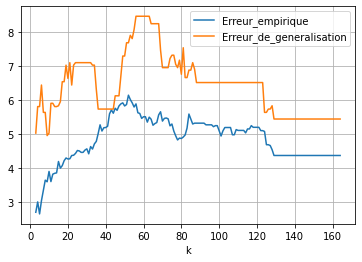

In [210]:
data_erreurs.plot(x="k",grid=True)

In [211]:
d_val = data_erreurs.k
d_val[np.argmin(data_erreurs.Erreur_de_generalisation)]

9

In [212]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

# Calcule de l'erreur empirique
err_em = zero_one_loss(y_train, y_pred_train)
# Calcule de l'erreur de generalisation
err_g = zero_one_loss(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_em = accuracy_score(y_train, y_pred_train)
print("Accuracy empirique :", accuracy_em)
print("Erreur empirique :", err_em)
print("Accuracy en gÃ©nÃ©ralisation :", accuracy_test)
print("Erreur en gÃ©nÃ©ralisation :",err_g)

Accuracy empirique : 0.6707317073170732
Erreur empirique : 0.3292682926829268
Accuracy en gÃ©nÃ©ralisation : 0.5365853658536586
Erreur en gÃ©nÃ©ralisation : 0.46341463414634143


# Regression lineaire

In [328]:
clf = LogisticRegression(penalty='l2',)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [329]:
# Ã‰valuation du modÃ¨le
err_test = zero_one_loss(y_test, y_pred_test)
err_emp = zero_one_loss(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"erreur train du modÃ¨le : {err_emp}")
print(f"PrÃ©cision train du modÃ¨le : {accuracy_train}")
print("")
print(f"erreur test du modÃ¨le : {err_test}")
print(f"PrÃ©cision test du modÃ¨le : {accuracy_test}")


erreur train du modÃ¨le : 0.030487804878048808
PrÃ©cision train du modÃ¨le : 0.9695121951219512

erreur test du modÃ¨le : 0.3414634146341463
PrÃ©cision test du modÃ¨le : 0.6585365853658537


In [270]:
import joblib

# Save both the model and encoding objects
joblib.dump((model,encoder, label_encoder), 'RandomForest.pkl')



In [267]:
pd.concat([df2, df])

bac               domaine_etu  \
0           SCIENTIFIQUE (Ã‰QUIVALENT)  SCIENCES ET TECHNOLOGIES   
0           SCIENTIFIQUE (Ã‰QUIVALENT)  SCIENCES ET TECHNOLOGIES   
1           SCIENTIFIQUE (Ã‰QUIVALENT)  SCIENCES ET TECHNOLOGIES   
2           SCIENTIFIQUE (Ã‰QUIVALENT)  SCIENCES ET TECHNOLOGIES   
3    ECONOMIE ET SOCIALE (Ã‰QUIVALENT)  SCIENCES ET TECHNOLOGIES   
..                                ...                       ...   
200         SCIENTIFIQUE (Ã‰QUIVALENT)  SCIENCES ET TECHNOLOGIES   
201         SCIENTIFIQUE (Ã‰QUIVALENT)  SCIENCES ET TECHNOLOGIES   
202         SCIENTIFIQUE (Ã‰QUIVALENT)  SCIENCES ET TECHNOLOGIES   
203         SCIENTIFIQUE (Ã‰QUIVALENT)  SCIENCES ET TECHNOLOGIES   
204         SCIENTIFIQUE (Ã‰QUIVALENT)  SCIENCES ET TECHNOLOGIES   

           type_lieu_etu     genre Niveau_etu  \
0             UNIVERSITÃ‰  MASCULIN     MASTER   
0             UNIVERSITÃ‰  MASCULIN     MASTER   
1             UNIVERSITÃ‰  MASCULIN     MASTER   
2    CLASSE PRÃ‰PARATOIRE  MASCULIN     MASTER   
3                    BUT   FÃ‰MININ   BACHELOR   
..                   ...       ...        ...   
200           UNIVERSITÃ‰   FÃ‰MININ    LICENCE   
201           UNIVERSITÃ‰  MASCULIN     MASTER   
202           UNIVERSITÃ‰  MASCULIN     MASTER   
203           UNIVERSITÃ‰   FÃ‰MININ     MASTER   
204           UNIVERSITÃ‰  MASCULIN     MASTER   

                             Col_specialite1  \
0                              MATHÃ‰MATIQUES   
0                              MATHÃ‰MATIQUES   
1                              MATHÃ‰MATIQUES   
2                    SCIENCES DE L'INGÃ‰NIEUR   
3           SCIENCES Ã‰CONOMIQUES ET SOCIALES   
..                                       ...   
200  SCIENCES DE LA VIE ET DE LA TERRE (SVT)   
201                            MATHÃ‰MATIQUES   
202                            MATHÃ‰MATIQUES   
203                            MATHÃ‰MATIQUES   
204  SCIENCES DE LA VIE ET DE LA TERRE (SVT)   

                      Col_specialite2  \
0                          PAS DE SPÃ‰   
0                          PAS DE SPÃ‰   
1                PHYSIQUE-CHIMIE (PC)   
2                          PAS DE SPÃ‰   
3                           HUMANITÃ‰S   
..                                ...   
200                        PAS DE SPÃ‰   
201  SCIENCES Ã‰CONOMIQUES ET SOCIALES   
202                        PAS DE SPÃ‰   
203                        PAS DE SPÃ‰   
204                        PAS DE SPÃ‰   

                        Col_matiÃ¨re_prefere2  \
0         SCIENCES NUMÃ‰RIQUES ET TECHNOLOGIE   
0                       PHYSIQUE-CHIMIE (PC)   
1                       PHYSIQUE-CHIMIE (PC)   
2                       PHYSIQUE-CHIMIE (PC)   
3                                        ART   
..                                       ...   
200  SCIENCES DE LA VIE ET DE LA TERRE (SVT)   
201         SCIENCES Ã‰CONOMIQUES ET SOCIALES   
202       SCIENCES NUMÃ‰RIQUES ET TECHNOLOGIE   
203       SCIENCES NUMÃ‰RIQUES ET TECHNOLOGIE   
204                       LANGUES Ã‰TRANGÃˆRES   

                        Col_matiÃ¨re_prefere1   Col_domaine_activite_pro1  \
0                              MATHÃ‰MATIQUES          DOMAINE DE LA DATA   
0                              MATHÃ‰MATIQUES          DOMAINE DE LA DATA   
1                              MATHÃ‰MATIQUES                    ACTUAIRE   
2                              MATHÃ‰MATIQUES            MATHS APPLIQUÃ‰ES   
3                                PHILOSOPHIE                   Ã‰DUCATION   
..                                       ...                         ...   
200                            MATHÃ‰MATIQUES                 DEVELOPPEUR   
201                            MATHÃ‰MATIQUES          DOMAINE DE LA DATA   
202                            MATHÃ‰MATIQUES          DOMAINE DE LA DATA   
203                            MATHÃ‰MATIQUES  DÃ‰VELOPPEMENT DE LOGICIELS   
204  SCIENCES DE LA VIE ET DE LA TERRE (SVT)  DÃ‰VELOPPEMENT DE LOGICIELS   

                     

In [348]:
df1 = df 
def model(data):
    # Liste des colonnes ordinale Ã  encoder
    df = pd.concat([data, df1])
    colonnes_ordinale = ["Niveau_etu"]

    df_encoded_ord =df[colonnes_ordinale]
    # Liste des colonnes ordinales Ã  encoder
    colonnes_ordinale = df_encoded_ord.select_dtypes(include=['object']).columns

    # Initialiser l'encodeur ordinal

    encoder = OrdinalEncoder()

    # Appliquer l'encodage sur toutes les colonnes ordinales
    df_encoded_ord[colonnes_ordinale] = encoder.fit_transform(df[colonnes_ordinale])

    




    colonnes_nominale = ['bac', 'type_lieu_etu','genre','domaine_etu',
          'Col_specialite1','Col_specialite2','Col_matiÃ¨re_prefere1',
          'Col_matiÃ¨re_prefere2',"Col_domaine_activite_pro1"]
    # Liste des colonnes nominales Ã  encoder
    #colonnes_nominale = df.select_dtypes(include=['object']).columns
    dn =df[colonnes_nominale]
    # Conversion des variables catÃ©gorielles en variables indicatrices
    df_encoded_nom = pd.get_dummies(dn, columns=colonnes_nominale,drop_first=True)
    df_encoded_nom 




    from sklearn.preprocessing import LabelEncoder
    # Encodage de la variable cible avec LabelEncoder
    label_encoder = LabelEncoder()
    #df_encoded_nom['filiÃ¨re'] = label_encoder.fit_transform(df['filiÃ¨re'])
    #df_encoded("Col_specialite2", axis=1)
    
    
    
    df_encoded = pd.concat([df_encoded_ord, df_encoded_nom], axis=1)

    ind = df_encoded.head(1)
    
    
    y_pred_test = clf.predict(ind)
    label_encoder.fit(df['filiÃ¨re'])
    y_pred_decoded = label_encoder.inverse_transform(y_pred_test)
    
    return y_pred_decoded[0]

In [347]:
model(df2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

Niveau_etu  bac_LITTÃ‰RAIRE (Ã‰QUIVALENT)  bac_PROFESSIONNEL  \
0           1.0                            0                  0   
0           5.0                            0                  0   
1           5.0                            0                  0   
2           5.0                            0                  0   
3           1.0                            0                  0   
..          ...                          ...                ...   
200         4.0                            0                  0   
201         5.0                            0                  0   
202         5.0                            0                  0   
203         5.0                            0                  0   
204         5.0                            0                  0   

     bac_SCIENTIFIQUE (Ã‰QUIVALENT)  bac_TECHNIQUE (Ã‰QUIVALENT)  \
0                                1                           0   
0                                1                           0   
1                                1                           0   
2                                1                           0   
3                                0                           0   
..                             ...                         ...   
200                              1                           0   
201                              1                           0   
202                              1                           0   
203                              1                           0   
204                              1                           0   

     type_lieu_etu_BUT  type_lieu_etu_CLASSE PRÃ‰PARATOIRE  type_lieu_etu_DUT  \
0                    0                                  0                  0   
0                    0                                  0                  0   
1                    0                                  0                  0   
2                    0                                  1                  0   
3                    1                                  0                  0   
..                 ...                                ...                ...   
200                  0                                  0                  0   
201                  0                                  0                  0   
202                  0                                  0                  0   
203                  0                                  0                  0   
204                  0                                  0                  0   

     type_lieu_etu_ECOLE DE COMMERCE  type_lieu_etu_ECOLE PRIVÃ‰E  ...  \
0                                  0                           0  ...   
0                                  0                           0  ...   
1                                  0                           0  ...   
2                                  0                           0  ...   
3                                  0                           0  ...   
..                               ...                         ...  ...   
200                                0                           0  ...   
201                                0                           0  ...   
202                                0                           0  ...   
203                                0                           0  ...   
204                                0                           0  ...   

     Col_domaine_activite_pro1_SYSTÃˆMES EMBARQUÃ‰S  \
0                                               0   
0                                               0   
1                                               0   
2                                               0   
3                                               0   
..                                            ...   
200                                             0   
201                                             0   
202                                             0   
203                            

In [217]:
import tkinter as tk
from tkinter import ttk



In [8]:

# CrÃ©ation de la fenÃªtre
fenetre = tk.Tk()

# Fonction Ã  appeler lorsque l'option sÃ©lectionnÃ©e change
def option_selectionnee(event):
    valeur_selectionnee = combo.get()
    print("Option sÃ©lectionnÃ©e :", valeur_selectionnee)

# CrÃ©ation de la liste dÃ©roulante
options = ['bac','domaine_etu', 'type_lieu_etu', 'pays_bac', 
       'genre', 'Niveau_etu','Col_specialite1','Col_specialite2','Col_matiÃ¨re_prefere2',
      'Col_matiÃ¨re_prefere1', "Col_domaine_activite_pro1"]
combo = ttk.Combobox(fenetre, values=options)
combo.bind("<<ComboboxSelected>>", option_selectionnee)
combo.pack()

# Affichage de la fenÃªtre
fenetre.mainloop()

Option sÃ©lectionnÃ©e : type_lieu_etu


In [9]:
l = []
c= fenetre.mainloop()
l.append(c)

In [14]:

import pandas as pd
import tkinter as tk
from tkinter import ttk

# Fonction pour crÃ©er le DataFrame Ã  partir de la sÃ©lection
def create_dataframe():
    # RÃ©cupÃ©rer les valeurs sÃ©lectionnÃ©es
    selected_values = [combo1.get(), combo2.get(), combo3.get(), combo4.get(), combo5.get(), combo6.get(), combo7.get(),combo8.get()]

    # CrÃ©er un dictionnaire avec les colonnes et les valeurs sÃ©lectionnÃ©es
    data = {
        'Colonne 1': [selected_values[0]],
        'Colonne 2': [selected_values[1]],
        'Colonne 3': [selected_values[2]],
        'Colonne 4': [selected_values[3]],
        'Colonne 5': [selected_values[4]],
        'Colonne 6': [selected_values[5]],
        'Colonne 7': [selected_values[6]],
        'Colonne 8': [selected_values[7]]
    }

    # CrÃ©er le DataFrame Ã  partir du dictionnaire
    df = pd.DataFrame(data)
    print(df)

# CrÃ©ation de la fenÃªtre
window = tk.Tk()

# Liste des options pour les listes dÃ©roulantes
options = ['bac','domaine_etu', 'type_lieu_etu', 'pays_bac', 
       'genre', 'Niveau_etu','Col_specialite1','Col_specialite2','Col_matiÃ¨re_prefere2',
      'Col_matiÃ¨re_prefere1', "Col_domaine_activite_pro1"]

# CrÃ©ation des listes dÃ©roulantes
combo1 = ttk.Combobox(window, values=options)
combo1.pack()

combo2 = ttk.Combobox(window, values=options)
combo2.pack()

combo3 = ttk.Combobox(window, values=options)
combo3.pack()

combo4 = ttk.Combobox(window, values=options)
combo4.pack()

combo5 = ttk.Combobox(window, values=options)
combo5.pack()

combo6 = ttk.Combobox(window, values=options)
combo6.pack()

combo7 = ttk.Combobox(window, values=options)
combo7.pack()

combo8 = ttk.Combobox(window, values=options)
combo8.pack()

# Bouton pour crÃ©er le DataFrame
button = tk.Button(window, text="CrÃ©er DataFrame", command=create_dataframe)
button.pack()

# Lancement de la boucle principale
data = window.mainloop()

     Colonne 1      Colonne 2 Colonne 3 Colonne 4 Colonne 5   Colonne 6  \
0  domaine_etu  type_lieu_etu  pays_bac  pays_bac     genre  Niveau_etu   

              Colonne 7             Colonne 8  
0  Col_matiÃ¨re_prefere2  Col_matiÃ¨re_prefere2  


In [16]:
data

choix3


In [223]:
def var(v):
    return list(base_Ori_posbac[v].unique())

In [362]:
import tkinter as tk
from tkinter import ttk
import pandas as pd

def create_dataframe():
    option1 = dropdown1.get()
    option2 = dropdown2.get()
    option3 = dropdown3.get()
    option4 = dropdown4.get()
    option5 = dropdown5.get()
    option6 = dropdown6.get()
    option7 = dropdown7.get()
    option8 = dropdown8.get()
    option9 = dropdown9.get()
    option10 = dropdown10.get()

    data = {'bac': [option1],'domaine_etu': [option2],'type_lieu_etu': [option3],'genre': [option4],
            'Niveau_etu': [option5],'Col_specialite1': [option6],'Col_specialite2': [option7],'Col_matiÃ¨re_prefere2': [option8],
           'Col_matiÃ¨re_prefere1': [option9],'Col_domaine_activite_pro1': [option10]}
    
    df = pd.DataFrame(data)
    return df

# CrÃ©e une fenÃªtre
window = tk.Tk()

# CrÃ©e une liste dÃ©roulante pour l'option 1
ttk.Label(window, text="Bac:").pack()
dropdown1 = ttk.Combobox(window, values=var('bac'))
dropdown1.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Domaine d'Ã©tudes:").pack()
dropdown2 = ttk.Combobox(window, values=var('domaine_etu'))
dropdown2.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Type de lieu d'Ã©tudes:").pack()
dropdown3 = ttk.Combobox(window, values=var('type_lieu_etu'))
dropdown3.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Genre:").pack()
dropdown4 = ttk.Combobox(window, values=var('genre'))
dropdown4.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Niveau d'Ã©tudes:").pack()
dropdown5 = ttk.Combobox(window, values=var('Niveau_etu'))
dropdown5.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="SpÃ©cialitÃ© 1:").pack()
dropdown6 = ttk.Combobox(window, values=var('Col_specialite1'))
dropdown6.pack()


# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="SpÃ©cialitÃ© 2:").pack()
dropdown7 = ttk.Combobox(window, values=var('Col_specialite2'))
dropdown7.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="MatiÃ¨re prÃ©fÃ©rÃ©e 2:").pack()
dropdown8 = ttk.Combobox(window, values=var('Col_matiÃ¨re_prefere2'))
dropdown8.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="MatiÃ¨re prÃ©fÃ©rÃ©e 1:").pack()
dropdown9 = ttk.Combobox(window, values=var('Col_matiÃ¨re_prefere1'))
dropdown9.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Domaine d'activitÃ© professionnel:").pack()
dropdown10 = ttk.Combobox(window, values=var("Col_domaine_activite_pro1"))
dropdown10.pack()


# Ajoute un bouton pour crÃ©er la DataFrame
button = tk.Button(window, text="CrÃ©er DataFrame", command=window.quit)
button.pack()

# Lance la boucle principale de la fenÃªtre
window.mainloop()

# CrÃ©e la DataFrame en appelant la fonction create_dataframe()
df2 = create_dataframe()
print(df2)


                                bac domaine_etu type_lieu_etu     genre  \
0  ECONOMIE ET SOCIALE (Ã‰QUIVALENT)        ARTS           BUT  MASCULIN   

  Niveau_etu          Col_specialite1 Col_specialite2  \
0    LICENCE  SCIENCES DE L'INGÃ‰NIEUR       HUMANITÃ‰S   

             Col_matiÃ¨re_prefere2 Col_matiÃ¨re_prefere1  \
0  Ã‰DUCATION PHYSIQUE ET SPORTIVE                  ART   

    Col_domaine_activite_pro1  
0  DÃ‰VELOPPEMENT DE LOGICIELS  


In [369]:
df2

bac domaine_etu type_lieu_etu     genre  \
0  ECONOMIE ET SOCIALE (Ã‰QUIVALENT)        ARTS           BUT  MASCULIN   

  Niveau_etu          Col_specialite1 Col_specialite2  \
0    LICENCE  SCIENCES DE L'INGÃ‰NIEUR       HUMANITÃ‰S   

             Col_matiÃ¨re_prefere2 Col_matiÃ¨re_prefere1  \
0  Ã‰DUCATION PHYSIQUE ET SPORTIVE                  ART   

    Col_domaine_activite_pro1  
0  DÃ‰VELOPPEMENT DE LOGICIELS

In [360]:
import tkinter as tk
from tkinter import ttk
import pandas as pd

def create_dataframe():
    option1 = dropdown1.get()
    option2 = dropdown2.get()
    option3 = dropdown3.get()
    option4 = dropdown4.get()
    option5 = dropdown5.get()
    option6 = dropdown6.get()
    option7 = dropdown7.get()
    option8 = dropdown8.get()
    option9 = dropdown9.get()
    option10 = dropdown10.get()

    data = {'bac': [option1],'domaine_etu': [option2],'type_lieu_etu': [option3],'genre': [option4],
            'Niveau_etu': [option5],'Col_specialite1': [option6],'Col_specialite2': [option7],'Col_matiÃ¨re_prefere2': [option8],
           'Col_matiÃ¨re_prefere1': [option9],'Col_domaine_activite_pro1': [option10]}
    
    df = pd.DataFrame(data)
    return df


def display_result():
    df2 = create_dataframe()
    result = model(df2)
    return result_label.config(text=result)



# CrÃ©e une fenÃªtre
window = tk.Tk()

# CrÃ©e une liste dÃ©roulante pour l'option 1
ttk.Label(window, text="Bac:").pack()
dropdown1 = ttk.Combobox(window, values=var('bac'))
dropdown1.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Domaine d'Ã©tudes:").pack()
dropdown2 = ttk.Combobox(window, values=var('domaine_etu'))
dropdown2.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Type de lieu d'Ã©tudes:").pack()
dropdown3 = ttk.Combobox(window, values=var('type_lieu_etu'))
dropdown3.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Genre:").pack()
dropdown4 = ttk.Combobox(window, values=var('genre'))
dropdown4.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Niveau d'Ã©tudes:").pack()
dropdown5 = ttk.Combobox(window, values=var('Niveau_etu'))
dropdown5.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="SpÃ©cialitÃ© 1:").pack()
dropdown6 = ttk.Combobox(window, values=var('Col_specialite1'))
dropdown6.pack()


# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="SpÃ©cialitÃ© 2:").pack()
dropdown7 = ttk.Combobox(window, values=var('Col_specialite2'))
dropdown7.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="MatiÃ¨re prÃ©fÃ©rÃ©e 2:").pack()
dropdown8 = ttk.Combobox(window, values=var('Col_matiÃ¨re_prefere2'))
dropdown8.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="MatiÃ¨re prÃ©fÃ©rÃ©e 1:").pack()
dropdown9 = ttk.Combobox(window, values=var('Col_matiÃ¨re_prefere1'))
dropdown9.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Domaine d'activitÃ© professionnel:").pack()
dropdown10 = ttk.Combobox(window, values=var("Col_domaine_activite_pro1"))
dropdown10.pack()


# Ajoutez les autres labels et les widgets de ComboBox pour les autres options

result_label = ttk.Label(window, text="")
result_label.pack()

result_button = tk.Button(window, text="Afficher le rÃ©sultat", command=display_result)
result_button.pack()

window.mainloop()

In [381]:
import tkinter as tk
from tkinter import ttk, scrolledtext
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Fonction pour crÃ©er la DataFrame
def create_dataframe():
    
    option1 = dropdown1.get()
    option2 = dropdown2.get()
    option3 = dropdown3.get()
    option4 = dropdown4.get()
    option5 = dropdown5.get()
    option6 = dropdown6.get()
    option7 = dropdown7.get()
    option8 = dropdown8.get()
    option9 = dropdown9.get()
    option10 = dropdown10.get()

    data = {'bac': [option1], 'domaine_etu': [option2], 'type_lieu_etu': [option3], 'genre': [option4],
            'Niveau_etu': [option5], 'Col_specialite1': [option6], 'Col_specialite2': [option7],
            'Col_matiÃ¨re_prefere2': [option8], 'Col_matiÃ¨re_prefere1': [option9],
            'Col_domaine_activite_pro1': [option10]}
    
    df = pd.DataFrame(data)
    return df

# Fonction pour exÃ©cuter le modÃ¨le
def run_model():
    global df2  # Assurez-vous que df2 est accessible ici
    
    # ExÃ©cutez votre fonction model avec df2
    model_result = model(df2)
    
    # Affichez le rÃ©sultat dans la zone de texte
    result_text.delete(1.0, tk.END)  # Efface le texte prÃ©cÃ©dent
    result_text.insert(tk.END, model_result)

# Fonction modÃ¨le
# Fonction modÃ¨le
df = df1
def model(data):
    
    colonnes_ordinale = ["Niveau_etu"]
    df_encoded_ord = df[colonnes_ordinale].copy()  # Utilisez copy() pour Ã©viter la copie par rÃ©fÃ©rence
    
    # Initialiser l'encodeur ordinal
    encoder = OrdinalEncoder()
    
    # Appliquer l'encodage sur toutes les colonnes ordinales
    df_encoded_ord.loc[:, colonnes_ordinale] = encoder.fit_transform(df[colonnes_ordinale])
    
    colonnes_nominale = ['bac', 'type_lieu_etu', 'genre', 'domaine_etu',
          'Col_specialite1', 'Col_specialite2', 'Col_matiÃ¨re_prefere1',
          'Col_matiÃ¨re_prefere2', "Col_domaine_activite_pro1"]
    
    dn = df[colonnes_nominale]
    
    # Conversion des variables catÃ©gorielles en variables indicatrices
    df_encoded_nom = pd.get_dummies(dn, columns=colonnes_nominale, drop_first=True)
    
    df_encoded = pd.concat([df_encoded_ord, df_encoded_nom], axis=1)

    

    clf = LogisticRegression(penalty='l2')
    clf.fit(X_train, y_train)
    
    # Exemple avec la premiÃ¨re ligne de data, assurez-vous d'ajuster cela en fonction de votre application
    ind = df_encoded.head(1).copy()  # Utilisez copy() pour Ã©viter la copie par rÃ©fÃ©rence
    
    y_pred_test = clf.predict(ind)
    y_pred_decoded = label_encoder.inverse_transform(y_pred_test)
    
    return "La formation qui vous correspond est : " + str(y_pred_decoded[0])


# CrÃ©e une fenÃªtre
window = tk.Tk()
window.title("Application de ModÃ©lisation")

# Options pour les listes dÃ©roulantes
# CrÃ©e une liste dÃ©roulante pour l'option 1
ttk.Label(window, text="Bac:").pack()
dropdown1 = ttk.Combobox(window, values=var('bac'))
dropdown1.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Domaine d'Ã©tudes:").pack()
dropdown2 = ttk.Combobox(window, values=var('domaine_etu'))
dropdown2.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Type de lieu d'Ã©tudes:").pack()
dropdown3 = ttk.Combobox(window, values=var('type_lieu_etu'))
dropdown3.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Genre:").pack()
dropdown4 = ttk.Combobox(window, values=var('genre'))
dropdown4.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Niveau d'Ã©tudes:").pack()
dropdown5 = ttk.Combobox(window, values=var('Niveau_etu'))
dropdown5.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="SpÃ©cialitÃ© 1:").pack()
dropdown6 = ttk.Combobox(window, values=var('Col_specialite1'))
dropdown6.pack()


# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="SpÃ©cialitÃ© 2:").pack()
dropdown7 = ttk.Combobox(window, values=var('Col_specialite2'))
dropdown7.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="MatiÃ¨re prÃ©fÃ©rÃ©e 2:").pack()
dropdown8 = ttk.Combobox(window, values=var('Col_matiÃ¨re_prefere2'))
dropdown8.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="MatiÃ¨re prÃ©fÃ©rÃ©e 1:").pack()
dropdown9 = ttk.Combobox(window, values=var('Col_matiÃ¨re_prefere1'))
dropdown9.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Domaine d'activitÃ© professionnel:").pack()
dropdown10 = ttk.Combobox(window, values=var("Col_domaine_activite_pro1"))
dropdown10.pack()



# Ajoute un bouton pour crÃ©er la DataFrame
button = tk.Button(window, text="CrÃ©er DataFrame", command=create_dataframe)
button.pack()

# Ajoute un bouton pour exÃ©cuter le modÃ¨le et afficher le rÃ©sultat
result_text = scrolledtext.ScrolledText(window, width=40, height=10)
result_text.pack()

run_model_button = tk.Button(window, text="ExÃ©cuter le modÃ¨le", command=run_model)
run_model_button.pack()

# Lance la boucle principale de la fenÃªtre
window.mainloop()


In [377]:
# Fonction modÃ¨le
df = df1
def model(data):
    colonnes_ordinale = ["Niveau_etu"]
    df_encoded_ord = df[colonnes_ordinale].copy()  # Utilisez copy() pour Ã©viter la copie par rÃ©fÃ©rence
    
    # Initialiser l'encodeur ordinal
    encoder = OrdinalEncoder()
    
    # Appliquer l'encodage sur toutes les colonnes ordinales
    df_encoded_ord.loc[:, colonnes_ordinale] = encoder.fit_transform(df[colonnes_ordinale])
    
    colonnes_nominale = ['bac', 'type_lieu_etu', 'genre', 'domaine_etu',
          'Col_specialite1', 'Col_specialite2', 'Col_matiÃ¨re_prefere1',
          'Col_matiÃ¨re_prefere2', "Col_domaine_activite_pro1"]
    
    dn = df[colonnes_nominale]
    
    # Conversion des variables catÃ©gorielles en variables indicatrices
    df_encoded_nom = pd.get_dummies(dn, columns=colonnes_nominale, drop_first=True)
    
    df_encoded = pd.concat([df_encoded_ord, df_encoded_nom], axis=1)

    

    clf = LogisticRegression(penalty='l2')
    clf.fit(X_train, y_train)
    
    # Exemple avec la premiÃ¨re ligne de data, assurez-vous d'ajuster cela en fonction de votre application
    ind = df_encoded.head(1).copy()  # Utilisez copy() pour Ã©viter la copie par rÃ©fÃ©rence
    
    y_pred_test = clf.predict(ind)
    y_pred_decoded = label_encoder.inverse_transform(y_pred_test)
    
    return "La formation qui vous correspond est : " + str(y_pred_decoded[0])


In [371]:
model(df2)

'La formation qui vous correspond est : MATHÃ‰MATIQUES ET INFORMATIQUE'

In [383]:
import tkinter as tk
from tkinter import ttk, scrolledtext
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Fonction pour crÃ©er la DataFrame
def create_dataframe():
    
    option1 = dropdown1.get()
    option2 = dropdown2.get()
    option3 = dropdown3.get()
    option4 = dropdown4.get()
    option5 = dropdown5.get()
    option6 = dropdown6.get()
    option7 = dropdown7.get()
    option8 = dropdown8.get()
    option9 = dropdown9.get()
    option10 = dropdown10.get()

    data = {'bac': [option1], 'domaine_etu': [option2], 'type_lieu_etu': [option3], 'genre': [option4],
            'Niveau_etu': [option5], 'Col_specialite1': [option6], 'Col_specialite2': [option7],
            'Col_matiÃ¨re_prefere2': [option8], 'Col_matiÃ¨re_prefere1': [option9],
            'Col_domaine_activite_pro1': [option10]}
    
    df = pd.DataFrame(data)
    return df

# Fonction pour exÃ©cuter le modÃ¨le
def run_model():
    global df2  # Assurez-vous que df2 est accessible ici
    
    # ExÃ©cutez votre fonction model avec df2
    model_result = model(df2)
    
    # Affichez le rÃ©sultat dans la zone de texte
    result_text.delete(1.0, tk.END)  # Efface le texte prÃ©cÃ©dent
    result_text.insert(tk.END, model_result)

# Fonction modÃ¨le
# Fonction modÃ¨le
df = df1
def model(data):
    
    colonnes_ordinale = ["Niveau_etu"]
    df_encoded_ord = df[colonnes_ordinale].copy()  # Utilisez copy() pour Ã©viter la copie par rÃ©fÃ©rence
    
    # Initialiser l'encodeur ordinal
    encoder = OrdinalEncoder()
    
    # Appliquer l'encodage sur toutes les colonnes ordinales
    df_encoded_ord.loc[:, colonnes_ordinale] = encoder.fit_transform(df[colonnes_ordinale])
    
    colonnes_nominale = ['bac', 'type_lieu_etu', 'genre', 'domaine_etu',
          'Col_specialite1', 'Col_specialite2', 'Col_matiÃ¨re_prefere1',
          'Col_matiÃ¨re_prefere2', "Col_domaine_activite_pro1"]
    
    dn = df[colonnes_nominale]
    
    # Conversion des variables catÃ©gorielles en variables indicatrices
    df_encoded_nom = pd.get_dummies(dn, columns=colonnes_nominale, drop_first=True)
    
    df_encoded = pd.concat([df_encoded_ord, df_encoded_nom], axis=1)

    

    clf = LogisticRegression(penalty='l2')
    clf.fit(X_train, y_train)
    
    # Exemple avec la premiÃ¨re ligne de data, assurez-vous d'ajuster cela en fonction de votre application
    ind = df_encoded.head(1).copy()  # Utilisez copy() pour Ã©viter la copie par rÃ©fÃ©rence
    
    y_pred_test = clf.predict(ind)
    y_pred_decoded = label_encoder.inverse_transform(y_pred_test)
    
    return "La formation qui vous correspond est : " + str(y_pred_decoded[0])


# CrÃ©e une fenÃªtre
window = tk.Tk()
window.title("Application de ModÃ©lisation")





# Ajoute un bouton pour exÃ©cuter le modÃ¨le et afficher le rÃ©sultat
result_text = scrolledtext.ScrolledText(window, width=40, height=10)
result_text.pack()

run_model_button = tk.Button(window, text="ExÃ©cuter le modÃ¨le", command=run_model)
run_model_button.pack()

# Lance la boucle principale de la fenÃªtre
window.mainloop()



In [397]:
import tkinter as tk
from tkinter import ttk, scrolledtext
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Fonction pour crÃ©er la DataFrame
def create_dataframe():
    option1 = dropdown1.get()
    option2 = dropdown2.get()
    option3 = dropdown3.get()
    option4 = dropdown4.get()
    option5 = dropdown5.get()
    option6 = dropdown6.get()
    option7 = dropdown7.get()
    option8 = dropdown8.get()
    option9 = dropdown9.get()
    option10 = dropdown10.get()

    data = {'bac': [option1], 'domaine_etu': [option2], 'type_lieu_etu': [option3], 'genre': [option4],
            'Niveau_etu': [option5], 'Col_specialite1': [option6], 'Col_specialite2': [option7],
            'Col_matiÃ¨re_prefere2': [option8], 'Col_matiÃ¨re_prefere1': [option9],
            'Col_domaine_activite_pro1': [option10]}
    
    df = pd.DataFrame(data)
    return df

# Fonction pour exÃ©cuter le modÃ¨le
def run_model():
    global df2  # Assurez-vous que df2 est accessible ici
    
    # ExÃ©cutez votre fonction model avec df2
    model_result = model(df2)
    
    # VÃ©rifiez si le widget result_text existe toujours
    if result_text.winfo_exists():
        # Effacez le texte prÃ©cÃ©dent
        result_text.delete(1.0, tk.END)
        # Affichez le rÃ©sultat dans la zone de texte
        result_text.insert(tk.END, model_result)
    else:
        print("Le widget result_text n'existe plus.")

# Fonction modÃ¨le
df = df1
def model(data):
    
    colonnes_ordinale = ["Niveau_etu"]
    df_encoded_ord = df[colonnes_ordinale].copy()  # Utilisez copy() pour Ã©viter la copie par rÃ©fÃ©rence
    
    # Initialiser l'encodeur ordinal
    encoder = OrdinalEncoder()
    
    # Appliquer l'encodage sur toutes les colonnes ordinales
    df_encoded_ord.loc[:, colonnes_ordinale] = encoder.fit_transform(df[colonnes_ordinale])
    
    colonnes_nominale = ['bac', 'type_lieu_etu', 'genre', 'domaine_etu',
          'Col_specialite1', 'Col_specialite2', 'Col_matiÃ¨re_prefere1',
          'Col_matiÃ¨re_prefere2', "Col_domaine_activite_pro1"]
    
    dn = df[colonnes_nominale]
    
    # Conversion des variables catÃ©gorielles en variables indicatrices
    df_encoded_nom = pd.get_dummies(dn, columns=colonnes_nominale, drop_first=True)
    
    df_encoded = pd.concat([df_encoded_ord, df_encoded_nom], axis=1)

    # Exemple fictif pour X_train et y_train, assurez-vous d'ajuster cela en fonction de votre application
    #X_train = df_encoded.drop("target_variable", axis=1)
    #y_train = df_encoded["target_variable"]

    clf = LogisticRegression(penalty='l2')
    clf.fit(X_train, y_train)
    
    # Exemple avec la premiÃ¨re ligne de data, assurez-vous d'ajuster cela en fonction de votre application
    ind = df_encoded.head(1).copy()  # Utilisez copy() pour Ã©viter la copie par rÃ©fÃ©rence
    
    y_pred_test = clf.predict(ind)
    y_pred_decoded = label_encoder.inverse_transform(y_pred_test)
    
    return "La formation qui vous correspond est : " + str(y_pred_decoded[0])


# CrÃ©e une fenÃªtre
window = tk.Tk()
window.title("Application de ModÃ©lisation")

# CrÃ©e une liste dÃ©roulante pour l'option 1
ttk.Label(window, text="Bac:").pack()
dropdown1 = ttk.Combobox(window, values=var('bac'))
dropdown1.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Domaine d'Ã©tudes:").pack()
dropdown2 = ttk.Combobox(window, values=var('domaine_etu'))
dropdown2.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Type de lieu d'Ã©tudes:").pack()
dropdown3 = ttk.Combobox(window, values=var('type_lieu_etu'))
dropdown3.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Genre:").pack()
dropdown4 = ttk.Combobox(window, values=var('genre'))
dropdown4.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Niveau d'Ã©tudes:").pack()
dropdown5 = ttk.Combobox(window, values=var('Niveau_etu'))
dropdown5.pack()

      
          

          
# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="SpÃ©cialitÃ© 1:").pack()
dropdown6 = ttk.Combobox(window, values=var('Col_specialite1'))
dropdown6.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="SpÃ©cialitÃ© 2:").pack()
dropdown7 = ttk.Combobox(window, values=var('Col_specialite2'))
dropdown7.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="MatiÃ¨re prÃ©fÃ©rÃ©e 2:").pack()
dropdown8 = ttk.Combobox(window, values=var('Col_matiÃ¨re_prefere2'))
dropdown8.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="MatiÃ¨re prÃ©fÃ©rÃ©e 1:").pack()
dropdown9 = ttk.Combobox(window, values=var('Col_matiÃ¨re_prefere1'))
dropdown9.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Domaine d'activitÃ© professionnel:").pack()
dropdown10 = ttk.Combobox(window, values=var("Col_domaine_activite_pro1"))
dropdown10.pack()

# Ajoute un bouton pour crÃ©er la DataFrame
button1 = tk.Button(window, text="CrÃ©er DataFrame", command=create_dataframe)
button1.pack()

# Ajoute un bouton pour exÃ©cuter le modÃ¨le
button2 = tk.Button(window, text="ExÃ©cuter le modÃ¨le", command=run_model)
button2.pack()

# Lance la boucle principale de la fenÃªtre
window.mainloop()



Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-397-ef66d3dc0350>", line 36, in run_model
    if result_text.winfo_exists():
  File "/opt/anaconda3/lib/python3.7/tkinter/__init__.py", line 988, in winfo_exists
    self.tk.call('winfo', 'exists', self._w))
_tkinter.TclError: can't invoke "winfo" command: application has been destroyed


In [402]:
import tkinter as tk
from tkinter import ttk, scrolledtext
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Fonction pour crÃ©er la DataFrame
def create_dataframe():
    option1 = dropdown1.get()
    option2 = dropdown2.get()
    option3 = dropdown3.get()
    option4 = dropdown4.get()
    option5 = dropdown5.get()
    option6 = dropdown6.get()
    option7 = dropdown7.get()
    option8 = dropdown8.get()
    option9 = dropdown9.get()
    option10 = dropdown10.get()

    data = {'bac': [option1], 'domaine_etu': [option2], 'type_lieu_etu': [option3], 'genre': [option4],
            'Niveau_etu': [option5], 'Col_specialite1': [option6], 'Col_specialite2': [option7],
            'Col_matiÃ¨re_prefere2': [option8], 'Col_matiÃ¨re_prefere1': [option9],
            'Col_domaine_activite_pro1': [option10]}

    df = pd.DataFrame(data)
    return df

# Fonction pour exÃ©cuter le modÃ¨le
def run_model():
    global df2  # Assurez-vous que df2 est accessible ici
    
    # ExÃ©cutez votre fonction model avec df2
    model_result = model(df2)
    
    # Affichez le rÃ©sultat dans la zone de texte
    result_text.delete(1.0, tk.END)  # Efface le texte prÃ©cÃ©dent
    result_text.insert(tk.END, model_result)

# Fonction modÃ¨le
def model(data):
    colonnes_ordinale = ["Niveau_etu"]
    df_encoded_ord = df[colonnes_ordinale].copy()  # Utilisez copy() pour Ã©viter la copie par rÃ©fÃ©rence
    
    # Initialiser l'encodeur ordinal
    encoder = OrdinalEncoder()
    
    # Appliquer l'encodage sur toutes les colonnes ordinales
    df_encoded_ord.loc[:, colonnes_ordinale] = encoder.fit_transform(df[colonnes_ordinale])
    
    colonnes_nominale = ['bac', 'type_lieu_etu', 'genre', 'domaine_etu',
          'Col_specialite1', 'Col_specialite2', 'Col_matiÃ¨re_prefere1',
          'Col_matiÃ¨re_prefere2', "Col_domaine_activite_pro1"]
    
    dn = df[colonnes_nominale]
    
    # Conversion des variables catÃ©gorielles en variables indicatrices
    df_encoded_nom = pd.get_dummies(dn, columns=colonnes_nominale, drop_first=True)
    
    df_encoded = pd.concat([df_encoded_ord, df_encoded_nom], axis=1)

    clf = LogisticRegression(penalty='l2')
    clf.fit(X_train, y_train)
    
    # Exemple avec la premiÃ¨re ligne de data, assurez-vous d'ajuster cela en fonction de votre application
    ind = df_encoded.head(1).copy()  # Utilisez copy() pour Ã©viter la copie par rÃ©fÃ©rence
    
    y_pred_test = clf.predict(ind)
    y_pred_decoded = label_encoder.inverse_transform(y_pred_test)
    
    return "La formation qui vous correspond est : " + str(y_pred_decoded[0])

# CrÃ©e une fenÃªtre
window = tk.Tk()
window.title("Application de ModÃ©lisation")

# CrÃ©e une liste dÃ©roulante pour l'option 1
ttk.Label(window, text="Bac:").pack()
dropdown1 = ttk.Combobox(window, values=var('bac'))
dropdown1.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Domaine d'Ã©tudes:").pack()
dropdown2 = ttk.Combobox(window, values=var('domaine_etu'))
dropdown2.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Type de lieu d'Ã©tudes:").pack()
dropdown3 = ttk.Combobox(window, values=var('type_lieu_etu'))
dropdown3.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Genre:").pack()
dropdown4 = ttk.Combobox(window, values=var('genre'))
dropdown4.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Niveau d'Ã©tudes:").pack()
dropdown5 = ttk.Combobox(window, values=var('Niveau_etu'))
dropdown5.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="SpÃ©cialitÃ© 1:").pack()
dropdown6 = ttk.Combobox(window, values=var('Col_specialite1'))
dropdown6.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="SpÃ©cialitÃ© 2:").pack()
dropdown7 = ttk.Combobox(window, values=var('Col_specialite2'))
dropdown7.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="MatiÃ¨re prÃ©fÃ©rÃ©e 2:").pack()
dropdown8 = ttk.Combobox(window, values=var('Col_matiÃ¨re_prefere2'))
dropdown8.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="MatiÃ¨re prÃ©fÃ©rÃ©e 1:").pack()
dropdown9 = ttk.Combobox(window, values=var('Col_matiÃ¨re_prefere1'))
dropdown9.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Domaine d'activitÃ© professionnel:").pack()
dropdown10 = ttk.Combobox(window, values=var("Col_domaine_activite_pro1"))
dropdown10.pack()

# Ajoute un bouton pour crÃ©er la DataFrame
button_create_df = tk.Button(window, text="CrÃ©er DataFrame", command=create_dataframe)
button_create_df.pack()

df2 = create_dataframe()

# Ajoute un bouton pour exÃ©cuter le modÃ¨le
run_model_button = tk.Button(window, text="ExÃ©cuter le modÃ¨le", command=run_model)
run_model_button.pack()

# Ajoute une zone de texte pour afficher le rÃ©sultat
result_text = scrolledtext.ScrolledText(window, width=40, height=10)
result_text.pack()

# Lance la boucle principale de la fenÃªtre
window.mainloop()


In [403]:
import tkinter as tk
from tkinter import ttk, scrolledtext
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Fonction pour crÃ©er la DataFrame
def create_dataframe():
    option1 = dropdown1.get()
    option2 = dropdown2.get()
    option3 = dropdown3.get()
    option4 = dropdown4.get()
    option5 = dropdown5.get()
    option6 = dropdown6.get()
    option7 = dropdown7.get()
    option8 = dropdown8.get()
    option9 = dropdown9.get()
    option10 = dropdown10.get()

    data = {'bac': [option1], 'domaine_etu': [option2], 'type_lieu_etu': [option3], 'genre': [option4],
            'Niveau_etu': [option5], 'Col_specialite1': [option6], 'Col_specialite2': [option7],
            'Col_matiÃ¨re_prefere2': [option8], 'Col_matiÃ¨re_prefere1': [option9],
            'Col_domaine_activite_pro1': [option10]}

    df = pd.DataFrame(data)
    return df

# Fonction pour exÃ©cuter le modÃ¨le
def run_model():
    global df2  # Assurez-vous que df2 est accessible ici
    
    # ExÃ©cutez votre fonction model avec df2
    model_result = model(df2)
    
    # Affichez le rÃ©sultat dans la zone de texte
    result_text.delete(1.0, tk.END)  # Efface le texte prÃ©cÃ©dent
    result_text.insert(tk.END, model_result)

# Fonction modÃ¨le
def model(data):
    df = pd.concat([data, df1])
    colonnes_ordinale = ["Niveau_etu"]
    df_encoded_ord = df[colonnes_ordinale].copy()  # Utilisez copy() pour Ã©viter la copie par rÃ©fÃ©rence
    
    # Initialiser l'encodeur ordinal
    encoder = OrdinalEncoder()
    
    # Appliquer l'encodage sur toutes les colonnes ordinales
    df_encoded_ord.loc[:, colonnes_ordinale] = encoder.fit_transform(df[colonnes_ordinale])
    
    colonnes_nominale = ['bac', 'type_lieu_etu', 'genre', 'domaine_etu',
          'Col_specialite1', 'Col_specialite2', 'Col_matiÃ¨re_prefere1',
          'Col_matiÃ¨re_prefere2', "Col_domaine_activite_pro1"]
    
    dn = df[colonnes_nominale]
    
    # Conversion des variables catÃ©gorielles en variables indicatrices
    df_encoded_nom = pd.get_dummies(dn, columns=colonnes_nominale, drop_first=True)
    
    df_encoded = pd.concat([df_encoded_ord, df_encoded_nom], axis=1)

    clf = LogisticRegression(penalty='l2')
    clf.fit(X_train, y_train)
    
    # Exemple avec la premiÃ¨re ligne de data, assurez-vous d'ajuster cela en fonction de votre application
    ind = df_encoded.head(1).copy()  # Utilisez copy() pour Ã©viter la copie par rÃ©fÃ©rence
    
    y_pred_test = clf.predict(ind)
    y_pred_decoded = label_encoder.inverse_transform(y_pred_test)
    
    return "La formation qui vous correspond est : " + str(y_pred_decoded[0])

# CrÃ©e une fenÃªtre
window = tk.Tk()
window.title("Application de ModÃ©lisation")

# CrÃ©e une liste dÃ©roulante pour l'option 1
ttk.Label(window, text="Bac:").pack()
dropdown1 = ttk.Combobox(window, values=var('bac'))
dropdown1.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Domaine d'Ã©tudes:").pack()
dropdown2 = ttk.Combobox(window, values=var('domaine_etu'))
dropdown2.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Type de lieu d'Ã©tudes:").pack()
dropdown3 = ttk.Combobox(window, values=var('type_lieu_etu'))
dropdown3.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Genre:").pack()
dropdown4 = ttk.Combobox(window, values=var('genre'))
dropdown4.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Niveau d'Ã©tudes:").pack()
dropdown5 = ttk.Combobox(window, values=var('Niveau_etu'))
dropdown5.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="SpÃ©cialitÃ© 1:").pack()
dropdown6 = ttk.Combobox(window, values=var('Col_specialite1'))
dropdown6.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="SpÃ©cialitÃ© 2:").pack()
dropdown7 = ttk.Combobox(window, values=var('Col_specialite2'))
dropdown7.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="MatiÃ¨re prÃ©fÃ©rÃ©e 2:").pack()
dropdown8 = ttk.Combobox(window, values=var('Col_matiÃ¨re_prefere2'))
dropdown8.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="MatiÃ¨re prÃ©fÃ©rÃ©e 1:").pack()
dropdown9 = ttk.Combobox(window, values=var('Col_matiÃ¨re_prefere1'))
dropdown9.pack()

# CrÃ©e une liste dÃ©roulante pour l'option 2
ttk.Label(window, text="Domaine d'activitÃ© professionnel:").pack()
dropdown10 = ttk.Combobox(window, values=var("Col_domaine_activite_pro1"))
dropdown10.pack()

# Ajoute un bouton pour crÃ©er la DataFrame
button_create_df = tk.Button(window, text="CrÃ©er DataFrame", command=create_dataframe)
button_create_df.pack()

df2 = create_dataframe()

# Ajoute un bouton pour exÃ©cuter le modÃ¨le
run_model_button = tk.Button(window, text="ExÃ©cuter le modÃ¨le", command=run_model)
run_model_button.pack()

# Ajoute une zone de texte pour afficher le rÃ©sultat
result_text = scrolledtext.ScrolledText(window, width=40, height=10)
result_text.pack()

# Lance la boucle principale de la fenÃªtre
window.mainloop()



Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-403-4a9b57927f08>", line 33, in run_model
    model_result = model(df2)
  File "<ipython-input-403-4a9b57927f08>", line 68, in model
    y_pred_test = clf.predict(ind)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 309, in predict
    scores = self.decision_function(X)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 289, in decision_function
    % (X.shape[1], n_features))
ValueError: X has 153 features per sample; expecting 144
Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-403-4a9b57927f08>", line 33, in run_model
    model_result = model(df2)
  File "<ipython-i

Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-403-4a9b57927f08>", line 33, in run_model
    model_result = model(df2)
  File "<ipython-input-403-4a9b57927f08>", line 68, in model
    y_pred_test = clf.predict(ind)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 309, in predict
    scores = self.decision_function(X)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py", line 289, in decision_function
    % (X.shape[1], n_features))
ValueError: X has 153 features per sample; expecting 144
Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-403-4a9b57927f08>", line 33, in run_model
    model_result = model(df2)
  File "<ipython-i